Import modules/packages

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Make output directory

In [2]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

Load data and assign response (y) and predictor (X) variables. 

In [3]:
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = np.array(y)

df_data = [[0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [0.759048303,-0.305101307,0.645622208,0.438822806,0.301849405,0.255102958,0.266680957,0.70054599,0.461947016,0.609018715,1.428786028,0.894862164,0.854319866,1.346801501,1.466097961,-0.296565967,0.553129153,0.733589118,0.728479418,0.893125123,0.992746477,0.540475627,0.510204196,1.204785762,1.168282935,1.121057383,0.288865878,0.761269747,1.247095376,-1.992276255,1.188882948,0.892294069,0.543455465,-0.208298575,0.629150977,0.709698188,0.638611225,-0.965079816,0.882614325,0.455932844,0.521179718,0.344678995,0.62884217,0.346588605,-0.126276204,-0.667744652,1.117158692,-2.632666699,-3.093544036,-1.227800568,-0.651668513,0.136765466,-0.828521185,-2.349237699,-0.99055868,-2.830373697,-0.410534745,-1.667769085,0.821242679,-0.270523983,-0.12328577,-1.32537229,-0.499630164,-0.421350566,-0.565297864,-0.639260972,-1.814594798,0.069891299,0.483205515,0.442962942,0.315778275,0.953634683,-0.343442597,0.810178601,-0.786851892,-0.120318799,-0.22730914,0.144931448,0.587762486,-1.526629814,-0.392835097,-0.581245333,-0.25364328,-0.250653602,-0.37164169,-0.126560791,-0.724409259,-2.229178303],
    [0.184724479,-0.096878294,0.119430177,0.645945923,0.542567088,0.595806388,-0.987640868,0.652297881,0.708309222,-0.264562816,0.932917484,1.14276294,0.677965935,0.994990078,0.937206199,1.483433268,0.73264896,0.377555528,0.248497752,0.722016996,0.924364006,0.13575212,-1.07988581,0.442475289,0.384958162,-0.2652923,-0.891377229,-0.079481723,0.470194609,-1.482100672,0.615230272,-0.049890785,0.495237701,1.216205693,0.963420822,0.541422777,-0.358787165,-1.440210844,1.184167171,0.898582719,1.475982727,-0.243288001,0.412593646,-0.046015807,1.313506942,0.087784706,2.138215244,-3.152323914,-2.509448866,-0.642456448,0.316956057,0.415856728,-0.962580356,-0.447283428,-0.724722696,-1.698103195,1.19137818,-1.56363308,1.077469727,0.496236115,0.139428939,-0.893805215,-0.613844326,-0.979123321,-0.199852101,0.979718811,-0.162456769,-0.48433035,1.059573405,0.237226673,-0.702038996,0.867799564,-1.973185248,-0.059163948,-0.954160798,-0.862385122,0.715182707,1.038491304,-0.068188868,-1.439368126,-0.318294245,0.685889007,0.084013163,-1.602178167,-0.242064209,-1.197502657,-0.071414932,-2.895069589],
    [1.126837824,-0.753147703,0.460302333,1.064124173,1.068771137,1.148854535,0.126620463,0.655652497,0.931993377,1.346299591,0.990933718,0.253895277,0.959294286,0.804789802,0.939221377,0.956221623,0.670421637,0.709838626,1.280636966,0.567494061,-2.080313692,1.307714764,0.830877303,0.797553973,0.617078631,0.811948912,-0.269067367,0.273792045,0.697257536,-0.524581459,0.761585412,1.282082096,0.62630445,0.677050761,1.621571887,0.933595076,1.114904929,0.062660524,0.911793647,0.716934326,0.903399209,0.534251364,0.654057061,1.364783325,-0.7135123,-1.421419543,0.61340396,-1.500478198,-2.050069288,-0.729338279,-0.555251729,-0.804691733,-0.604835517,-3.088784579,-1.213230733,-1.612342723,-0.921196176,-1.469392237,0.374147195,-1.166916103,0.195334614,-0.861234222,-0.095699468,-0.89591657,-0.196047572,-1.47866581,-0.742504153,-1.483089662,-0.149778347,-1.150469329,-0.433727689,0.470101977,-0.275579065,1.072236005,-1.192106465,-0.892907317,0.250484424,1.101651377,0.366058848,-0.39042153,-0.556356323,-0.134266289,-1.54357299,-1.756934051,-0.276790125,-0.46295831,-0.603002879,-0.956221409],
    [0.794466389,0.072927839,0.743993351,0.173795898,0.430486741,0.742918853,0.459723726,0.68316967,0.266958069,0.967974772,0.830008515,0.142167357,0.683454785,1.119497435,0.770969281,1.172481181,0.329230727,0.664518087,0.668029532,0.704944036,-1.34913662,0.901535331,0.267468722,0.560332204,0.856809971,0.833344778,0.240941032,0.178105947,0.870222402,-0.806352697,1.019903879,1.086419208,0.829138278,0.769196181,0.796179912,0.786903767,0.657983153,-0.829688809,0.554246219,0.551350393,1.029251657,0.935947638,0.313788453,0.829785814,0.721045194,-0.690701956,1.148124474,-2.028535699,-2.552248878,-0.250819483,0.054605342,-0.843692036,-0.743485697,-2.51790253,-2.485179632,-2.608125612,-1.366217948,-1.055892986,-0.158295627,-1.568466847,0.511946458,-1.237637059,0.478907949,-2.489537201,0.456122916,-1.744322103,-1.250333867,-0.423676074,-0.177110336,-0.124157087,0.270264545,0.550864564,0.132657163,0.655878129,-1.035212977,0.01106654,0.636673339,0.948011095,0.581163281,-0.448570385,-1.208827745,-0.440036104,0.157388349,-2.213606815,-0.455581218,-0.305473488,0.244931214,0.558603787],
    [0.780767683,-0.78779511,-0.201623733,-0.029377054,1.403671076,0.681122375,-0.866924575,1.002493244,0.757211711,0.931592796,1.647943539,0.74811788,1.230962206,1.67018973,1.107409975,1.681808389,0.045183606,1.26137641,0.605462216,0.662453143,-0.100340659,1.50279319,0.257912941,0.838742562,1.109820691,1.007357019,-0.654869867,0.530527641,0.609098026,-1.230695046,0.310672376,1.56628781,0.820263518,1.594833153,0.619615751,1.286420868,0.626225662,0.653101662,0.633720484,0.841127441,0.209123758,-0.498366403,0.325154613,0.867658232,-0.555122646,-1.491176504,-2.233724314,-1.725624529,-1.853942212,-1.635141232,-0.828564124,0.497610857,-0.79955013,-1.789462205,-0.151103486,0.158346577,-0.691958574,-1.966981023,0.400394206,-0.719596041,-0.882606787,-0.036830249,-0.490466088,-1.70188124,-0.0767122,0.526952116,-0.150330535,-1.423616178,-0.288949919,-0.296044987,-0.569539573,0.722112436,-0.918587383,0.701270044,-1.521127081,-0.944236852,-0.789644593,1.198244222,-0.407151064,-0.121287116,-1.071757183,-0.010794663,-0.677871784,0.475808197,-1.072303344,-0.290254676,-0.423586131,-2.131442935],
    [1.220615442,1.136868565,0.537357132,0.762331101,0.870921348,0.850141631,0.404044645,0.974258984,0.76059345,0.554098432,0.826287496,0.698934216,0.704959758,0.819016757,0.725270814,1.417993917,0.873545851,0.799387062,0.020601176,1.106619728,-2.077298772,0.538031283,0.395541689,0.907740816,0.88697624,0.786058337,-0.55689688,0.679578508,0.588799551,0.562617251,0.724957171,0.447443395,0.757880983,0.614913354,0.826403579,0.587556517,0.568112123,-0.318460797,0.886013681,0.602798101,0.715428928,0.422149389,0.578005922,0.440285857,-0.020549443,1.076477602,0.251140677,-2.282459908,-2.214174526,-0.0899798,-0.322727056,-0.725278925,-0.575349875,-2.72237417,-1.288996899,-2.391127303,-1.547455631,-1.448775045,0.715809625,-0.781329365,-0.653432439,0.319483741,-0.007713893,0.446237133,-0.038857513,-1.940921962,-0.688308765,-1.150687763,0.045104947,-1.104967337,-0.168415663,1.052049537,-0.875457448,0.814283279,-1.763367856,-1.084036206,0.513017752,0.876627479,-0.06765999,-1.879182695,-0.796411604,-0.022248159,0.053582668,-2.254754098,-1.132019905,-0.490014598,-0.64195096,0.378688631],
    [0.730846847,-1.008125275,0.261539944,-0.446120258,0.14226981,1.048280513,0.496785286,0.916346708,0.876825756,1.237581719,1.662435964,1.893205804,1.014691283,1.40692533,1.084135807,1.758427936,0.512415886,1.002505184,0.559785259,0.866947387,-1.079303802,1.295010019,0.068157474,1.130599181,0.600402383,1.457792624,-0.049693833,0.63165931,1.091334643,-1.710399704,0.818371798,-0.189159814,0.892430715,1.108652237,0.680530844,0.759052441,0.730890651,-0.347632519,0.578535569,1.2027414,1.080824854,0.849183205,0.915293272,0.387870024,-1.478849936,-1.191305653,-2.370288817,-1.669540054,-2.4351713,-2.11036358,-0.757966225,-0.574059339,-0.795245687,-1.178402662,-0.563693783,-0.784929277,-0.286635784,-1.372163343,0.743763727,-0.330169623,-0.675406099,-0.614780097,-0.114157506,-1.265050462,0.075701402,-0.236239652,-1.108666466,-0.522682421,-0.019521326,-0.511318985,0.083746407,0.796971872,-0.468605672,0.609891856,-1.233581993,-0.777522104,-0.282743626,1.168793189,-0.649085152,-0.237972587,-1.083576308,-0.445056138,-1.019448111,-1.005830365,-0.273074663,-0.12646006,0.054249124,-1.88440258],
    [1.111478845,-0.08510876,0.669874764,0.996246782,0.94704968,0.976472101,0.454856587,0.541526875,0.387537033,0.521848884,1.17972811,0.182346163,0.576805942,0.688168283,0.545228717,0.896290663,1.047075925,1.867533395,0.887582196,0.696491053,-1.389235735,1.008933349,0.842159188,0.370231663,0.875697837,-0.101633172,0.03013499,-0.101304851,0.821077599,-1.786695026,0.092408607,1.660626546,0.722781147,0.985312322,0.521668254,0.467662157,0.22058118,1.155021181,0.577560336,0.67902843,1.120692012,0.430256973,1.016750356,0.81590947,-1.170766472,-1.077791152,1.541774455,-2.511058661,-1.623757648,-0.127095557,-1.11389474,-1.060155337,-0.245815894,-2.446231794,-0.192945638,-2.327670836,-1.610284812,-1.642149982,1.178337263,-0.35888359,0.646892316,-0.964840334,0.49656394,-0.845725799,-0.164747247,-0.992731655,-0.74483572,-1.643038255,0.161510018,-1.898248622,-0.259240917,0.691024354,-0.384401227,0.525779169,-1.06649437,0.01218148,0.002893936,0.916226848,0.531929073,-1.157016316,-1.111711248,-0.581362829,-1.469569114,-1.009895708,-0.192581191,0.286905147,-0.458956587,-0.662776797],
    [0.845915299,0.099683338,0.694745142,0.558119314,0.588141997,0.335241792,-0.241477902,1.117050811,0.448047422,0.708356778,1.222741826,0.666344392,0.657889774,1.431794771,1.295360657,0.292806842,-0.269875335,0.964074304,0.523126683,1.216555261,-0.309176538,0.56122122,-1.306717286,1.252657043,0.531061221,1.066995096,-1.389037866,-0.284527794,0.710109394,0.907854579,0.573777439,-0.981184982,0.344914352,0.272006293,1.01886978,1.25454167,0.954015664,0.068408218,0.656293049,1.317064049,1.137495795,0.689273687,0.638847813,-0.029526041,0.227418052,-0.820415897,0.527354987,-2.459696032,1.114102807,-1.220994294,-0.438735512,-2.326688078,-0.434527772,0.435387055,-1.85340302,-1.878141318,0.339576235,1.09275896,0.235452094,0.010713826,0.070290191,-0.212348776,-0.652438663,0.111746011,-0.3993222,0.791990162,-1.105911324,-1.132597932,-0.478689468,-1.796356076,-1.413181786,0.522560167,-1.750719051,0.027618418,0.267871524,-2.24040892,-0.380911764,0.680119217,-1.298742283,-1.008540264,-0.184663136,-0.102803597,0.88531269,0.399486273,-1.877711456,-2.182283804,-1.571570045,0.672164778],
    [0.663558806,-0.534923116,0.372101631,1.019360519,0.179342848,0.555523544,0.620343964,0.143389811,0.549066864,0.847795067,1.279940727,0.065029823,0.881538391,1.010116796,0.800762105,-0.47534385,0.230166263,0.939156951,1.337490119,0.581314297,-1.385885141,0.555885989,0.920178868,1.282190097,1.012597652,1.000541985,-0.406661965,0.380141817,1.168334508,-0.353813287,0.72398101,1.879287747,0.565053165,0.043146648,0.54092062,0.588049496,0.457756626,-0.973472888,1.068706487,0.887637237,0.389392918,0.676473089,0.947463667,0.923265642,-0.460608122,-1.467795796,1.713669892,-1.86565216,-3.035636523,0.231996931,-0.977386922,-0.292229047,-1.117082142,-2.072762092,-1.731006264,-1.999452351,-1.238858024,-1.774722811,0.832751307,-1.476355208,-0.192966237,-1.005899237,0.149699853,-2.0286914,-0.065818243,-1.21393511,1.615238953,-0.528713599,0.12868175,0.343264684,-0.377460728,0.430844416,-0.630335527,0.973633465,-0.770295434,-0.358556425,-0.498695248,1.18770916,0.007438008,-1.022835457,0.090104908,-0.510943665,0.341940331,-1.444894456,-0.659569965,-0.858856442,-0.533007601,0.207145031],
    [1.101275469,0.391968021,0.666527538,0.463844308,0.824413625,1.437553245,-0.244814123,0.384448738,0.831675881,0.668580777,0.805400566,0.786892631,1.069266169,1.100766377,0.941531642,0.896297851,0.924718696,1.217832791,0.882709156,0.793635871,-0.663694849,0.499193968,0.548512406,0.858000814,0.521183182,0.848643638,-0.50342109,0.244131792,1.074648852,-0.996769214,0.528583379,1.283931426,0.991090237,1.363458983,0.840657936,0.822375271,1.157407606,0.372228538,0.728514732,0.246749697,1.063742567,0.094487443,0.650610713,0.29342939,-1.263636773,-0.071765422,1.209215933,-2.115400745,-2.250125614,-0.07216039,-1.083498491,0.182919649,-1.525172261,-2.413988822,-0.772710063,-1.89931241,-2.002679974,-0.651114415,0.407995992,-0.947448791,0.232390914,-1.637280731,-0.691002241,-2.007171498,-0.394571604,-2.169864687,-0.159609145,-0.4919422,0.63952183,-0.103721134,-0.132549849,0.684364623,-0.679067848,0.947259675,-1.889969128,-0.691778284,-0.698570151,1.400374623,0.299764761,-0.258441521,-1.364219712,-0.35054058,-0.711307382,-0.526018634,-0.90999131,-0.746352381,-0.643424442,-0.48962201],
    [1.236119295,0.485120816,0.407895191,0.407912182,0.560926452,0.381405696,-0.313254364,0.360509589,0.431742127,0.650063814,0.959327181,0.060521873,1.039137109,1.052205874,0.951898731,0.237999623,0.033384281,0.806369549,0.386748258,0.642131287,0.922443035,0.082202819,0.731736316,1.171286826,0.657078809,0.75200779,0.202384162,0.069618711,0.664101895,-1.037330474,0.574696717,1.000637167,0.543783811,0.676529035,0.693092352,0.403593955,0.568167998,0.02601975,0.774200903,0.508893315,1.100472598,0.571512055,0.375553395,0.864996943,-2.090238307,0.474530359,0.121623529,-1.804605844,-2.856216672,-0.004425489,-1.383014367,-0.599523598,0.500100703,-1.692893468,-2.023811889,-3.435640676,-0.280315444,-3.136915984,-0.061421715,0.005037067,-1.468293886,-0.06249136,0.23353171,-1.673549235,-0.077785182,0.074474188,1.264795008,-0.48566465,0.142062489,-0.81946108,0.051143464,0.579753662,-0.888163528,0.838449193,-1.844515258,0.232534885,0.089328662,0.397676115,0.133519083,-1.46830845,1.231648955,0.375398045,-0.99821318,0.579800591,0.139988737,0.116407998,-1.121204567,-0.980975064],
    [0.932104491,-0.334663479,0.627634981,0.805689996,0.59756798,0.951958425,0.533605383,0.759907255,0.659168665,0.699020515,0.61095314,0.436509627,0.783150376,0.677553678,0.461544697,0.910646606,0.701906882,0.697783608,0.724242091,0.840959021,-2.733380219,0.41722864,0.311669989,0.685210867,0.586429097,0.417037657,-0.255827404,0.591185745,0.650917641,0.706242773,0.75082143,0.779789538,0.334988457,0.864198412,0.886796222,0.733900862,0.513470944,-0.751974326,0.614350533,0.730557929,-0.005774369,0.506341194,0.534083584,0.565536698,-0.763152002,-0.104804565,0.763318823,-1.782034882,0.569240706,0.083569453,0.699871729,-0.123449194,-1.434313145,-1.607977809,-1.729710258,-3.494370846,-2.867526506,0.617656911,0.565335271,-1.026341025,0.372503015,-1.512545686,0.166767529,-0.171526704,0.353783783,-1.013794396,-2.189403468,0.185256986,-0.32957858,-1.689731584,0.08948766,0.566727352,0.182263192,0.504942399,-0.10264035,-0.949845973,0.263924459,0.923951942,0.407733247,-0.953987898,-2.306874628,0.441870555,0.619984506,-2.340201754,-0.005414786,-0.576863867,-0.368094302,-0.445051143],
    [0.338937334,0.135757319,0.166223907,0.655471032,-0.341491569,0.321622082,0.285125414,0.400872552,0.410443556,0.310707515,0.952421747,0.074620545,0.294186953,0.659456683,0.775109058,0.621115432,0.209644799,0.151737454,0.553557331,0.785162319,-0.11589602,0.539889024,0.17048071,0.793872956,1.139445238,0.724625082,-1.255463868,0.384931823,0.988459614,1.489092303,0.661447632,1.198412796,0.898958852,0.620450218,0.541676375,0.456898723,0.710782262,0.286772028,0.324451819,0.781112868,0.688378925,0.542688738,0.466374026,0.811675156,0.058580364,0.4838272,-0.542188058,-2.038062613,-0.923941758,0.485769361,-1.126212616,-1.14474946,-1.300991114,-3.510831086,-1.816917144,-3.433379226,-2.867206594,0.314218416,0.983481303,-1.593062971,-0.2228903,-1.421906087,0.759918924,-1.621952374,0.189086983,-0.155194278,-0.472350968,0.482774493,0.08365769,-0.192182584,-1.341696734,0.462341463,0.194173192,0.914460483,-2.19828335,0.361435434,0.324834621,0.674668397,0.583482553,-0.133183125,-1.273164738,0.518362005,0.445958823,-1.321104203,0.384488973,-0.441083122,-0.192666717,0.969481797],
    [0.133443123,-0.904133236,0.230387775,-0.135889441,0.371620243,-0.20179126,-0.394718632,0.272091846,0.426306187,1.03939581,1.461892378,1.487422518,1.409685987,1.7356673,1.212325729,0.750666738,0.046054645,1.343788377,0.865134551,0.745374007,-1.197989806,0.473154595,0.540984488,0.930490154,0.89338315,1.490505121,-0.307412245,0.677395719,1.087015658,-1.530924077,0.898071779,1.502257742,1.019464661,0.831722672,1.039658921,1.309766082,1.056138059,1.801107097,1.102672839,1.432379796,1.016735679,0.369871084,1.300863474,0.860054413,-1.473229727,-1.309963331,-1.357347432,-1.708055871,-1.874929407,-1.212377742,-1.069497149,-1.030149496,-0.742313948,-1.625853407,-1.027618373,-1.219316492,-0.6637944,-0.927580594,1.133860908,-0.260631194,-0.528926049,-0.773513594,-0.214852067,-0.411765037,-0.287716844,-1.119064015,0.015950591,-0.993662381,-0.375229509,-0.780423929,-0.211408476,0.2097557,-1.318139753,0.999777679,-1.322811544,-0.624237311,0.105371335,1.248160331,-0.075796049,-0.619909669,-0.964871775,-0.808373634,-0.85189422,-1.082353782,-0.746504772,-0.678754864,-0.433972618,-1.478127792],
    [1.146891105,-0.152008042,0.410944634,0.677127062,0.615964449,0.381291514,0.404124254,0.706735239,0.457702442,1.061898521,1.218201892,0.316379678,0.75928428,1.316696496,0.986191061,-0.358585257,0.42047532,1.288233409,0.991685926,0.857535928,-0.822020695,0.469850288,0.710516378,1.373021466,1.302010304,1.189400749,-0.201582978,0.659840645,1.207296839,0.597130403,0.91250086,1.377366031,1.100610091,-0.365288393,1.130197424,1.218530177,0.943484055,-1.330448107,1.068903236,1.220619085,1.180128653,1.011534138,0.607140488,1.030529722,0.479184915,-0.688697923,-0.343608559,-2.628813139,0.031574244,-1.138777244,-0.858236908,-1.635362297,-1.028199929,-2.510102956,-1.143394077,-1.912616526,-1.018296015,-1.422874651,0.610197968,-0.59864428,-0.098442881,-1.50815774,0.132633901,-1.898557593,-0.243288846,-1.420369524,-0.671750863,-1.156132705,-0.388325659,-1.374403117,-0.290016691,0.312087874,-0.379518633,1.291499324,-0.895297935,-0.961046115,-0.332158969,0.788987554,0.158118974,-0.763059675,-0.875138373,-0.304630583,-0.790839487,-1.301024265,-0.508068898,-0.817605132,-0.131210148,-0.86565719],
    [0.451053888,-0.359693171,0.069003934,1.039311575,0.734390233,0.738356223,-0.485404495,0.915364524,0.134093594,0.587945086,0.515051254,-1.136652899,1.110770535,0.856924813,0.225449699,1.217899684,-1.328444721,0.489692639,0.34291809,1.061637065,-0.057575691,-0.600354943,0.150820583,1.041066624,1.60503032,0.396771219,-1.358413635,0.42708271,0.508110114,0.584703779,0.378311581,1.40601539,1.021471211,1.146260212,0.887404957,1.23238938,1.108659733,0.080851833,0.597286901,0.712326947,0.285955414,0.892003396,0.114654976,0.612797741,-0.13279246,0.410135681,0.379980986,-3.690437816,0.397241604,0.019253825,0.83175198,0.114284729,-0.49370145,-2.12079934,-0.244969351,-1.52210359,-0.424270283,-0.032595229,-0.414610925,0.11903074,0.532857361,0.112329404,0.108546561,0.605021239,-1.447832862,-1.218692223,0.693303373,-2.50170166,-0.302730495,-0.145898671,-1.537111105,0.881666789,-1.748643277,0.212356664,0.078725219,-0.324506544,0.140643406,0.731264876,-0.283701651,-2.976937872,1.102543413,-2.093225831,-0.087213886,-0.736155165,-0.727781788,-1.29103266,-0.280003136,-1.04478688],
    [0.808386378,1.002116915,-0.418371648,0.198572814,0.760477803,-0.485526273,-0.609086307,0.751280173,0.485759927,1.017700387,1.14924334,0.380029599,0.731371441,1.208374474,0.596965064,0.449484553,-0.232207241,0.300539749,0.343157934,0.834168265,0.474078777,0.010281432,0.34296122,1.263965977,0.986328121,0.903388391,-0.741610372,0.288379108,0.627524654,-3.431574733,0.07574923,0.947327023,0.260299349,0.787305965,0.819594183,0.222294118,0.59313405,1.156066872,0.47945277,0.446546131,0.644472833,0.028754148,0.384953607,0.574018324,-0.157338951,-0.282239102,1.106054682,0.184882718,0.571638079,-1.151724345,-2.688741629,0.442321688,-1.662695045,-2.066236295,-3.408050144,-0.950919464,0.086006659,1.002961557,0.565393625,0.337597063,-0.809094494,-1.196405573,-0.458572705,-1.06454173,-0.251670906,0.162483089,0.315675696,-0.019778995,0.215297231,-0.322676216,-0.385161331,0.6670827,-1.103697741,0.589826789,-1.063958964,-0.952364086,-0.62887578,0.295422714,0.091560154,-2.0450022,1.217224165,0.894146501,0.477801598,0.158932394,-0.457035873,-1.029927364,-2.886106466,0.244377774],
    [0.736003487,-0.318717995,1.000528523,0.491782246,0.241388332,-0.018984468,0.021269147,0.010737423,1.150088542,0.667639755,1.040627026,0.601654411,0.551558129,2.200899406,1.529163969,0.875646266,0.064221318,1.072973895,0.7231242,1.110944576,-1.17646781,0.531489985,-0.442882361,1.17901797,0.800740973,0.942809866,-0.366862448,0.920422994,0.543124398,-1.669956413,0.912133438,-0.536149562,1.512036992,1.172241752,0.955823386,0.989730325,0.458659816,0.813889719,0.814402782,1.159261045,1.599660494,0.836337244,1.222142156,0.467978482,-1.237582034,-1.064299785,-1.925274046,-1.650533576,-2.01270495,-1.367579018,-1.016217973,-0.692907386,-0.597904121,-1.747330078,-0.905417123,-1.027858351,-0.547144634,-1.472192282,0.329648192,-0.515800029,-1.159970231,-1.259148601,-0.289349083,-1.414589959,0.809528678,-0.47893502,-1.834011074,-0.954705032,-0.010940507,-1.018888688,-0.173458363,0.410903143,0.057779188,1.01207842,-1.029917566,1.004651924,0.18036658,1.725062775,0.157286674,-0.473649272,-0.329878122,-1.004650179,-1.281233204,-1.288098909,-0.11430989,0.118608044,-0.110178535,-1.191389409],
    [0.992493451,-0.552496034,1.109435097,0.648937421,0.950240564,0.298452234,0.166743952,0.637213781,0.376121157,0.852956999,1.070625456,0.773318621,0.753199787,0.97421841,1.077335872,0.57063399,-0.122144419,1.176367822,0.443368033,0.725892718,0.406692291,1.108875055,-1.230623383,1.335976568,0.900749799,0.505101369,-0.398229401,-0.001680407,0.887189346,1.22870456,0.403156738,-1.056621103,0.969603885,0.786233707,0.830709696,0.660929447,0.715796456,-0.555214019,0.856995193,1.103964219,1.086885278,0.919762512,0.087616749,-0.305921829,-0.772834385,-1.595812376,1.486669638,-2.346278946,1.44495197,-0.604048559,-0.469066128,-0.87198036,-0.838198683,-2.025017535,-1.036667489,-2.250715841,-1.453240684,1.816513958,0.922690707,-1.38355119,-0.893121542,-0.405803149,0.271957303,-1.977356601,0.11380451,-0.996899107,-2.153706091,-1.21680075,-0.702294744,-1.034947804,-0.567338687,0.875753483,-1.024021564,0.068594727,-0.946636539,-1.281815216,0.767822147,1.298563929,0.069377389,-0.906824719,-0.602684912,-0.518141904,-1.043927086,-0.542507591,-0.792481605,-0.791781165,-0.094890096,0.835125647],
    [0.963923711,-0.437959983,0.434971064,0.79333911,0.433147035,0.978622488,0.679862899,1.196336966,1.266449158,0.770481349,1.005388669,0.490453509,0.925306219,0.649131274,0.449598561,0.871071557,0.363163898,0.882535703,0.578856262,0.505788558,-0.793738673,0.99080244,0.329213399,0.444306551,1.096113664,0.631081566,0.241308108,0.78495578,1.12455456,-0.592947672,0.897214972,1.702568409,-0.033724098,0.917491631,0.576243647,0.562075346,0.894217442,-0.203358793,0.606672892,1.059135622,0.819820169,0.815494572,0.665837159,0.973688381,0.043740484,-1.299656482,1.523306353,-1.529310059,-2.641175396,-0.541785573,-1.175840105,-1.17618075,-0.667437985,-2.009177493,-1.471122709,-2.224427918,-1.009310986,-1.650502566,0.58332292,-0.950736471,-0.324525789,-1.661579546,1.014488555,-2.05340363,0.361916115,-1.744856861,-0.945265134,-0.941914203,0.323574741,-0.534484205,0.026922051,0.712588124,0.13854047,0.820308628,-1.537520815,-1.095660863,-0.071020276,0.656896341,0.581810274,-0.572466926,-0.935026262,-0.68955593,0.559843143,-1.437582635,-0.404882106,-0.093259774,-0.424621536,-1.842462295],
    [1.036572391,0.794625065,0.791427319,0.877769629,0.710073593,0.481283414,0.194713604,1.382754555,0.556809614,0.702311175,0.900635511,0.553750211,0.665639585,1.102159497,0.603531353,-0.555789539,0.183170877,0.957611105,0.253077066,0.605130543,0.545577841,0.444390349,-1.013086866,1.238383216,0.790406883,1.031124356,-1.582953224,-0.009591197,0.551090605,0.591618655,0.3733679,-0.501576356,0.676823129,1.022650552,0.897985425,1.009683784,0.693245289,0.272607494,0.814998875,1.188550037,1.010988521,0.854389722,0.524702698,-0.241318936,0.180409735,0.794677102,0.618423494,-1.339566626,1.20987892,-1.837660439,0.510656477,-2.253581257,-0.464952362,0.851879882,-0.97378169,0.517638973,0.049730511,0.482624957,-0.080239867,-0.984672683,-1.294563383,0.282815658,-1.086411642,0.416490826,-0.33853574,-0.192464944,-2.447345363,-0.548879387,-0.871588358,-1.643053585,-1.44103588,1.126241906,-1.154906482,0.238071331,-1.324778559,-2.022203182,0.089059167,1.306908517,-0.771376246,-1.601953761,-1.231842762,-1.122894755,-1.528839039,1.09572593,-1.754427664,-2.148188911,-1.163214021,-0.129590115],
    [1.092160606,0.800825887,1.092613672,1.159208819,1.370739324,1.261325353,0.482960168,1.082850168,0.952541121,0.910124575,0.436391049,0.411980272,0.626304151,0.588205442,0.367977187,1.543687419,0.492769624,0.485084422,0.359186728,0.748921546,-2.27206524,0.543616272,-0.063337374,0.859512522,0.821637928,0.441746425,-0.409308539,0.125697004,0.730601371,0.460785702,0.531199668,0.615108085,0.610125159,1.070140924,0.540650379,0.634142525,0.660872648,1.158211588,0.341112434,0.544576419,0.25726851,0.741670868,0.187968669,0.518896733,0.996969863,0.819863551,1.007699157,-2.648616788,-1.365653922,-0.57701654,-0.45883549,-0.465513788,-0.83275006,-2.340513767,-0.698748763,-2.576838785,-1.37075858,0.849220171,0.37871938,-1.017362605,-0.461704643,-1.447567073,0.061461512,-2.361757109,0.11221142,-1.819081681,-1.306191753,-1.250948263,-0.168461723,-0.911054801,-0.303154713,0.925879522,-0.238115472,0.567608648,0.506344692,-1.097258723,0.061145494,1.024648846,0.235786543,-0.556090023,-1.565528846,-0.603940144,-0.197311262,-2.087218906,-0.440499997,-0.86102722,-0.469141545,-0.965584027],
    [0.937561994,-0.749252665,0.316530364,0.812529829,0.84121475,0.683592131,0.093936937,1.051850973,0.57827995,0.64306014,0.914533743,0.061364273,0.933865715,0.603350769,0.831919409,0.471441137,0.021049162,1.139702621,0.671542583,0.733620246,-0.02276568,0.039624595,0.352645119,0.637112037,1.042925006,0.984364866,-0.48843075,-0.078530948,0.844803436,0.90044078,-0.20878094,1.254189842,1.006212984,0.586380756,0.727641644,0.547011954,0.844672122,0.194232921,0.37275735,0.766793566,0.751955925,0.622790333,0.945754296,0.561342978,-0.510332241,-1.306497854,1.076320289,-2.912490827,-0.1537451,-0.259625744,0.185223082,-1.216004676,-0.306348981,-2.909551934,-0.902158991,-2.751284605,-0.525282558,1.347216111,0.7979294,-1.710441928,0.48988695,-1.006148713,-0.11278528,-2.826653792,-0.658945021,-1.627714918,-1.940382165,-1.350078873,0.568765187,-0.071368825,-0.523997375,0.512670362,-0.609483674,0.888523393,-0.092156265,-0.612804649,0.005056804,0.927483004,0.164905832,-1.214276414,0.809704459,-1.453905934,0.072758097,-1.60264071,-0.762062987,-0.939181932,-0.288127672,0.533199409],
    [0.422435526,-0.355939422,-1.216065967,0.53822268,0.676014357,0.358741855,0.426303914,0.4987091,0.416972432,0.330142376,1.142946046,0.65545737,0.606140935,0.955198062,1.259672392,1.126447987,1.042063667,1.192916573,1.038328941,1.041802741,0.850647788,0.974248503,1.301077152,0.973049097,1.386623908,1.127800963,-1.306686916,0.51038536,1.011876591,0.049806188,0.325210377,1.576775682,0.797792144,0.591129514,1.070285622,0.89826856,0.952302281,-0.792022833,0.616428671,1.031158098,1.104910572,0.727947872,-0.928186388,1.414743483,-0.698729348,-1.615470435,-2.210221025,-1.861918948,-2.099739128,-0.99881486,-1.368769528,-0.557803716,-1.344723101,-1.611058155,-0.46570466,-1.305457649,-1.182304845,-1.497752286,1.268403815,-0.018233642,-0.200834914,-1.10267336,-0.045377055,-1.26127655,-0.009741816,-0.794162142,-0.084444146,-1.003533568,-0.056658016,-0.29679667,-1.438485826,1.518873573,-0.553594062,1.104208845,-0.597681313,-0.858742392,0.121417932,1.222402633,0.260489354,-0.621228639,-0.5576601,-0.526503261,-0.907180068,-1.448036286,-0.368963681,-0.517446214,-1.512187111,-0.31797149],
    [0.58799527,-0.122879299,-0.050944036,-0.502210386,0.835773134,0.042842755,-0.560278515,0.27816914,-0.035645982,1.333771226,1.053580134,0.207996959,1.681130391,2.18305153,1.622415951,0.280356583,1.177582026,2.153746211,0.786246564,0.527804727,-0.590779371,0.480941861,-0.827398072,0.330429631,0.41540712,0.987729412,-1.016777783,0.236429133,0.194043426,-1.147906952,-0.383954157,-0.775775954,1.345769341,1.007877391,0.528426004,0.002407887,0.693352763,0.217032181,-0.489764708,1.912106314,-0.114799957,0.180482198,0.405303364,0.267570805,-1.156895921,-0.563910005,-1.0851043,-1.069783043,-1.163423445,-1.136586288,-0.948804341,-1.071493919,-0.811768772,-0.961253835,-0.685859853,-0.37456403,3.129701269,-0.758127582,0.941646576,0.313398719,-0.671105682,-0.611465282,-0.736420764,-0.858766732,-0.360064628,2.444103644,-1.072226476,-1.078463969,0.33154396,-0.727271361,-0.947674748,-0.376800777,-1.074442922,-0.532002194,0.410704042,0.073059382,0.141688294,1.248416698,-0.814453236,-0.597382151,2.696886828,-0.864800288,-1.027657601,-1.018177716,-0.960991281,-0.838297734,-1.022591068,-1.091173728],
    [-0.787172726,-0.794811112,-0.562954698,-0.767240608,-0.813575096,-0.639795621,-0.545674593,-0.635487849,-0.619090051,-0.237873569,-0.007001316,0.372067329,0.607210432,0.894093904,0.127171741,0.329286895,0.055487158,-0.15063721,0.532036726,0.290199929,0.89217269,6.793130693,-0.465645016,0.083624222,0.06723852,-0.379110174,-0.552568811,-0.430397931,-0.566387802,-0.540107656,-0.560836142,-0.677956992,-0.72455248,-0.513505399,-0.530317613,0.209097706,-0.256153112,0.073381567,0.203156456,0.228344858,0.573947583,0.068353817,0.516448665,-0.298423004,-0.524844254,-0.493431958,-0.685144038,-0.314791518,-0.521778459,-0.268564613,-0.148751009,-0.881402609,-0.686548982,-0.20213886,0.116565595,0.69855913,0.323762609,3.234397427,0.831547502,0.918807414,2.811610659,0.05611865,0.295153199,0.317930216,1.606578487,0.755017869,-0.557161773,-0.509035934,-0.285147657,-0.264561129,-0.43298374,-0.726874742,-0.676362982,-0.0030895,0.007079312,-0.089672085,-0.351765022,-0.591329209,-0.558315265,-0.598893114,-0.430871551,-0.274227675,-0.348741242,-0.050263644,-0.690633949,0.237912733,0.252135956,-0.155024555],
    [-0.874842911,-1.098492037,-0.895684834,-0.57939016,-1.458214861,-0.230766087,-0.273492734,-0.658680865,0.027841235,-0.710055968,0.594600472,0.566787099,-0.303035349,-0.44605614,-0.274022467,-1.423893115,-0.590016221,0.148495639,1.65023958,-0.692162346,-0.107963269,0.274925187,2.036066403,-0.557036272,0.928799984,-0.683726681,1.012563774,-0.072672429,-0.65557169,-1.533508375,-0.523475635,-0.667218119,-1.281841097,-0.881181437,-0.050809496,0.47153455,-0.590643376,-1.236132179,-0.606630858,0.935270222,-0.308297425,-0.957362005,1.171086218,0.775510774,-0.092179605,-1.098025757,-0.847450312,-0.332193404,-1.225331784,-0.066224943,0.069952264,-0.85836928,0.979212723,-1.718693713,-0.526136477,0.464173412,0.024937159,-0.569722938,0.472502362,-0.84437831,-0.285152303,0.283270481,3.751660216,-0.978271867,2.971116802,0.906412126,-0.517018536,0.550824614,1.334162504,0.380173758,1.163590483,-0.661986487,0.855348837,-0.069727333,0.050437718,0.564075945,-0.353256129,-0.910521837,1.528961867,0.358343834,-0.505108362,-0.253711559,0.769261658,2.377075848,1.33474896,1.614706146,1.057499724,-0.519833202],
    [0.569270846,-0.535563241,0.240297944,0.10490468,-0.333424411,-0.284900483,0.683781405,0.650996997,0.965820148,0.847374309,0.257655195,-0.506916229,0.274043405,0.849489742,0.212519313,-1.294111115,-0.3503263,1.040874059,1.076082267,0.193263926,-1.317285006,0.428739989,0.962106158,1.473718045,0.876285751,1.092780442,0.7244164,0.93237267,1.10396635,0.165656255,0.476819741,0.896997496,0.977564472,-0.778695764,1.025857525,1.069207911,0.763814731,-2.05424796,0.920162599,1.04343207,0.714249862,0.439925897,0.391360427,0.399795793,-0.678544261,-0.04036433,0.115017693,-2.899403936,-2.633630375,-0.935247346,0.734852161,-0.496842361,-0.748486143,-2.887757074,-1.219176237,-2.72343,-1.224805141,-0.392999237,0.36603116,-0.660126099,0.085632516,-0.365048847,0.336437475,-1.977301504,0.161188123,-1.495799378,-0.699255207,-0.773711556,0.657098038,-0.541627534,0.444842999,1.433075061,-0.217370417,0.881021507,-1.149848693,0.581142192,0.444930876,0.156935689,0.467211619,-0.417560781,0.187448883,0.905708475,0.942682207,-1.89927017,0.780827664,0.276333792,-0.206385028,-0.064560786],
    [0.092401532,-0.571869349,0.913718068,-0.009209056,0.689717445,0.749495295,0.627604982,-0.325885614,1.137287043,-0.044593372,0.070566944,0.434740267,1.160600683,0.384017745,0.494100394,-0.301536947,-0.171453054,0.346733558,0.855577077,0.547108021,1.318704572,-0.108628913,0.63425917,0.302804465,0.517448071,0.10444436,0.628981924,0.678112454,0.79926943,-2.450943484,0.995047382,0.364106234,1.309349102,-0.024100143,1.195103137,0.523894944,0.622463882,0.570536149,0.609817675,1.124346882,0.254647077,0.621393271,0.476195506,0.219445322,-1.07163588,1.143297627,-2.290422984,1.335029845,-1.822265782,-1.885286408,-2.650183904,-0.686067353,0.015334549,-1.197848864,-1.889110903,-1.829162869,0.158439053,-2.087822206,0.51516606,0.700881505,-0.519837958,-1.032122285,-0.179807534,-3.322278601,0.271393168,-0.17891639,-0.902991422,0.983601745,0.458397369,-0.851537109,0.676065606,1.345209933,0.696845054,0.509497391,-0.366661664,-0.227593612,0.420170983,-0.240705504,1.14767754,-1.050745039,-1.698727779,-0.32469278,0.431455719,-0.336720137,0.330006033,0.457614524,-0.307897182,-1.010861681],
    [-0.634587838,-0.079286293,-0.480654896,-0.170169643,-0.262958312,-0.529669784,-0.347778746,-0.25831876,-0.664344678,-0.561076163,0.58861379,1.187348077,1.469120922,0.322315591,1.470473236,3.989293999,0.072859747,0.003730661,-0.118658539,1.091079152,0.594073967,0.935088134,-0.867064438,-0.373224047,-0.64952961,-0.782153533,-0.935439567,-0.444135299,-0.498195907,-0.616370669,-0.834565786,-0.266722767,-0.667707701,-0.700892694,-0.027625984,-0.451210675,0.608064856,0.197457411,0.239804275,-0.018150309,-0.192367968,-0.205384292,0.563344929,-0.50732699,-0.902965546,-0.487668695,-0.815376419,-0.776303767,-0.525349956,-0.712193165,-0.236011492,-0.301693478,-0.620068811,-0.547316186,0.941593927,1.46255592,0.801952653,1.654360773,1.059020298,5.662148488,0.741130472,0.129060138,0.345730052,0.820669538,1.656090836,0.195285655,-0.734756213,-0.481302633,-0.892101203,-1.017212438,-0.48233996,-0.906925506,-0.940706488,-0.170830406,-0.565527433,-0.962251985,-0.449218912,-0.721801466,-0.42424846,-0.273118433,-0.214556821,-0.135541155,-0.370424685,0.120316276,-0.003743778,-0.28880386,0.289194543,-0.105847076],
    [0.661537472,0.292225296,0.392649149,0.625992043,0.919559123,0.685622872,0.648309586,0.47773936,0.567830866,0.191913398,0.413291451,0.556382032,0.417241395,0.497156273,0.339077073,0.794865655,0.7222797,0.622936714,0.645528035,0.684962343,-1.168810418,0.702536084,0.41627859,0.433435048,0.896887398,0.248214101,-0.408562639,0.360011473,0.77781708,0.933978812,0.632383605,0.782562916,0.898843542,0.528139064,0.489703183,0.444016747,0.62676758,0.337192173,0.279668116,0.197389989,0.473505459,0.661841784,0.55496225,0.93087463,0.149661917,-0.643389434,0.94477017,-1.684360104,-2.391347243,0.174752868,-0.265200315,-0.291289693,-0.46007476,-2.472869171,-2.656990933,-3.212424778,-1.998279423,0.165588916,0.222827998,-2.401880089,0.080775537,-1.396349001,0.754295522,-3.284550704,0.346492506,-0.239857976,-1.021640637,-0.200420614,0.491499537,-0.891627313,0.425446614,0.632129164,0.572982791,0.470675056,-0.545441802,-1.474406458,0.35112537,0.716058105,0.67054876,-0.022870559,-1.587115748,0.691188009,0.526523871,-1.867634068,-0.408282754,0.15353044,0.661769523,0.0289245],
    [-0.661007488,-0.53939974,-0.334127962,-0.486167511,-0.285583008,-0.428193202,-0.546231508,-0.516379838,-0.378849146,-0.4624316,0.413912775,0.949589322,0.608141839,0.504263351,0.745194182,1.576341042,0.434193655,0.22770706,0.030977391,0.442926953,7.185982962,0.542619247,-0.446339187,-0.464196242,-0.50953923,-0.458243385,-0.4435691,-0.43076225,-0.541814474,-0.337563798,-0.383801357,-0.336760908,-0.537250196,-0.202638017,-0.298545436,-0.320416439,-0.238428401,0.360836628,-0.358783952,-0.150061689,-0.225064907,-0.262242354,-0.193649886,-0.453888733,-0.46589143,-0.50366492,-0.496114616,-0.712950141,-0.606813002,-0.329198734,-0.374108833,-0.529825667,-0.517574451,-0.483595938,0.837579893,0.610591426,0.329471867,0.507911086,0.951217581,4.18358878,0.182470146,0.351108241,0.472440697,0.340485536,0.356484249,0.169671125,-0.426111091,-0.334664653,-0.477277626,-0.41104559,-0.354462638,-0.434557733,0.220171152,-0.364547894,-0.431482048,-0.447174152,-0.403569539,-0.294564573,-0.113481548,0.020791616,-0.212660133,-0.330132956,-0.171443229,-0.427314796,-0.170647663,-0.305687854,-0.146375565,-0.047799842],
    [0.80860216,-1.041049564,0.536589072,0.75650498,0.621119405,0.572663183,0.560651433,0.52817704,0.494858827,0.469102481,0.681493003,0.194853746,0.570075415,0.49877815,0.722130406,1.521661245,0.298939456,0.83721433,1.015869487,0.470430071,-1.648898373,0.176925736,1.10291542,0.699856405,0.730446477,0.35811632,0.248935965,0.513301535,0.987576129,-1.557711059,0.423133308,1.154145781,0.697553346,0.66871436,0.812492933,0.502852914,0.34861779,0.979362363,0.523498754,0.371920395,0.846850853,0.779100965,0.537995968,0.920800124,0.234485543,-2.053757644,0.35076858,-1.968954497,-2.75476136,0.418686598,-0.691167089,-0.55836611,-0.217301716,-2.800006466,-0.865630108,-2.268172066,-1.164164849,0.459371584,1.149519837,-1.782693854,-0.328850953,-1.548475827,0.743927775,-1.31191826,0.932672295,-1.326480504,-0.291488906,-0.986291653,0.175818619,-0.824219468,0.269163861,1.025136442,0.566690617,0.928613392,-1.410962461,-0.773034312,-0.663456633,0.647111291,1.116540263,-0.277710209,-0.276659399,-1.288307153,-1.044617559,-1.622953278,0.631785326,0.351721843,0.371155088,-1.569935351],
    [-1.116293234,-0.1254486,-0.01431946,-0.869219431,-1.54621806,-0.58516846,0.224102969,-0.190277972,0.065693323,-0.370633023,-0.423272161,-0.700183261,0.26884027,0.504127819,0.307100227,-0.400400711,0.315836126,0.279163498,0.149042353,0.527956389,0.311007019,-0.871095138,0.919245867,0.047075466,0.476123967,-0.013448107,-0.698223029,0.580716099,0.445953542,-2.269905521,-0.271884297,1.148586839,0.273425747,0.006469942,0.254577933,1.216963772,0.590063561,-1.772977293,0.65619934,1.04807925,-0.076025138,0.130332513,0.229016602,1.262661922,-2.627311693,1.089445498,1.584023187,1.090768064,0.857818624,-0.598223832,-0.834223627,-1.483690749,-1.397735119,-2.859292826,-1.301638985,-2.602491199,0.856580582,0.627224694,0.733436473,-0.87252709,0.029657117,-0.981728316,0.777767308,-2.533888038,0.284355565,1.356331694,-0.60270241,0.415472364,-0.415689778,-0.076320975,-0.646038834,0.332696362,0.17675534,0.245211826,-0.764384911,0.970858276,1.192972367,-0.447908689,0.701427631,1.335209165,0.388311275,1.270205771,2.172954306,0.077544214,0.498179999,0.571831038,-0.216347695,1.70173657],
    [0.782427887,-0.625496052,-0.156538616,0.313142969,0.436035307,0.201526148,0.417025689,0.763569555,0.613374471,0.415073713,1.187399095,0.189112286,0.741035126,0.535664455,0.940880121,1.651531941,0.413395716,0.506927247,0.711954755,0.647479611,0.781855947,0.681908542,1.26750111,0.763616602,0.618328207,0.676132873,0.56725306,0.826313197,0.710445571,-2.553880605,0.763350926,1.581651044,0.576589516,0.46564703,0.302874805,0.564920099,-0.114892173,1.383283867,0.688028298,0.604023255,0.727481998,-0.26729476,0.343343236,1.171617246,-1.592374139,-0.901383212,-3.140551556,-1.933272406,-1.365833393,-1.246339484,-0.546719645,0.470016835,-0.401795632,-3.041124433,-1.536062975,-1.239891324,0.09896996,-2.49890612,0.053988739,0.619670421,-0.465342757,-1.267539079,-0.118836713,-0.712560051,-0.436481014,-0.758679616,-1.086315337,-0.388284015,0.456731226,0.210606153,0.411178065,1.003526903,-0.481261134,1.25656599,-1.282932562,1.233977135,-0.409359997,0.501389578,0.259151851,-1.03605382,-0.542226227,-0.802316779,-1.515364289,0.373109014,0.446292402,-0.074452338,-0.470771573,0.08223703],
    [0.412490065,-0.403452984,-0.40243612,-0.410620773,-1.180204754,-0.668477691,-0.390354224,0.818069748,0.882803115,0.451334286,0.86505441,-0.324088928,0.038563603,0.918415475,0.47890789,-1.832629376,0.34120345,0.841625633,0.073716163,0.528699982,0.153030481,0.380134987,0.369410384,1.243309178,0.991342337,1.34327137,-0.660541727,-0.457536907,0.396695508,0.567351882,0.588927092,0.891240879,0.685005304,0.717531702,1.181053866,1.074371526,1.074715271,-1.186687264,0.62607138,0.594328632,1.031612378,0.258755642,0.843927947,0.865791637,0.332964637,-0.539958188,0.014906031,-0.334034304,0.405830709,-0.57828845,-0.294873972,-0.150934605,-0.025159531,-1.875222731,0.456995568,-0.568095489,-1.132456338,1.164148495,0.228101601,-5.328033338,0.063370673,0.03191751,-0.894244799,0.401926834,-0.846259852,-0.338605773,1.746334314,-0.482139499,-0.174733653,-0.332945596,-0.549430501,0.476706158,-3.164074045,0.620038722,0.325753742,-1.276747187,-0.201941408,0.678932855,-0.718953955,-0.036979475,0.403486394,0.01580463,0.639765891,0.807457884,-1.531593301,-1.419927221,-0.419907398,-0.210634493],
    [0.095211154,-0.635356095,0.564936524,-0.172710877,0.941043321,0.409097146,-0.059265194,1.142172414,1.134019952,0.215530129,1.24174963,0.346020953,1.704106364,0.891614199,1.850765697,1.838747776,-0.337393736,0.846204842,0.671157812,0.253908533,-1.186973955,1.278156729,-0.197709449,0.936302347,0.277443442,1.265751927,-1.152701413,0.106975253,0.608111809,-1.154640292,1.125507444,-0.309165934,1.53838474,0.4289332,1.123871585,2.602098185,0.657507386,-0.098037189,0.68841093,0.739405468,-0.41538275,1.355379808,0.634818921,0.301969034,-0.903713087,-1.197127913,0.908373093,-1.638887577,-1.466703693,-1.233637882,-1.262890248,-1.079552888,-0.497757165,-1.446210611,-0.85732199,-1.103755334,-0.366202977,-0.773889801,0.994070662,1.799053304,-1.076385157,-1.189261699,-0.667782565,-1.232951335,0.022192334,-0.902900189,-0.606684386,-0.5341665,-0.684568294,-0.748541247,-1.146159093,0.655045211,-0.538807958,0.120762094,-0.65139937,-1.268331409,-1.049078715,1.084050762,0.951984459,-0.275360781,-0.808652095,1.006000249,1.216928845,-1.143694681,-1.057024318,-1.033582217,-1.01753335,-1.393922258],
    [0.908104156,1.056364054,0.36367698,0.264191573,0.029108168,0.087217013,0.343552998,0.705204774,0.621500317,0.382860606,1.06422794,-0.135999657,-0.003250588,0.119489669,0.59867766,0.81923111,0.246808469,0.65288073,0.943435927,0.487651351,-1.778931241,0.735531717,1.072284286,0.703936896,0.581704803,0.782434779,-0.31804573,0.788211983,0.249042873,-3.039452282,0.605665342,1.004684924,1.130609227,0.482031999,1.339918908,-0.004212049,0.596569032,-0.871228189,0.617509285,1.098065606,1.085871351,0.624179575,0.859702769,0.318639439,-1.978514049,1.683080087,0.696862269,-1.765724877,-1.366582897,-0.630930613,0.353020724,-0.121056924,-0.514670718,-0.586206243,-1.796691669,-2.460306171,-1.76141983,1.785970702,0.036204742,-1.579479273,-1.168399652,-0.805078192,0.38507053,-2.100768089,0.231844634,-0.863258788,1.222502558,-0.31789632,-0.098665617,-0.911425507,-0.225067696,0.563643022,-0.759506319,0.778575431,-1.963982406,0.693875748,0.808052339,0.218765733,0.101893846,-1.106775863,0.400587269,-1.718740779,-1.448233594,0.364881549,-0.032252253,0.206906596,-0.547124861,-0.12263713],
    [0.707130236,0.355066734,0.33374432,0.467801851,0.314569149,0.270926113,-0.244687075,0.74228323,0.787406955,0.692680946,0.589076476,-0.335787585,0.228582126,0.620641271,0.511717347,-0.346268368,0.062175667,0.639603988,0.480319596,0.536493352,0.117370676,0.220527533,0.435521849,0.94680325,0.882436239,0.798525911,-0.461521306,0.713640891,0.898288373,0.69073075,0.80316908,0.868559438,0.735475788,0.420616027,0.557682779,0.729073794,0.725645341,-1.299602858,0.582643667,0.63758811,0.627193281,0.486744296,0.473213747,0.434138467,0.434532561,0.179663425,0.272727105,-4.129570877,-2.328047062,-0.910527797,0.335237173,0.073721152,0.670381407,-2.823717974,-2.55027616,-3.314765989,0.054920613,0.446191571,0.463398706,-2.501400435,-1.351814594,-2.187705926,-0.110386276,-1.379871468,-0.384444368,0.178125973,-0.883927285,0.433548948,0.68389736,0.363465146,-0.585514042,0.891828804,-0.549082271,0.911968937,0.464582609,-0.035895273,0.053488578,0.668200917,0.135381405,-0.16149763,0.507170674,0.568116531,0.140923854,-0.876812516,-0.515121289,-0.193286231,-0.268018069,-0.327731369],
    [0.561525319,-0.536468923,0.80378263,0.046944508,0.628271051,0.004909773,0.720604017,0.527024035,0.360063767,0.212518695,0.643552671,-0.177433535,0.49971265,0.577967337,0.698181837,0.003326333,0.148798221,0.617500364,1.102741377,0.081846907,-1.729324337,1.940099247,1.560180349,0.670326801,0.90622111,0.466797547,-0.02093421,0.597758064,0.51048425,-1.900525997,0.288879284,1.739663779,0.740148044,0.212645699,0.731139883,1.212906098,1.009100907,1.524525976,0.885955261,0.715522022,-0.071847361,0.759878467,0.76276667,1.59088704,-0.214442011,-1.639936224,0.993028937,-2.054847063,-0.37766068,1.107819718,-1.046153219,-1.341446205,-0.675845524,-2.781411587,-0.783664779,-2.410372018,-1.376027895,-1.215065149,0.287105793,-0.77705051,-0.001854342,-1.9242036,0.654089451,-1.868981444,-0.380670406,-1.820401881,-0.17726907,-0.992589427,-0.660820653,-0.11167003,0.020867531,0.733883722,0.21071688,0.930866321,-1.675129179,-0.294343185,0.521001843,0.383520254,0.831835025,-1.049062438,-1.104828246,-0.445503765,0.003225826,-0.669472471,-0.147702675,0.58447379,-0.666653709,0.794020667],
    [0.151552696,1.055060497,-0.057389779,-0.391818986,0.151184056,0.417247275,-0.571735922,0.056671758,0.123188436,0.6816918,0.762577548,-0.318805696,0.499203125,0.445011403,0.597149359,0.037431757,0.513791457,0.639936849,0.499353376,0.469960945,1.651868278,0.461603665,0.791388193,0.533037572,0.299037236,0.815330528,-0.008300479,0.520772891,0.576089748,-2.93905004,0.453041101,0.843104266,0.975527009,0.017412548,1.029842775,0.44361896,0.987657163,0.048012229,0.269091846,0.234006471,0.993634885,0.101315547,0.416590363,0.69521265,0.454118191,1.399063844,-0.847654563,-3.449822478,-0.606908652,-0.85657179,-0.936070336,-0.30386969,0.38104812,-1.732215878,-2.698357415,-2.469255089,0.277512021,-2.861365862,0.316548475,-0.628296718,-0.036953011,-1.482927494,0.371998987,-0.540591144,-0.262487747,0.727978742,-1.873947199,0.090312276,0.719169836,-0.783237032,0.053438739,0.856823413,-0.19609424,0.481017503,-1.093994706,-1.268433591,-0.124706631,1.110765212,0.883061445,-1.248762056,0.512783377,-0.053420355,1.299962773,-0.542457926,-0.006995391,-0.628571888,-0.173169594,1.800428161],
    [-0.014439246,-0.603969865,-0.834090885,0.158264753,1.042702223,-0.641427097,0.336291682,-0.560074641,-0.365680684,-0.983483194,0.940991741,0.456816185,-0.307624565,-0.530327837,0.599268628,1.258029969,0.187424278,-0.328698457,0.291296751,-0.844400884,-2.026088562,0.254737709,1.168822184,0.137055557,-0.043978775,-0.504484708,0.204547475,0.146995149,-0.02216119,0.893344461,0.171680035,1.010049735,-0.164001404,0.588723525,0.057830546,-0.439712312,0.138174457,0.45442197,-0.92507298,-0.523055948,0.126385706,0.339082214,0.038241164,0.213692513,0.947178316,-0.541936182,1.626643141,-0.669880353,-4.521198528,1.028606581,1.208546004,-1.289716266,-0.841093125,-2.097596427,0.426816045,-2.665564716,-1.093499059,-2.420829867,1.056768117,-1.160089907,0.857735428,-1.096301106,-0.027175127,1.106635924,-0.037850736,0.109396855,1.641287677,-0.261053962,0.454827883,0.803183788,0.17492542,0.850816674,0.357452898,0.228049167,0.390650442,0.745842575,1.376329147,0.87788426,0.353185533,0.026548374,0.798154497,-0.598222789,0.64173308,-1.668919642,0.425550326,0.069826572,0.042367467,1.811888221],
    [1.183172214,0.094976061,0.239639146,-0.380471706,1.051047202,1.770559615,0.330575005,0.320603579,0.192019445,0.364838238,1.749235912,0.721515398,-0.02270576,0.923317584,1.249985518,1.304884093,-0.229674264,1.509222997,1.112382517,0.488264311,0.40819774,1.377551044,0.161045276,1.383324192,1.549152048,1.872151133,-0.645692866,1.067872307,0.387665601,-1.233046623,0.948518605,0.67982984,0.581623365,-0.026978344,1.723094717,0.569506358,0.778062117,0.312228695,-0.812033638,0.45957711,1.666622304,0.957250569,1.468834695,0.567811773,-1.33388404,-0.694476692,-1.64812825,-1.455319337,-1.454804666,-1.609925674,-0.424777575,-0.777779694,-0.679852897,-0.750701419,-0.970645472,-0.39964054,0.123672551,-0.99803583,0.870497508,-0.299398911,-1.284070666,-0.579811481,-0.720871766,-1.409401135,0.807026933,-0.640722633,-1.540040547,-0.6271546,0.156880022,-0.122527355,-0.516986953,0.38498956,-1.350091582,0.726965522,-0.690501332,-1.192851104,-1.032564397,1.403922381,0.381625158,-1.145185064,-1.256023733,-0.394171839,-1.061429107,-1.223073133,-1.100256471,-1.310042506,-0.794284871,-1.541701488],
    [0.692960428,-0.687885284,0.914349368,0.69065432,0.836330376,0.9319548,0.69662124,0.498447082,0.940439957,0.803715869,0.824266972,0.600441725,0.880883805,0.861930656,1.004010047,1.158760013,0.637172422,0.773562439,0.734994349,0.623337043,-1.358671923,0.283248624,1.179248875,0.622712088,1.004615948,0.85740418,0.963276209,0.629314125,1.096698961,-2.444904834,0.983813339,1.136578567,0.906712726,0.744580164,0.46455345,1.188212275,0.727084607,0.129793025,0.781195905,0.75183129,0.687589247,-0.070193121,0.283315311,0.689449504,-0.776025493,-1.780969833,-1.573058067,-1.145643023,-1.128969942,-1.252323556,-1.428409629,-0.499530028,-0.37405576,-2.085985843,-1.30042157,-2.031733549,-0.610247362,-1.54349212,0.36646795,-0.49583492,-1.228249462,-2.1150564,0.180113312,-1.581287273,-0.018281232,-0.997485566,-0.746054342,-1.068503668,0.097946374,-0.446621641,0.91104041,1.048834035,0.982447838,0.927466431,-1.573561714,-0.807854361,-0.215076552,1.104087272,0.861368577,-0.492144257,-0.218616057,0.107239399,-0.97343116,-1.093617448,0.585292289,0.422218484,-1.030295689,-1.616091026],
    [0.309550031,-0.662949693,0.515876643,-0.472065574,0.545243255,0.499592889,0.026628792,-0.801142163,0.910506596,0.195767802,1.121586674,0.847617224,0.91656641,1.794647722,0.975687207,0.9726516,0.709560405,0.795323406,0.942159887,0.285549021,-1.358251716,1.182523363,0.061647126,1.199854703,1.121877353,0.797818691,-0.524924792,0.559564067,1.225246415,-1.728089441,0.906244436,0.2798859,1.391280284,0.709080499,0.958233896,0.492435333,1.096489061,4.113718671,0.728870646,1.37315328,0.334225873,-0.371946424,0.363024806,0.012062897,-1.367438215,-1.190699473,-1.66146649,-1.404071588,-1.761966031,-1.411676448,-0.879687193,-0.420813643,-0.352092442,-1.084360921,-1.399019463,-0.850126794,-0.797977746,-1.433575674,0.121435916,-0.231200534,-0.726249436,-0.992117476,-0.54768101,-0.747245618,-0.290721443,-0.554419075,-0.104635246,-0.566183047,0.308762346,-0.53987142,-0.469917965,0.44902833,-0.278249581,1.200774618,-0.88114629,-0.6290576,-0.54610906,1.296405904,0.150687397,1.336748804,-1.198384812,-0.538854611,-1.33475455,-0.679491069,-0.462084437,0.043742407,-0.431128776,-1.495493606],
    [0.798630874,-0.834202771,0.587201029,0.495087089,0.928108216,0.847615668,0.027159941,1.183998807,0.747921502,1.383383748,1.064537021,0.905684182,1.128595756,1.224264589,0.998022035,0.72155921,0.417241909,1.33291412,0.779009137,0.947396347,-1.334391963,0.399836678,0.42437318,1.005480692,1.087490869,1.216088959,-0.513758124,0.452379192,1.097970082,-1.871496166,0.683115261,1.215015763,1.033547206,0.757265321,1.05687311,1.271244915,0.943667866,0.385093517,1.063674732,1.101755671,1.323616102,0.417446031,0.795864764,0.779444522,-1.277154639,-1.376108651,1.025206469,-1.864080482,1.043902024,-1.712246391,-1.122879565,-0.693630456,-0.742799017,-1.439159215,-1.259354169,-1.417179047,-1.286538604,-1.042816748,0.017549237,-0.254988336,-0.747732441,-0.648854762,-0.560359608,-1.167607762,-0.804044712,-0.837250467,-0.958639257,-1.162882419,-0.542860515,-0.577516613,-0.521258623,0.870545202,-1.113667492,1.173613456,-1.500909844,-0.720219488,-0.766988907,0.913441954,0.074709661,-1.012647379,0.370915226,-0.611705095,-1.53705869,-0.856789651,-0.582835097,-0.436750354,-0.96435694,-1.84373838],
    [-1.471800303,-1.423488357,-1.000212699,-0.874114008,-1.476267973,-0.850819705,-0.753204386,-0.911549804,-0.315702482,-0.791076436,1.696752537,0.334779853,1.040415583,1.869422095,2.867586444,0.598526819,0.845794651,1.12920988,1.498186258,1.172231577,0.476862949,0.406941933,-0.872455714,-0.185165686,-0.866645771,-0.865414534,-0.201973326,0.676826033,-0.123824568,-0.858054704,0.33828369,-0.338142014,-0.662153915,-0.314160478,0.164109578,0.345191497,-0.406614323,-0.816732692,0.725615624,-0.268807708,-0.226103347,0.304243324,0.676149969,-0.349254688,-1.259252842,-1.065603629,-1.173885511,-1.38459597,-1.283544487,-1.401333967,-0.415759908,-0.890337566,-0.589867661,-0.936589127,1.551325915,1.804276229,2.110423361,1.483321398,2.428475521,2.092197236,0.363804601,0.557711363,0.683543964,0.9178227,2.406902585,0.95847916,-1.062624087,-0.667293708,-0.471471104,-0.413780336,-0.027953612,-0.812021271,-0.144705015,-0.205266919,-0.624816672,-0.639052116,-0.447872605,-0.574841177,0.08966833,0.191202716,-0.767799215,-0.209209638,-0.114182941,-0.15864152,0.14093288,0.371452859,0.282561982,-0.635190866],
    [0.990908843,-0.381955924,0.067614246,0.700837355,0.21977171,0.290646888,-0.639757089,0.484295271,0.487786052,0.432116042,1.16924804,0.594199311,0.850984095,1.928829456,1.082440448,1.377064054,0.485432419,0.933098527,0.26933021,0.914818651,2.535125957,0.760108333,-1.224935251,1.650176169,0.873370926,1.48006058,-0.487533511,0.313914348,0.959289074,-1.862181572,0.876476486,-1.065909059,1.021078527,0.812194123,0.964257265,0.832048375,0.737581342,0.274454428,0.519054098,1.093382633,0.851445124,0.671803055,-0.025489092,-0.226035292,-1.715366059,-1.513657147,-1.966580581,1.066869453,1.00621274,-1.624061002,-1.024751351,-0.642994875,-0.967318321,-1.678692593,-0.742247628,-0.363223833,-0.816305057,-0.070424071,0.077251796,1.052969801,-0.874396575,-0.8029396,-0.723700654,-0.882610486,-0.013447664,-0.059510976,-2.53295384,-0.965228261,0.081320847,-0.423154181,-0.230327365,1.247892848,-0.293685906,-0.196621062,-1.066654817,-1.735607295,-0.740507527,0.776516763,0.08123534,-0.920206894,-1.074846691,-1.095912138,-1.75056564,0.345266137,-0.348497325,-0.928065557,-0.033511716,0.491593294],
    [0.596647206,0.716769235,-0.078298723,0.258759421,0.397883931,-0.074031647,-0.574308546,0.390243809,0.067846774,1.084829928,0.375925701,0.821406706,0.641576569,-0.328442745,0.085341042,-0.487796861,-0.185439975,0.283241243,0.150066617,0.930963822,1.005693374,-0.304303923,-0.02134948,0.11739612,0.616252724,0.499176837,-1.14278808,-0.375500693,0.6197756,0.459543551,0.169082719,1.320508487,-0.369220191,-0.132160962,0.734270933,0.062419439,0.572086134,-0.695559877,0.384499478,0.10901799,0.433523798,0.637324352,0.604409916,0.67530331,1.041143786,0.941864306,0.93316175,-0.557738026,-3.554134296,-0.332105545,-0.279230208,-0.07533183,-0.966035042,1.034699833,0.818315986,-2.88330685,0.188423248,-4.033730858,0.704962337,-0.876866031,0.57787009,0.714728567,-0.808696829,1.484730239,-0.539525561,-0.233673042,1.232751103,0.150434383,-0.531220489,-0.139075458,-1.063213179,0.539496124,-1.571154964,0.696150812,0.32840464,-1.024881314,-0.114555249,1.080743639,-0.673612791,-0.461440298,1.063961375,0.907737604,-2.733588946,0.801505242,-0.869975062,-2.114883971,-0.590392426,0.734698136],
    [0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [0.890685833,0.087775105,0.188300574,0.702853325,0.355900032,0.423059536,0.468663673,1.166416068,0.970245039,0.574839477,0.780935019,0.260239426,0.239198733,0.443599015,1.058245701,0.10754178,0.268546276,0.738154467,0.889292252,1.238956694,-1.393726284,0.506972889,0.25955768,0.92686588,1.007205808,-0.095415829,-0.008449267,0.276529276,0.648650954,0.889888483,0.969096918,1.182292594,0.962680112,0.088155964,0.463611151,0.900141595,1.08264524,-1.15044035,0.790214999,0.704159016,0.662435526,0.700395556,1.240612363,0.643128099,-0.480517602,0.293089924,1.94720687,-2.526842791,-2.616385894,-0.731097665,-0.942069946,-1.354938816,-0.796522319,-2.813944961,-1.603328739,-1.883151825,-1.34429851,-1.775778808,1.175625578,-0.913356641,0.552166078,-1.332254331,0.790025757,-1.788859463,0.681728701,-0.909096719,-1.651266331,-0.983418119,-0.057637915,-1.925952173,-0.007408832,0.441210925,-0.056808101,0.574154564,-0.218254425,0.330852002,-0.373629171,0.121592399,0.435470322,-0.900413761,-0.816062538,0.916536755,-0.403139826,-1.268961221,-0.226728346,0.129445543,0.203591163,-0.001227193],
    [0.115048625,0.534188629,0.24602218,0.64738971,-1.064852081,0.461380778,0.665785513,0.730629957,0.965871226,0.773735428,-0.308247918,-0.761988754,0.395228864,0.047131626,-0.253601741,0.208833772,0.397124696,0.724275043,-0.113705462,-0.378720566,1.192122876,-0.386863369,-0.044588935,0.771368298,0.175631629,0.321642612,0.175485679,0.224410913,-0.616394337,0.798622973,0.594386993,0.098531931,0.093580267,0.222540926,0.644666827,0.136509382,-0.44574058,-5.590829203,-0.352817451,-0.381765755,0.182435035,1.163810063,-0.06652859,0.516697413,0.803571595,-0.777270953,0.502874716,0.083185879,0.254920579,0.433929984,0.287116275,0.060750601,1.215546358,-2.168361557,-2.729030657,-2.496088104,0.49287865,0.794287036,-0.180371243,-2.803758665,0.32724497,-2.261819836,-0.485899682,0.630404759,-1.067099106,0.172429847,0.648808163,0.786446775,0.647563026,0.290748306,0.451667491,0.394585771,-0.352265577,0.71144055,0.234881317,-0.037990771,-0.606170224,-0.016203147,0.928381796,-0.201365263,0.641217234,-0.155695022,1.027670481,0.454695957,-0.444471117,-0.64132293,0.203085464,0.486405151],
    [1.362474551,-0.36792021,0.444361402,0.067688271,1.331246399,0.533956544,0.50017293,0.409645389,1.053862187,0.369467363,1.393197655,1.331427699,1.925559738,2.653034822,2.033841698,0.196608179,-0.171705022,0.682117242,0.524084344,1.678928846,-0.814895894,0.365428409,-0.541913236,1.29295907,1.622199309,1.276242087,-0.696315824,0.428876106,0.770053348,-1.47804297,1.078888739,-0.35799621,0.765753955,0.592080362,1.244480108,0.76476544,0.30392033,-1.346457093,0.637844145,1.515115942,0.388696641,0.912117484,1.535867562,-0.009454748,-1.167347531,-1.182863475,-1.78720283,-1.391274952,-1.524333386,-1.379187155,0.281548524,-0.335622965,0.03623853,-0.769497588,-0.755983567,-0.397836098,-0.350508245,-0.878835403,0.392539907,-0.519013359,-0.951223766,-0.994867493,-0.777309303,-0.306694153,-0.058038749,-0.673926751,-1.284483391,-1.139768106,0.591481785,-0.35475296,-0.543500328,0.492427404,-1.025338216,0.545699296,-1.26307276,-0.701844025,-1.634053657,1.155469153,-0.110703431,-1.247568471,-0.341333905,-0.499477597,-0.809954758,-1.312677651,-0.840303175,-0.595470029,-0.307684107,-1.484114352],
    [0.775493926,-0.950797738,0.015030039,0.517048628,0.701488443,0.038936795,-0.989538976,0.364323599,-0.780621748,0.02571335,1.103833652,1.27100496,0.350134826,0.350818061,0.599864996,2.626676555,-0.420784628,0.238582472,-0.33782592,0.010114111,0.323977794,0.289238915,-0.522287733,0.174926447,0.379163257,0.716898758,-1.860166749,-1.190639116,0.284823768,1.088067485,-0.315900286,1.067600196,-0.176221423,1.333620605,0.251566526,0.099161116,0.273260532,-1.193663207,-0.680258662,0.07970574,0.581675157,0.343198955,0.131559138,0.689416664,1.025943563,-1.064741414,0.849071093,-1.026900804,1.707751312,-0.1290795,0.168999901,0.766724449,-1.151800827,-0.076412172,1.376400435,0.671673257,-0.146498111,1.961544659,0.869364985,1.824079841,0.257185099,0.314994806,-1.37121503,0.573682083,-1.766418621,-1.426761521,1.056025315,-1.188945262,-0.776008617,-0.796936572,-2.000686716,0.001140181,-2.708902533,-0.130356684,-0.375169632,-1.235767566,-1.02967127,1.166565756,-1.149307278,0.203565382,1.399986278,-0.166327455,-0.053908118,0.719453125,-2.166909519,-1.949472556,-1.216049507,0.511876487],
    [0.419843502,-1.130726622,0.722186381,0.892545182,0.282339248,0.781531936,0.67960307,0.236045698,0.707725123,0.59140254,0.74241334,-0.23592945,0.078104558,0.798288704,1.092511957,-0.700996162,0.71215094,1.051009316,1.326311723,0.945353782,-0.244912516,0.337764638,1.360588299,0.960011276,1.675431897,0.85501747,-0.108404048,0.428120117,0.828286413,-1.617998174,0.560177213,1.983608018,0.571023156,0.271560846,0.642742561,0.70420747,1.054136321,0.659408969,0.979173994,1.043697454,0.42427297,0.726338379,1.187575286,1.375449332,-1.117265713,-1.354821354,-1.287086005,-1.694089545,-2.870923229,0.665032285,-0.725936447,-0.339460154,-0.48578866,-2.665316709,-0.599819383,-1.619779818,-0.851811638,-1.306109076,1.429424398,-0.853024653,-0.586458875,-0.784419475,0.187388184,-0.919962278,-0.006938846,-1.632123548,0.458739394,-1.084015043,0.267630641,-0.516861562,-0.216592401,1.12254435,-0.999277403,1.087361435,-0.888143677,-0.777436195,-0.578289049,1.104924141,0.525872342,-1.371257754,-1.126385689,-0.567190281,-1.115002149,-0.957873336,-0.302281103,-0.013813512,0.019616966,-1.301971681],
    [0.869934535,-1.460556275,0.836591076,0.491996158,0.660004545,0.920342595,0.808388533,1.010081543,0.55593244,1.218824922,0.760973122,0.997050141,0.248071299,0.515970398,0.549796817,1.593762121,0.129038083,0.737193985,0.462788248,0.165652452,-1.761983275,0.532759936,1.037219014,0.260311627,0.593257923,0.5408274,0.260533383,0.550358672,0.458104704,-0.516711969,0.11768798,1.034546206,0.072645792,0.334205636,0.342381846,0.426389238,0.357434645,0.045421964,0.61079589,0.441153114,0.745408577,0.373300908,0.453871071,0.834115504,-0.430133053,-2.500459594,-0.052881269,-2.629448404,-3.600463231,1.299191453,-0.739468663,-0.813170767,-0.776541472,-1.723383757,-1.361488621,-1.917030624,-1.342016681,-1.987858421,0.555270368,-1.766829937,0.018215194,-1.100916021,0.596285755,-1.664626772,-0.061687567,-1.232653334,-0.837412608,0.718337207,-0.042535468,-0.47355258,0.202392626,1.285966014,0.742193105,0.53270343,-0.262698249,-0.281115779,0.539097058,-0.139641429,1.038018617,0.215591412,-0.870341339,1.097600793,0.174240192,-1.36253237,0.547299923,0.522986651,0.41025111,-0.740625423],
    [-0.416574065,-0.851578147,-0.464903581,-0.669878359,-0.659411095,-0.712498675,-0.439104953,-0.83893239,-0.42827929,-0.637152982,-0.268663453,0.95707423,-0.056752117,0.340273074,0.50520366,0.123195969,0.402998723,0.037372143,0.152622061,0.453226534,0.01720637,-0.022361723,-0.414532358,-0.624884445,-0.558736775,-0.613476914,0.314880561,-0.027360752,-0.07994546,-0.160202703,0.035499297,-0.533424584,0.064263464,0.353356226,0.35055186,-0.073231047,0.21092021,-0.037291743,0.467299525,-0.17851074,-0.435907462,-0.043689907,0.104961097,-0.212392696,-0.77051053,-0.828611719,-0.657881537,-0.755439748,-0.886518069,-0.849934601,-0.504254832,-0.591905114,-0.604921995,0.302110742,-0.318017799,0.753235884,0.551296364,0.077473063,0.6785773,0.039112711,1.90539177,-0.207039244,0.460297491,-0.480879374,1.529613646,-0.259967241,-0.707862021,0.239946284,-0.227069557,-0.420755033,0.11781972,-0.367908153,0.193996728,-0.382759442,7.831102313,-7.84E-05,-0.180200146,-0.131416534,0.493711566,-0.412907898,-0.28479114,-0.349785678,-0.438512747,-0.333624854,0.517378621,0.77943347,1.551263382,-0.499434207],
    [1.180154866,-0.400497961,0.095903841,-0.014485855,0.873755088,0.108096335,-0.340953955,0.405448751,0.452979428,0.891502622,1.020989622,-0.556149531,0.076984773,0.970500405,0.689336881,0.22262539,1.280513186,1.181352393,1.244373868,0.602661929,-0.982720664,1.073371675,0.507452975,1.088655459,0.832261247,1.247686097,-0.589410143,-0.089444538,1.114916573,-0.151828261,0.128310403,1.767189027,0.485484391,0.665254523,1.081519499,0.980141888,0.935011836,-2.790680797,0.779742732,0.262144704,1.045841553,0.72457759,0.69913525,1.093480843,1.922861949,-0.064980643,-0.35675017,-2.92864703,-0.16040311,0.091564895,-0.298309003,-0.6614567,-1.084528085,-1.964285154,0.910172901,-2.365160517,-0.803971679,-0.384493804,0.573586163,-1.608783062,0.725163357,-0.904727318,0.514536021,-1.906616345,-0.203556779,-1.549370877,-0.427358767,-0.925913332,0.001061571,0.156208137,-0.901368673,0.102307361,-1.948552993,0.750439528,-1.26509007,-0.52565994,0.205177702,-0.106198774,-0.050443224,-1.034490957,-0.170920923,0.725638654,-0.42538424,-1.663556454,-0.014721647,-0.649409023,0.043934889,-1.260729772],
    [-0.21715362,0.198662903,-0.266926869,-0.805485332,0.008367572,-0.110917201,-0.505112121,-0.629259223,0.376404181,-0.138798962,0.991131821,0.978256546,1.043879672,1.270263322,1.304901009,-1.026500617,0.91504625,1.37986597,1.339802714,0.34004451,-1.804693498,0.110765464,1.618051222,0.808363934,0.865655827,0.101342957,-0.281830681,1.155333379,0.514654242,-2.191300836,0.748178111,1.078426419,0.783500778,-0.239791691,0.849492062,0.892349508,0.633779137,-0.600460733,0.715362148,0.920926517,0.531667265,0.413374027,0.887066216,0.68248458,-1.882779737,0.75767249,3.017864077,-2.170678101,-1.459997541,-2.554840633,-1.250254355,-1.18660843,-0.436834148,-1.973662047,-1.210741137,-1.099783197,0.243786503,-1.307874804,0.477747468,-1.110811813,-0.645770612,-0.974886577,0.175580401,-1.479273785,0.459016862,-0.640484386,0.874459359,-1.127892307,0.2731849,-0.351991982,-0.353419146,0.398169527,0.626517177,0.50510266,-1.122499007,0.757654888,-0.16065378,0.175498262,0.265884804,0.483982691,1.102608996,-0.25330501,-0.899745604,-1.00603776,0.646289187,0.150539766,-0.019952753,-0.349950244],
    [1.349534979,-0.17648634,1.018365331,-0.06735112,0.843587126,1.237732747,-0.228796418,0.720733226,0.829093666,2.147372509,1.484265974,1.212531367,1.078268043,0.804279137,1.062120496,0.955007895,-0.137155721,1.340789334,0.180195032,1.152637276,0.674049197,0.206319899,-1.223615595,0.809024802,0.752008929,1.122955315,-0.917146359,0.134531472,1.034305982,-0.898092577,0.969105883,-0.494869416,0.742534839,1.031327549,1.006563667,1.380096246,0.609367415,-0.386038074,1.236928872,1.932088046,1.427706995,0.274885283,0.53734623,0.247158053,-1.10559583,-0.961781908,2.177241969,-1.523096935,-1.469737401,-1.033842963,-0.593572577,-1.358579994,-1.112119504,-1.400371914,-1.320989452,-1.188679243,-0.531172033,-0.46959476,0.78817146,0.013231443,-1.001073733,-0.517972746,-0.592527324,-1.264118406,-0.461211182,-0.810115654,-0.608626379,-0.800742857,-1.000019859,-0.727957668,-0.93467752,0.264196759,-1.264342866,0.096276279,-1.056265262,0.026713056,-0.539156906,1.552656789,-0.438252248,-1.121805877,0.603568953,-0.820652239,-0.964847625,-0.645353563,-1.289037999,-0.890458995,-1.449968105,-1.269004372],
    [-0.021138513,-0.707413703,-0.661568824,-0.695676235,-0.552490222,-0.68554934,0.026017232,-0.485948215,0.64600895,-0.372552087,1.730985599,1.061258536,0.898192173,1.154994548,1.967813785,1.962531062,-0.253281478,0.341762612,0.614456244,0.062333677,-1.303639393,0.061052495,1.418759162,0.357919107,0.402374603,0.083973019,0.626943463,1.027275605,0.840955495,-1.979041386,1.032397461,2.113254793,-0.501911288,0.016509863,0.321946417,-0.021691011,0.469779349,0.218665693,-0.006967947,0.507794462,0.052633843,-0.046457664,0.758714696,0.241970189,-1.322405172,-1.214577111,-1.63268877,-0.871038309,-0.912409583,-1.376103756,-0.888690474,0.060206033,-0.636741846,-2.158186969,-1.116040017,-1.439138311,-0.801860207,3.072106796,0.381843129,0.849678643,-1.065841224,-1.070062997,0.062458157,-1.427614373,0.802140841,-0.809545386,0.157924435,-0.617364203,0.65155691,-0.3653361,0.458601081,1.366191426,1.861217115,1.591775274,-1.248973697,1.00721045,-1.086840932,0.207394544,0.892433556,-0.485169739,-0.90427149,-0.426356,-0.883445095,-0.839205045,0.206103786,0.647846461,-0.249754876,-1.15097378],
    [-0.488526517,-0.532047952,-0.25524964,-0.348950227,-0.132383996,-0.148762287,-0.618278974,-0.586365552,-0.536540743,-0.739753161,0.339384584,0.345871706,1.305082397,0.460505016,1.223500136,3.127960807,1.330094479,0.888282093,0.308166105,0.908678885,0.560637758,2.463435668,-0.836973323,-0.747126434,-0.651684169,-0.850471622,-0.811042894,-0.606142785,-0.781690654,-0.82748214,-0.51162348,-0.737158704,-0.703663598,0.330284552,-0.488101797,-0.098853947,-0.782133926,1.277194348,-0.281818474,-0.47420312,0.569535589,0.513466986,0.808762086,0.182226219,-0.652921522,-0.568075578,-0.435177225,-0.773379501,-0.66633688,-0.873522942,-0.730930419,-0.411987898,-0.719035987,-0.76545145,0.997405913,1.173299291,1.371447552,1.697539061,0.674255155,5.275615436,0.524484002,0.46817688,0.498739677,1.203526395,1.128764004,0.624842502,-0.907780424,-0.832169574,-0.83712409,-0.809927942,-0.799752514,-0.820296246,-0.447005009,-0.833764411,-0.883780035,-0.750767723,-0.579114483,-0.484844199,0.090800886,-0.169167913,0.032014346,-0.42467749,-0.714251673,-0.57746939,-0.112800916,0.114102111,-0.154184418,-0.505354656],
    [1.10795429,-0.678177154,0.184548425,0.321962307,0.616879126,0.75591971,-0.04480991,0.900768718,0.488572869,0.99735285,2.380063097,0.2314795,1.086676453,1.720393843,1.356959944,1.634246365,0.673652465,0.753227303,0.499094436,1.027459722,-1.042542233,0.141098779,-0.840530623,1.399255156,1.440670709,1.668274495,-0.141851046,0.682131352,0.97536995,-0.949708579,0.851139512,-0.125043061,0.657640181,0.845019104,0.78317866,0.232745561,0.773136039,-0.170710937,1.065829858,0.821341762,1.898776769,0.170286874,0.837375989,-0.466895726,-0.806924195,-1.172708941,-2.120350475,-1.698191004,-2.092248407,-0.689813084,-0.290744388,-0.415173274,-0.466915762,-1.249481653,-0.656951791,-1.115528211,-1.040324956,-1.53094598,0.578426939,1.07389563,-1.281683679,-0.590716865,-0.110510552,0.128611812,0.369444838,-0.68336829,-1.758382802,-0.15814192,0.382809556,-0.227922198,0.132300276,0.938262057,-0.741269348,0.420595798,-0.767142023,-1.326364085,-0.816743561,0.717452257,-0.767565634,-2.099105267,0.410821273,-0.586411113,-1.363841205,-0.773288191,-1.149099338,-1.025256256,0.172779879,-1.272498774],
    [-0.339884914,-1.17582627,0.469816091,-0.274249674,0.063553216,-0.324984955,-0.255683537,-0.165018551,0.936988088,-0.229488121,0.361915401,-0.281042808,-0.261617617,0.390972567,-0.160129434,0.097149711,0.560734828,0.206057477,0.043525366,0.378058565,-0.494895238,0.738526379,1.875095179,-0.274781847,0.252786483,-0.399286507,0.761134915,0.309475228,0.548723934,-2.447587241,0.507752791,0.847872924,1.074554772,-0.33627072,0.421871193,-0.360973585,0.208648736,0.040042453,-0.160816677,-1.443909229,-0.438248785,-0.613726618,1.219019439,0.517758346,-1.053669691,-1.479447627,2.822348771,-0.688634353,-2.502816916,-1.185185993,-1.023906778,1.074265778,0.643729124,-2.347909679,-1.11813838,-2.013969448,-0.749477394,-1.810990437,-0.26858961,-0.422133815,-0.049153771,-1.062431159,0.251794386,-0.576621658,0.851347907,-0.270441642,1.590894608,0.731570246,1.080317041,-0.153168895,1.502387389,0.999957178,1.906983259,0.499921744,1.148219303,0.961542051,-0.515251731,-0.825503221,1.304657858,0.147285857,-0.581765408,0.300144581,-0.363813309,-1.35871135,1.233063868,1.851340357,0.609810153,-1.48346095],
    [-0.723418862,1.092007642,-0.854519069,1.354806058,0.827717672,0.63796605,-0.318325695,1.414316546,1.484717159,0.485991952,0.191162538,0.567892514,0.865260725,1.251664135,1.562124337,-0.060761514,-0.126739677,1.364515944,0.073472535,-0.038554682,-1.372357647,-0.164779258,-1.300414249,-1.28117969,-1.385717606,1.503817734,1.025803875,-0.560796007,-0.185795998,0.095209438,1.603419922,-0.387999249,-1.052461437,0.744014239,0.226890899,-2.149803657,0.102897745,-0.686568387,0.091736696,-0.266220768,1.687225813,0.208795202,-0.072345203,1.668382369,-0.542975175,1.511698149,-0.548384771,0.685152982,-0.339584788,-0.23647045,-0.21927816,-0.645474763,1.175691372,-1.894245294,0.030917896,-1.728381212,-1.143888643,-0.200645543,0.863328796,-1.379839066,0.29455371,1.090064877,0.474464418,-1.355314117,-0.207427488,-1.016540968,-0.152812336,-2.379817416,-1.816068693,0.779132776,0.758053969,-0.092187615,-0.838614402,0.165132242,0.517531348,-0.510588528,-0.085535713,1.228585423,0.111795846,-2.096249538,-0.678330353,1.368466496,0.160035931,-1.279133482,0.951407392,-0.252949475,-0.88701113,1.218684413],
    [-1.310079242,-0.909406524,-1.251469987,-0.961745799,-0.787109057,-0.366021941,-0.637986662,-0.663469065,-0.119140791,-0.800666634,0.452935111,0.560253988,1.22249622,1.228475974,2.35293347,1.912086334,0.20472604,1.325940852,0.420345817,0.670092722,1.270236597,0.376346438,-0.782976528,-0.505428149,0.06299346,0.031577848,-0.640979277,0.01021702,-0.828044634,-0.575845409,-0.987541245,-0.372619566,-1.086205359,0.237761625,0.585895195,1.221818113,-0.052527501,-0.775584888,-0.601246586,-0.816321505,0.107430004,1.399185536,0.704204334,0.640800872,-1.209535959,-0.832622541,-1.364980356,-0.871528361,-0.913897728,-1.575750253,-0.716712787,-0.823117178,-0.70488744,-0.846788863,0.707022631,1.654987033,0.153905433,0.718140666,2.925441061,2.935577072,-0.327600744,1.271284331,0.673235014,1.221409241,1.674107278,0.384786725,-0.78516874,-0.45432918,-0.729169695,-0.875566885,-0.350458335,-1.709238768,-0.175090552,-0.005781012,-0.523525301,-0.933890477,-0.111457099,0.090177063,-0.240810348,-0.38006049,0.052508812,0.471655611,0.873784935,-0.371618377,0.653736015,2.000348853,-0.186808205,-1.608049321],
    [-0.857253257,-0.096941543,-0.344333714,-0.403098174,-0.221431831,-0.584613659,-0.643497929,-0.489414527,-0.564485527,-0.730427773,1.003279145,2.107487608,0.674778516,0.574048859,1.496474283,1.582550699,0.557665932,0.303846705,0.417247688,0.747553831,0.784685804,0.848016891,-0.69429881,-0.715099739,-0.831953389,-0.363186092,-0.729968014,-0.633676713,-0.551637322,-0.294333261,-0.455979229,-0.790584124,-0.421443141,0.088858806,-0.390147241,-0.430434155,0.205185967,0.606443552,-0.449502685,-0.461472318,0.038732238,-0.232199465,0.185328503,-0.199041698,-0.563260619,-0.205915743,-0.553893656,-0.325501928,-0.336517002,-0.576784655,-0.771482949,-0.503998884,-0.804928544,-0.587396562,0.291368542,1.696100944,0.698221466,1.566705755,0.548377352,7.048213535,0.720597232,0.803871189,0.759896301,0.593678838,0.560166673,0.087049301,-0.745794679,-0.574974671,-0.647669449,-0.681467287,-0.401866242,-0.567669203,-0.506017117,-0.610849968,-0.386112611,-0.772456984,-0.303957881,-0.003086729,-0.25748305,0.256730925,-0.415191129,-0.588886789,-0.395071219,-0.25334681,-0.244316844,-0.300819383,-0.197060581,-0.188928583],
    [0.668362817,0.332815456,0.035394751,-0.17811286,-0.965810405,-0.133879566,0.376534721,0.536352912,1.112957313,0.474173706,0.251173122,-0.67470453,0.003682416,0.646194122,0.439891222,-1.306303692,-0.977192761,0.978307246,0.864295761,0.329571909,-0.967981675,-0.121811836,0.468264204,0.924710868,1.121055588,0.586705743,0.705008182,0.461870149,0.659839868,-3.037592658,-0.17551139,0.975746308,0.284908413,-1.378206172,0.86450948,0.691579839,1.072843628,-1.866445315,0.891397486,0.712152093,0.363194814,0.752497921,0.934270167,0.264364716,1.048683296,0.690017482,0.530857029,0.685393055,-2.910822542,-0.288706691,0.67099653,0.217538241,0.339355981,-0.42986504,-1.866095259,-2.971281867,-1.240032513,-1.058418713,0.732377976,-2.972168062,-0.459564552,-0.993605794,-0.395362389,-1.307947115,0.049488201,-2.16728736,1.346403392,0.083744892,1.003730544,0.562984825,0.448562484,0.717403858,-1.201282205,1.225946265,-0.145525385,0.824566217,-0.500410591,0.48464868,0.056407339,-0.400697062,-0.095903987,0.88448019,0.186581291,0.150504307,0.38333134,0.436809805,-0.132389984,-0.224520189],
    [-0.756971215,-0.689892413,-0.815441583,-0.989266837,-0.935033261,-0.64047614,0.367694654,-0.173844066,-0.925870081,-0.593515113,0.886577031,0.346783131,0.523867245,0.712615283,1.363647873,1.233991825,0.093919687,0.072015432,0.534787305,0.361873655,-0.064133121,0.39034387,-0.536317591,-0.297215364,-0.463703385,-0.618508297,-0.626709442,-0.317517324,-0.60914339,-0.538817787,-0.485322594,-0.637128476,-0.640654294,0.070208669,0.399672598,-0.025735578,-0.031359785,-0.244590114,-0.028976897,0.555804624,0.743773715,0.052420609,0.099280225,-0.235447764,-0.989633013,-0.899610628,-0.585037142,-0.990183923,-0.833923625,-0.805184807,0.670157458,-0.44034155,-0.955322613,-0.647654403,0.740610785,0.936576006,0.647922109,1.614319739,1.747156259,7.179396339,-0.093075857,1.33111299,0.383920983,0.217762958,0.460782396,-0.11276058,-0.490352586,-0.65670192,-0.32365023,-0.740689521,-0.441438983,-0.65370947,-0.311217774,-0.57244188,-0.352698215,-0.635135336,-0.373647014,-0.136202447,0.386249601,-0.05039712,-0.618614641,0.293796638,-0.117094398,0.61852823,0.936458698,-0.089191537,-0.019420132,-0.117105361],
    [0.467205947,-1.168188888,-0.370284745,-0.545055922,-0.580852492,-0.608490041,0.117094095,0.295155312,0.67260301,0.886563393,1.221111898,-0.195046667,-0.082817541,1.065727956,0.644425526,0.107187459,0.160657557,0.757211976,1.279156229,0.736958757,-1.694055278,0.29240086,0.845467461,1.09171353,0.623617591,1.175086123,1.748563314,0.988701557,1.29819655,-1.371432297,0.587262828,1.28552329,0.958180876,0.649662288,0.811668043,0.469936923,0.797341068,-0.559885445,1.028230722,0.590837181,0.265791014,0.061331229,0.680229051,0.812345353,-1.585841322,-2.097575496,-2.776633917,-1.811366402,-2.33913778,-1.633934674,-0.362289184,-0.107399805,-0.374305131,-1.861157811,-0.740725459,-0.652448238,-0.812965476,-1.053458323,0.525709353,-0.831499771,-0.285507104,-0.824334545,0.24496482,-0.829957348,1.090870153,-0.450293394,-1.319464627,-0.094061407,0.925032685,0.343377345,1.71085654,0.938980574,0.53624374,1.138283587,-0.666809122,-0.272123494,0.358868527,0.582638166,1.183273835,-0.919896978,-0.432719853,-0.511006969,-1.004180765,-1.575551253,0.511965787,0.969710795,0.556280463,-1.687447376],
    [0.45307951,-0.109743385,0.288750662,-0.054366112,1.278690611,1.000729516,0.470816503,0.402832049,0.426970079,1.428963002,1.505782668,0.400892729,1.102706598,1.637496783,1.013613398,1.102494861,0.261455824,1.225027285,1.006379047,0.889625281,-0.339177383,0.313134917,-0.267516403,0.92884156,0.147200396,0.405929506,-0.013048502,0.849114519,0.693713117,-2.039121578,0.543281923,-0.39858889,1.741612891,1.727414475,0.228819436,0.526466468,0.914434614,1.128653216,1.452487476,1.257888242,0.236792461,0.519845673,0.642556149,0.544505026,-1.590250942,-1.526886206,-1.594784041,-0.658706322,-1.001953827,-0.372319053,-0.3433231,-1.736815527,-0.445196719,-1.597368196,-1.356777096,-0.625871832,0.441201379,-2.243056252,0.656943846,-1.634976395,-1.121488246,-0.003708811,-0.700012703,-1.75361815,0.654326807,-0.207226668,-1.483294027,-1.437887647,-0.801350563,-0.945222719,-0.059764606,0.631559454,0.053894911,0.508361341,-1.463873564,0.399809983,0.135647891,1.138412372,0.001878162,-1.127995152,-1.560291745,-0.556418853,-0.304368284,-1.529577834,-0.445017063,0.331492684,1.038204578,-1.239767481],
    [0.675911669,-1.420664106,0.197615398,-0.086332108,-0.210086132,0.479320863,0.246285162,0.673989045,0.724968132,0.679300216,0.992705523,0.37620395,0.484132519,0.745050679,0.60520887,1.184748362,0.586438655,0.217191634,0.56694737,0.085355659,-1.076551192,0.247049726,1.315740258,0.82386873,0.708444715,0.927882052,1.342648153,0.749083499,0.94356139,-1.160608375,0.852943908,1.24188134,0.507249536,0.342106436,0.64639882,0.372461325,0.442934414,0.945406537,0.544477345,0.512648377,0.450713258,0.038635024,0.184105383,0.870025967,-0.145118582,-1.963316275,-2.312560263,-1.306003976,-2.337222718,-1.275664039,-1.477969026,0.389302121,0.168047501,-2.28308955,-1.401585347,-1.743636997,-0.534524946,-1.904287858,0.086766535,-1.072470799,-0.950606777,-1.509055177,-0.099680376,-1.616717338,0.502862638,-1.221908735,-0.157337334,-0.435828232,0.853445462,0.192533936,1.33335921,1.20493489,1.692739618,0.971701422,-0.980193024,1.476825392,-0.402243146,0.331535744,1.012393215,-0.995724887,-0.221821,0.093329552,-0.858846188,-1.185139664,0.778389746,0.956820628,-0.41519452,-1.814638825],
    [1.029200222,-0.479534024,0.908381461,1.087407709,0.136788027,0.94020034,0.579083319,0.575538963,0.702463315,1.249232527,0.69669254,0.386198822,0.900934474,1.088950279,1.105479946,0.450640566,0.560177953,1.011368968,0.906223996,0.518092098,-1.851183571,0.30014404,0.545725424,1.466899794,1.328920121,0.839485458,-0.065021338,0.585762575,1.085879357,-0.968016843,0.587534754,1.463896403,0.981132467,0.500482633,0.843897066,1.090176515,0.972477726,-0.764711824,0.726749905,1.114152458,0.71220994,0.960679554,1.018056044,1.067096969,0.129803811,-1.295037383,-2.005111426,-1.898435258,-2.136975557,-1.66815375,-1.206246495,-0.816257826,-1.121895648,-1.742617221,-0.290921806,-1.284816614,-0.77167898,1.585438822,0.159489394,0.172650998,0.289352449,-1.138219876,-0.324301737,-1.621292326,0.011447474,-1.806310428,-0.751058304,-0.921938078,0.269003323,-0.47955606,-0.168879651,0.84647465,-0.313031025,1.140285866,-0.968223703,-1.043368891,-0.915659747,0.727482803,0.240654159,-0.978897291,-0.739973127,-0.269293839,-1.089980802,-1.248587549,-0.469611105,-0.388946077,-0.817653248,-1.775100046],
    [0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [0.808035868,-0.220428836,0.022449532,0.845799335,0.310304414,0.516875826,0.355412679,0.902246391,0.753760092,0.319017544,0.512214784,-0.308329887,0.452067319,0.636859537,0.088262243,-0.03857765,0.173626849,0.4011133,0.667034416,0.333913584,1.009811376,0.072552882,0.334555735,0.671039821,0.821193224,0.57643716,-0.038831813,-0.139525054,0.727312594,-0.167923903,-0.129286945,0.990255332,0.48170275,-0.006860155,0.986900378,0.148787323,0.575336478,-0.824540562,1.346398165,0.118272176,0.428900083,-0.29568812,0.912206477,1.079261215,0.619945753,0.404926786,1.662676794,-3.623317412,1.575749862,-0.127159235,0.527025757,-1.221595374,-0.065913163,-2.134607734,0.421169371,-3.070969914,-1.47346282,-2.661544098,0.467709249,-1.703290685,0.68047187,-2.253786422,-0.203938312,0.239026675,-0.440379607,-2.224169664,-0.503217053,-1.733665782,-0.178120516,0.326881043,-0.438157494,0.940344938,-0.514607714,0.513106949,-0.026866431,-1.096574044,0.54312933,0.53235696,-0.042009372,-1.222022783,0.299813179,-0.470839771,1.048125702,-1.947478252,0.045487093,0.126954184,0.337843258,0.855024941],
    [0.751808769,0.092949293,0.379228192,0.392909802,-0.211031586,0.279958265,0.560029866,0.678287951,0.860822983,0.570371104,0.736137559,0.1902282,0.186102067,0.889218978,0.733421111,-0.725663118,0.577702034,1.021642764,0.92577993,0.327022293,-1.365763705,0.596216038,0.404261811,0.935297078,1.205917543,0.659075493,-0.02197268,0.546777692,0.958281472,1.276143418,0.789619698,1.145991738,0.567783843,0.212194015,0.969463127,0.517911802,0.62834209,-0.808910478,0.822619528,0.800782188,0.729560449,1.064636024,0.865775336,0.689062884,-0.783184083,-0.120269456,1.102064366,-2.821912865,-2.812882647,-0.050663956,-0.587499799,-1.517303414,-0.419148213,-2.307998243,0.174424255,-2.340513271,-1.448937954,-1.979781572,0.881712015,-1.979334391,0.332949925,-1.360589891,0.673325661,-2.075909875,0.018803841,-1.163810369,-1.503684268,-0.708490657,-0.203843329,-1.572927054,0.062860399,0.577798568,-0.282777877,0.987052957,0.297540287,0.488666874,0.689881296,0.681575796,0.591780428,-0.780442082,-0.884845364,-0.544843698,0.217755385,-1.68565926,-0.19267658,0.400722693,-0.049125795,0.594148358],
    [-0.260456616,1.12211622,-0.204888336,-0.039811779,-0.094879192,0.152009014,-0.7206703,-0.12713017,-0.028556242,0.698637108,1.094548998,0.788692577,0.821030136,1.396577234,0.664214157,0.901317772,0.118194922,0.429050701,-0.334297222,0.669355954,-1.873262442,0.503916315,-1.087599881,0.739841312,0.060308505,0.288417931,-1.569850771,-0.479917247,0.034105167,0.750214281,-0.007948089,-0.983921395,0.285058959,0.694441185,0.191224646,0.37557247,-0.075198294,0.498478467,0.296731575,0.807840955,0.48458919,-0.366252148,0.261688591,-0.302224992,0.227845639,1.532553246,2.924999115,-2.314949829,-2.072099093,-0.026558361,-0.058935021,-0.761133444,-0.303063805,2.762973377,0.988459277,-0.935476036,1.993304106,-1.053567009,1.223550116,0.673727832,0.775837618,1.693865854,-0.873271737,-0.300798732,-0.237623423,0.335973274,-2.130920679,-0.104660058,-0.062597492,-1.726632304,-1.667497444,-0.42236412,-1.532415171,-0.260208975,0.771509496,-0.546926328,0.208162879,0.163209623,-0.78085996,-0.624172456,1.02741982,-1.131432238,-1.677997026,-1.508873503,-0.588408895,-1.15069885,0.106710364,0.872731128],
    [1.308424078,-0.385138525,-0.138342912,0.609156956,-0.204169361,0.286793137,0.457515783,0.597547475,0.701431945,0.062741546,0.939398123,0.311812445,-0.477571459,0.838530064,0.203579529,-0.247262832,-0.737146226,0.21021762,0.593141594,0.151642264,-1.913761684,-0.739835702,0.107338252,1.715192164,1.315441015,0.813412455,0.051130961,0.560543155,0.44306551,-0.225117453,1.175534133,1.364510978,1.450995033,0.674670828,1.488733851,0.965996877,1.18202422,0.256390458,0.828210649,0.709150244,1.851654088,0.712721118,0.955982306,0.445690924,1.204507578,-0.620341225,0.740847406,-2.607655376,-1.426788668,-1.04973957,-0.550489951,-0.342855762,-0.908563608,-1.533776804,0.038976959,-2.416233151,-1.607507109,-2.620308616,0.711490696,-0.701465105,-0.97545701,-0.801862644,-0.406953656,-1.644714659,-0.636622773,-1.810524456,-1.508784004,-0.211435917,1.050091882,-0.210649507,-0.318576475,0.961406543,-0.170333873,1.362185989,0.077242627,0.034255188,0.754538883,0.857085793,0.235074565,-0.046310915,-1.304626806,-0.251542799,-0.532323009,-0.93440246,0.568841321,-0.869619772,0.659521401,-1.507576777],
    [0.655373382,-0.047222194,0.340479512,0.28094348,0.558298809,1.003994152,0.357851896,0.636375455,0.932957369,0.549785149,0.655555615,0.810050104,0.393798847,0.388669309,-0.036394941,0.33525574,0.757752104,0.264888991,0.551240239,0.767435379,-1.855399038,0.637743239,0.423854762,0.696388202,1.000527574,0.620531607,-0.115537267,0.354413727,0.953715955,1.129357054,0.686073002,1.024723637,0.889493841,1.157743081,0.432283196,0.584459935,0.420451931,0.732836812,0.785405043,0.741244458,0.784052503,0.618227023,0.580529115,0.789335171,0.975387783,-0.677323126,-0.673067336,-1.945346444,-0.603757951,-0.086492985,-0.20038008,0.205639819,-0.542647651,-3.1891931,-2.826131605,-3.034602298,-1.900730624,0.97024508,-0.232728801,-1.491976542,0.819801284,-0.818257566,-0.071752234,-2.471437568,0.42686957,-0.825697924,-1.551421804,0.395595536,-0.043992588,-1.145668672,-0.028924096,0.60761249,0.274922873,0.811843329,-0.685651089,-0.994097527,0.1925745,0.907153779,0.494042744,-0.847641369,-1.930195496,0.244079823,0.54942207,-1.726863348,-0.658005079,-0.553052928,-0.087569751,-0.26012606],
    [0.656372151,-0.665759193,0.213840315,0.516051697,0.44336109,0.732802545,0.652028467,0.958657908,0.790988337,0.147620365,1.430257579,0.602352187,1.184649896,1.363648776,1.169075532,0.878747232,0.851033514,0.838987937,1.043957565,0.407280143,-2.19178253,0.254331236,0.951046559,1.418181283,1.339711225,0.814546736,-0.061247502,0.532479761,1.3244764,-0.146850319,0.492853049,1.560142845,0.513672493,0.350844597,0.093699839,0.749504666,1.22865182,0.32026581,1.063457655,0.880745666,1.373256942,0.653650174,0.954922163,0.715893466,-0.830179692,-1.566735961,0.295552977,-1.334411557,-2.114030357,-1.455343484,-0.728464098,-0.324330972,-1.170549682,-2.685985846,-0.972024841,-1.680607887,-1.305333213,0.200741357,0.546234354,-0.768413373,-0.763460135,-2.120260911,0.378120956,-1.461363038,-0.457005314,-0.87897802,-0.551837954,-0.801893607,0.421815677,-0.559236686,-0.276041954,1.311218182,-0.725897339,1.06158857,-1.173251448,-0.626681404,-0.961656753,0.658692339,0.356750972,-0.918530356,-1.574457256,-0.23816468,-0.681634293,-0.459812985,-0.28529522,-0.3383863,-0.310850436,-1.532016406],
    [-0.82232222,-0.826289475,-0.774029937,-0.558466042,-0.744831399,-0.710185944,-0.689079537,-0.644927903,-0.841290397,-0.709033337,0.684372311,1.509813601,1.07368699,0.456905266,2.155023993,3.721766894,0.537984315,-0.150262811,0.017330262,-0.108686632,0.256730622,0.908808263,-0.248607082,-0.741602968,-0.613128772,-0.793249061,-0.430984193,-0.344834051,-0.442969672,-0.471288357,-0.648655336,-0.679898274,-0.600103182,-0.381120431,-0.086103957,-0.380467454,-0.408074716,0.115715383,-0.455652747,-0.209273899,-0.359768921,-0.575691671,-0.590391494,-0.275541257,-0.93857608,-0.770094482,-0.416088288,-0.785760258,-0.960731021,-0.822829266,-0.905437876,-0.53520588,-0.598189503,-0.821619783,1.35810941,1.105672776,1.206907363,1.652296308,1.801208224,4.930174728,0.401312406,-0.138242139,0.465472517,0.612176631,2.110093689,0.944183367,-0.187009228,0.154692855,-0.729821741,-0.717474267,-0.782058592,-0.591019332,0.409912337,-0.670015644,-0.071881768,-0.297196316,-0.065431819,-0.235103858,0.277980948,1.270068213,0.15670269,-0.289268843,-0.611633022,-0.345980373,-0.296249846,0.677200883,0.652480167,-0.725051055],
    [1.477075642,-0.446573133,0.911682275,0.065624167,-0.04876368,-0.046851212,0.595500789,1.231393158,1.003597504,0.434849908,1.468011856,-0.041695005,0.512886495,0.532623809,0.77876532,0.087849754,0.572547583,0.753991273,1.081146318,0.071518771,-1.580008934,0.665891997,0.216253681,1.221248725,0.988227695,0.968299943,0.215266456,0.732304661,1.087721829,-1.009326414,0.440685225,1.173648132,0.694424506,-0.029516835,1.204651847,0.822598469,1.168953648,-0.047609372,0.208416965,0.420708965,0.922673799,1.123176591,1.155116329,0.976254336,1.409282299,-0.68567741,-1.005434106,-2.266091679,-1.081297721,-1.259815667,-0.5866971,-0.593145054,-0.58882426,-2.557183817,0.756838864,-1.411852808,-0.371738963,-1.683451968,-0.218437923,-0.447289972,-0.344111036,-0.780344113,0.37227745,-1.269854102,0.481951948,-2.055809162,-1.210591857,-1.493360403,0.344473457,-0.673960064,0.569137659,1.2406905,-1.09108643,1.153608992,-1.880160366,-1.072398323,0.183964507,0.623767403,0.459464059,-0.718732829,-1.538160117,1.353111083,-0.330262938,-2.136005248,0.00137639,-0.730756493,-0.540975737,-1.061680779],
    [0.552477758,0.58697229,-0.191148519,0.642144401,-0.195075126,0.253352879,0.355719015,0.791227863,0.479295027,0.926949195,0.592525869,0.069146883,0.430361008,0.414309133,0.572592049,0.073651361,0.185598855,0.661167663,0.625235745,0.403057964,0.296726939,0.669019055,0.474124265,0.137699353,0.615246049,0.212426113,0.161586213,0.656985845,-0.019124301,0.568719219,0.172930352,0.831363475,0.757045965,0.293600602,0.673301134,0.545525075,0.457833585,-0.184467453,0.602249417,0.459612772,0.934734049,0.642368622,0.814023695,0.574184385,0.676926045,0.8421343,1.220389244,-2.03807117,0.880874454,0.376261696,0.512520794,-1.065385523,-0.263304937,-3.235314444,-2.846202085,-4.019532067,-1.506211879,-0.01131666,0.445713786,-1.06143704,0.137548961,-0.97734494,0.389253771,-2.368669974,0.591039263,-0.631210153,-1.794618798,0.27501211,-0.119460596,-0.49558088,0.375462338,0.902139018,0.021840747,0.333418111,-1.259976793,-0.46662352,0.639741769,0.388096205,0.535216364,-1.614166229,-2.153165966,0.876098358,0.443486157,-2.2158185,-0.476524804,-0.117098981,0.177450325,0.119136382],
    [0.474967311,-0.624844147,-0.167005732,-1.019098031,-1.825833702,-0.863321793,-0.19501709,-0.15750434,0.271831484,-0.686783841,0.199694749,-2.155126019,-0.876077998,0.045476194,0.838970767,-0.692569295,-0.791131181,0.261056056,0.996520197,-0.655554116,1.610106327,-0.35193901,-0.655554116,1.424761047,0.721594667,-0.017864305,0.83818321,0.708496184,-0.232097238,-0.15689743,0.142561213,0.38597971,1.272209514,-0.508653344,0.975363912,1.76397468,0.798730883,-2.796663291,0.346216797,1.40451592,0.187873471,0.400859308,-0.590708226,-0.184232155,-0.357553325,0.946460412,-0.461716849,0.901474586,1.240574126,-0.610463705,1.287130312,-1.042458524,0.670832895,0.785011228,-0.897020358,0.422232685,0.128740143,1.397816139,0.157399611,-2.017262345,-0.398374765,-2.07999118,-0.338387325,-1.511446338,-1.047833561,0.846408981,0.531543061,-0.046534866,1.307668594,0.572833549,0.148238913,0.946385935,-2.631292169,0.993482477,-1.249045658,0.749149654,-0.280358477,0.508548615,-1.431150386,-0.183940584,0.326191932,1.008832707,1.815978796,1.214161651,0.043932773,-0.067775135,-0.306327258,-1.857564168],
    [0.875571814,0.130840938,0.880785462,0.230448885,0.37142587,0.559080656,0.42971328,0.509447384,0.789535603,0.776259289,1.091483727,0.606550235,0.726801128,1.21101087,0.809551803,0.419939187,0.586072322,1.01576017,0.710893739,0.746920001,-2.15300764,0.794645948,0.818006894,1.028508632,0.979918468,1.081411693,0.287303912,0.750113573,0.922255914,-1.583721648,0.927184219,0.867552611,1.196874747,0.95783054,0.947774254,0.830757876,0.940691075,0.221558535,0.806537121,0.940172671,0.973804069,0.622461404,0.942811934,0.788259434,-1.616837162,-0.816002723,-2.448662474,-1.902036355,-2.418358186,-1.453650049,-0.824660012,-0.603507366,0.194200269,-0.121346675,-1.559542467,-1.761878865,-1.097849612,-1.890964047,-0.349120156,-0.976585846,-1.226263954,-1.007093591,-0.120214123,-1.930519615,0.268540575,0.412479331,-1.18051966,0.088960424,0.221006746,-0.702132675,0.461956388,0.921678299,0.238797524,0.890320195,-1.168488019,-0.321453872,0.476415017,1.030630121,0.552878071,-0.744644345,-0.732122016,-0.731908481,-1.305094158,-1.221372183,-0.079533561,0.049254311,-0.687117848,-1.17543577],
    [1.003306377,-0.448751383,0.599751814,0.800571838,-0.0612251,0.480635306,-0.681565902,0.562333561,0.326385339,0.375014025,0.959678573,0.900509533,0.956067292,1.012687502,0.643274426,0.385977255,-0.426844911,1.018515202,-0.028645731,1.046151545,1.104843008,0.608216707,-0.772182432,0.933418156,0.884221426,0.46843816,-1.288817521,-0.432086685,0.447919186,1.048137591,0.202928561,0.649805868,0.524122151,0.382081953,0.584723922,1.169493662,0.498402428,-0.382311393,0.841672903,1.058204575,0.742913372,0.59085037,0.677149774,0.531057535,-0.116108571,-1.251365606,2.565766446,-3.24938946,1.944572528,0.847833014,-0.36705418,-1.468506346,-1.674639676,-1.441782028,0.336382895,-1.961584482,0.075604883,-1.663656459,1.178848489,-2.237451399,0.235632057,-0.554003435,-0.776171356,-0.468547681,-0.084597964,-0.865081653,1.363941085,-1.688386316,-1.04689538,0.208290255,-1.171089562,-0.53009093,-1.333092263,0.609326494,-0.222433593,-0.750427438,0.313364531,0.970247328,-0.8609949,-0.542460592,0.714666909,-0.911326663,-0.763180003,-0.731804044,-1.365432844,-1.436382464,-0.350482052,0.022912585],
    [0.497579193,-1.295766669,-0.010851618,-0.431463042,-0.593950341,-1.176755061,0.098078841,-0.268820666,0.565855521,-0.266960807,0.954958107,-0.084379059,-0.473605493,0.736026719,-0.17702202,0.115698504,0.524875078,-0.659391109,0.183763752,0.072178659,-1.464403241,-0.229925161,0.736933495,0.668615167,0.680376327,0.296641163,1.698230881,0.733379624,-0.168296727,-1.400652177,0.505854329,1.183486025,0.321456876,-0.198136322,1.12491392,-0.333935125,0.385575174,-1.889900699,-0.314892837,0.194482443,0.753632382,-0.773614683,0.639459424,0.479369373,-1.378954178,-2.01300249,-1.581690682,-0.601872243,-1.541663324,-1.144130524,-0.22649083,2.025015798,-0.060194427,-2.383812332,0.254492251,-1.310925545,0.068850943,-1.637645846,-0.288231264,-0.200514185,0.023802933,-1.163050041,0.450184552,-1.168912852,1.063243485,0.399597888,0.235711657,0.027936193,1.787112122,0.548916478,1.389754862,0.159225887,1.625455138,1.210885294,0.321804725,0.882869446,-0.318138706,-1.18913761,1.464634928,-0.257470894,-0.568673701,0.027791885,-0.392206766,-0.252050702,2.327815315,1.664618798,2.020829768,-2.240479323],
    [0.832217843,0.711869195,0.576252482,0.456158178,0.157586175,0.246019293,0.699354357,0.942220692,0.908298877,1.074918329,0.713277679,-0.128335463,0.516493401,0.660764617,0.61826256,-0.181890654,0.342799349,0.759613462,0.799151886,0.631523103,-1.010782883,0.532440336,0.868381722,0.918034497,0.818626838,0.761880898,0.383543277,0.912856647,0.903869207,-1.826279661,1.00354173,1.166111481,0.855713411,0.33014032,1.024816894,1.037457357,0.822211789,-1.716222972,0.880788263,0.787165538,0.982501108,0.701696673,0.869137328,0.627516102,-1.942647918,1.177553867,0.989293516,-1.571672658,-2.322876101,-1.554630992,1.008181806,-0.629659235,-0.269429545,-2.19204613,-2.105690464,-2.270993639,-1.027784944,0.498624961,-0.541835058,-0.933410944,-1.11164482,-0.880678813,0.128674503,-1.621148444,0.302185997,-1.339428124,-0.645419281,-0.595871709,0.398068732,-1.303137382,0.282538387,0.676025257,0.364645704,1.051941969,-1.979362567,-0.000480263,-0.376042998,0.421346468,0.538509937,-1.228554563,-0.856584824,-0.046419368,0.22811001,-1.155849311,0.261114702,0.423202375,-0.556820313,-1.661599041],
    [0.306456436,-0.302831395,-0.797458739,-0.188984723,0.887087694,-0.080260734,-0.987222733,0.327215047,-0.641782997,-0.054424222,1.085715319,2.576007725,0.890782637,-0.430212893,0.451804168,0.990184589,0.452158762,1.608240786,0.902749677,1.665395565,-0.353995937,0.154326635,0.078949956,0.153989139,-0.423356323,-0.460847213,-0.493789855,-1.039392026,-0.371483408,-0.709356164,0.19036658,-1.264689112,-0.174406063,0.905557118,1.10005134,-0.368634442,1.117437847,1.805823762,-0.341269634,-0.843711481,1.676034607,0.290794859,1.013990429,-0.99161343,-0.74630926,-0.478566738,-1.376194079,-1.658877998,-1.259627089,0.351083175,-0.978063134,-0.710127233,-1.353115747,-0.90835711,0.048719898,0.928998593,0.571482711,0.413252752,0.211879161,4.782897646,0.500476373,0.460745149,1.313435532,0.863007461,0.694405932,-0.640862925,-1.428125618,-0.715582119,0.204993279,-1.028192391,0.079241448,-1.087684396,-0.618470576,-0.28628313,-0.415929389,-0.956497628,-0.972542703,0.930413305,-0.297058555,0.039255778,-0.010422399,-0.94968991,-1.490624956,0.086363048,-0.070976966,-0.798560382,0.105936964,-0.661242923],
    [1.090027513,-0.946031351,0.338947026,0.38311985,-0.38979589,-0.270925821,0.459934132,0.032124632,0.171901125,0.837473596,0.566386017,0.403930378,0.589723655,0.537214199,1.239718826,0.35280549,0.363452779,0.985551103,0.906966839,0.71903004,0.716036232,0.667507864,0.649487478,1.009375531,1.580408331,0.476103253,0.447507728,0.89754155,0.668641274,-2.018797328,0.156642568,1.467170603,0.867271941,0.388741232,0.818174585,0.345889957,1.259102774,0.288980206,1.082590484,1.162279845,0.460966165,0.69463845,0.987187742,0.599560844,-0.617338997,-1.58891189,-2.988025772,-2.257031564,-1.413122023,1.546892842,-1.742692975,-0.039972439,-1.082450541,-2.369891184,-1.282203658,-2.032485004,-1.099739372,-1.461388273,0.231701481,0.281556878,-0.889895168,-1.160925208,0.148883144,-1.648891253,0.207690739,-0.720521256,-1.987724926,0.292667212,0.495080781,-0.638365064,0.407007297,0.319976805,0.153237773,1.199767289,-1.019713002,-0.131632465,-0.566689026,0.847214888,0.869942439,-0.79921055,0.382288745,0.279741231,-0.26458293,-1.332194224,0.259340777,-0.16647133,-0.769498969,0.104015296],
    [0.868986207,0.165605063,0.507795108,0.784191956,0.758175981,1.060626317,0.008761207,0.762799076,0.309858826,0.432701703,1.098875262,0.073338234,0.836898388,1.172785509,1.035548916,0.679244252,0.499565519,1.289013354,0.690056983,0.881647575,-1.596439287,0.614758007,0.396439444,1.189596558,1.312495704,1.251993333,-0.701285987,0.482189525,0.85855686,-0.539650228,0.286110134,1.706816733,0.667624244,0.293311118,1.323842619,0.912585998,1.403228254,-0.835958945,0.806579679,0.366915259,0.91769301,1.023982926,0.679060439,1.185600679,-1.02480434,-0.770956521,-0.235308489,-1.95306131,-2.694820443,0.560432516,0.391739823,-1.200427175,-1.500821051,-2.075773642,-0.910025245,-1.859318722,-1.04579133,-1.744272534,0.904043551,-0.530675632,-0.932776844,-0.094187057,0.10921486,-1.826858024,-0.917812932,-1.494750707,0.339472292,-0.672968218,-0.435123419,-0.536996562,-0.473730237,0.819181777,-1.077482263,1.203525113,-1.494143748,-0.272881451,-0.341641171,1.24299998,0.084220738,-0.7188623,-0.231954082,-0.422644364,-1.455822778,-1.203738067,-0.249027722,-1.280359749,-0.339875062,0.442341028],
    [-0.319009454,0.054617267,0.512281019,-0.403422066,0.112814738,0.000117436,0.077169276,0.235320225,0.258402668,0.043684904,-0.488263018,-0.440309486,-0.426529319,-0.498451347,0.310838084,0.251900286,0.688881097,-0.009422395,0.618871484,0.640864825,0.925296185,-0.386131052,-0.961155079,-0.174076011,0.030944503,-0.011409812,-1.136299886,-0.33084498,-0.679808508,-0.663004866,-0.227647298,-0.606451741,0.954036593,-0.480358408,0.274379289,0.339802928,0.253173614,-0.232492786,0.061045502,-0.08006967,0.399509855,0.532237892,0.653878429,0.265250402,3.007506754,-0.20476277,0.755931401,-0.04018387,-0.870835255,0.302097897,-0.542728913,-0.57041986,-0.011215604,-0.880185156,-1.009131711,-0.56131008,-0.853242521,0.2496756,0.248909607,1.601913189,-0.142754728,0.251277454,1.179630539,-0.646457315,-0.097826667,-0.600267905,-0.801686314,0.660367978,-0.392127525,-0.943947908,-0.760972068,-0.626550063,-1.102098858,-0.62343419,-1.118488704,1.06505875,-0.421130868,-0.339668154,0.951742037,-0.804595147,-0.555874556,6.908750402,-0.558428625,0.094882926,-0.905129822,0.687217929,-0.580172149,-0.339496476],
    [-0.543742135,-0.012578217,-0.42294781,-0.573115709,-0.597938761,-0.594162448,-0.732919741,-0.692146666,-0.58370964,-0.658278757,0.853505472,1.178291266,0.92845418,0.723410833,1.341390751,2.825699362,0.667343036,-0.160739052,-0.052318359,0.241048248,0.058809781,0.631230899,-0.432164496,-0.563755941,-0.58183847,-0.643647177,-0.626474099,-0.325823389,-0.70793074,-0.49133501,-0.616809873,-0.477938246,-0.618835885,-0.30477665,-0.316169617,-0.094575825,-0.620137994,0.118384713,-0.285488706,-0.114604005,0.51368172,0.390585673,0.213443269,-0.237864041,-0.208121328,-0.536976785,-0.322813445,-0.525700113,-0.493545264,-0.086037307,-0.268716127,-0.480030898,-0.799982619,-0.177956557,0.003651436,0.592336834,0.725503485,1.937351106,0.861565091,7.297811217,0.542733851,0.253644016,0.23414635,0.559362695,0.482956383,0.146703795,-0.534282405,-0.345681046,-0.555005087,-0.805286444,-0.715533674,-0.648745853,-0.106390197,-0.616044811,0.04602193,-0.312391997,-0.594033087,0.464087884,-0.105338318,-0.443112538,-0.342916106,-0.234701868,-0.602041092,-0.254076707,0.071727646,0.146659368,-0.168491601,-0.082821561],
    [-0.388871417,0.635821007,0.158314168,-0.321728886,-0.590108255,-1.149775039,-0.785239266,-0.821036562,-1.093793349,-0.631480581,0.296357938,-0.322269636,0.320549851,0.338991737,-0.035557029,0.133301179,-0.118936978,0.842405627,-0.058541378,0.434505379,1.60001333,-0.639445027,0.501540092,-0.651606918,0.042007374,-0.469394185,-2.259973919,-1.064797721,-0.414109996,1.13174568,-0.911636183,1.156887222,-0.593760803,-0.750879269,0.214644194,-0.161214977,-0.394327847,0.390254308,0.348595849,-0.018790471,0.16513823,0.140914801,-0.199218399,0.579544061,0.965556388,1.808306453,1.946460529,1.414386077,1.22191237,1.058604311,-0.721871201,-1.728336546,0.13825418,0.750979952,0.778391482,-0.998079828,1.015020054,-1.151627024,1.319178473,1.303330029,0.719122167,-0.718448388,0.581007071,-3.22629731,-0.415834257,0.670995446,2.248035459,-0.224294421,-0.819540377,-0.059506765,-2.311937309,-0.994180957,-2.326715035,0.532493864,1.023084025,0.225727903,0.612091883,-0.873591292,-0.536190868,1.021682388,0.993331182,0.932129433,0.466330819,0.272749902,-0.942183563,-1.358355954,-0.775117626,1.577908943],
    [0.688458852,0.478282625,0.230606454,0.666954093,0.60282337,0.935098413,0.092450742,0.554233974,0.250043463,1.027299608,0.565456225,0.947462732,0.376257469,1.097962453,0.497695417,0.193315083,0.136998378,0.826092745,0.716947248,0.61081237,0.637332224,1.053892891,-0.304941639,0.672335556,0.966148257,0.791726846,-0.306196194,0.498283636,0.454681213,0.229847941,0.429597145,0.774704426,1.241862871,0.243586333,0.622804071,0.454448425,0.80428255,-1.779788909,0.42600065,0.893391883,1.073400205,0.608764149,0.634453622,0.679826171,0.74857125,1.018080269,1.060852312,-3.029071735,-1.616526475,-0.164012782,-0.755570581,-2.024365407,-0.205746653,-2.659392051,-0.434630278,-3.618924246,-0.792088597,-1.052458739,0.318682303,-1.762014225,0.94768927,-0.125862907,0.34084168,-0.208848669,0.170200338,-1.114185028,-1.811483216,-0.450639524,-0.191662985,-0.306270405,-0.272595838,0.561898008,-0.40734488,0.675312585,-1.445495329,-0.433942069,0.631624233,1.166261485,0.124034904,-1.653810035,-0.744156162,0.192708897,-0.095166151,-2.355071866,-0.385808093,0.047517209,-0.57981103,-0.603014827],
    [0.515085169,0.213743155,0.406998102,0.192540961,0.236712317,1.307815043,-0.00063474,0.768260693,0.664894109,1.382195491,1.717750298,1.159184082,0.848071267,1.025231452,1.008147187,0.595765306,0.546610028,0.851916476,0.754613271,0.57374638,-1.248843392,0.657971876,-0.988577862,0.971202911,0.723930132,1.136683969,-0.722790109,0.046774987,0.600043868,-1.710246334,0.480995171,0.010227654,1.179556692,1.490471749,0.659039197,0.939207574,0.897814107,0.687846137,1.221294986,1.061840897,1.248688352,0.85129536,0.757020632,0.41010868,-1.61523055,-0.483521162,1.023118943,-1.650162981,-2.200151868,-0.907928424,0.307857249,-1.796640025,-1.042078098,-0.213471267,-0.925096932,-0.369528494,-0.296680132,-2.074357921,1.212987022,-1.471515687,-1.307866564,-1.067979356,-1.012715008,-2.003965967,0.219276086,0.214752647,-2.064208383,-0.11344586,-0.407381599,-0.705407423,-0.385090667,0.901388024,-1.577780813,0.143580585,-0.805398562,-1.182508898,-0.368715331,1.42273296,-0.348723243,0.081868052,-1.293168956,0.391098955,0.006844356,0.116238622,-1.588846676,-0.788334287,-0.453652613,0.349606966],
    [0.708172041,0.781992454,0.942381382,0.774265841,0.597848056,0.89745444,-0.410758672,0.935066594,1.18066744,0.390242349,1.047353956,0.402793192,0.900361437,0.791905082,0.964384579,0.939331343,0.135715178,0.854632764,-0.238932096,0.624496679,-0.009119011,0.848826846,-0.067534648,1.036776871,0.932203433,0.576452791,-1.90540602,0.050279468,0.815810515,-0.212029688,0.906894105,0.797309558,1.385454975,1.114423676,0.94461008,0.78582346,0.898741825,-1.212374547,0.805038478,0.761688466,0.799487498,0.598685548,0.513525541,0.447949694,0.325061023,0.667926287,0.672815117,-1.215226172,-0.785047186,-1.06876891,-0.331961758,-0.915915102,-0.066281871,0.700317382,-0.254590657,-0.910886689,-0.493232014,-2.119861626,1.132028309,-0.831394173,0.154715631,0.075424989,-2.026738524,0.699197266,-0.124722887,-0.897746372,0.000832838,-1.53206574,-0.378910909,-1.360389128,-1.637784674,0.73236356,-2.431570114,0.4086118,-0.234127477,-2.218345367,-0.888655086,0.97494782,-1.224805418,-0.258117121,-0.055342566,-0.686117013,0.264196357,0.25068459,-2.060344329,-2.601527907,0.003652164,-2.285191295],
    [1.100979506,-0.939686315,0.248741032,0.31145366,0.743942478,0.529445216,0.326408868,0.355689961,0.036246258,0.650082452,1.296343263,0.292877261,0.310133111,1.04353566,0.82822853,1.04861977,-0.427212511,0.892797147,1.283969314,1.062550522,-1.514115494,-0.027820963,-0.507199559,0.932385737,1.229301713,1.164253366,0.292583232,0.257549501,0.964549339,-1.452158055,0.487534318,-0.052274833,1.384626036,1.494054088,0.568769697,0.643030931,0.180857633,-0.172034111,0.944083937,1.051310387,1.31030187,0.47870831,0.34197483,0.394652323,-1.212957257,-1.644400985,2.151500354,-2.029886541,-2.392736044,-0.003576524,-0.993655469,-0.196196016,-0.391718652,-2.227214613,-0.27321699,-2.095112337,-2.022176809,1.393169364,1.018573172,-0.73783846,-1.529690741,-0.647306628,0.100985101,-1.623188648,-0.052067466,-0.918375968,-1.468133593,-0.718630674,0.464561938,-0.778758947,0.5893589,0.461001616,-0.547997277,0.757533808,-1.35200995,-0.279684581,0.226047205,0.73552811,-0.260718207,-1.376036705,0.478000579,-0.73485072,-0.918431679,-1.276136202,0.283622075,0.356457529,-0.51643308,0.812728596],
    [0.476929819,-0.144589151,0.602954897,0.758809715,0.536278587,1.183427492,0.626816221,0.710312336,1.142777229,0.434493455,0.434446127,0.976751099,0.515231195,0.611598351,1.074892009,-0.409344699,-0.889926294,0.735197375,0.407459126,0.563115375,-1.525408954,0.770081907,-1.861122927,0.396604652,0.346244006,0.407790419,0.036883256,0.160970989,0.733629393,1.660837111,0.668356448,-1.851053473,0.699509304,0.137390544,1.149795084,0.147416786,0.280397987,-0.812256614,0.655288896,0.874212841,0.427071258,1.032216948,0.376231163,-0.022270028,-0.280830809,-1.646515051,1.658547898,-2.433920227,0.263799386,-0.031550347,-1.609802235,-1.909047232,0.028203792,-1.948148033,-1.707951376,-2.166381612,-1.205989039,1.238005436,0.543278951,0.328706056,-0.41770213,-0.161722759,0.236376148,-3.248786708,0.607297715,-0.490875691,-2.590193792,-0.195452909,0.356384451,0.52562474,-0.245124219,0.676136689,-0.227725165,-0.241379168,0.324855033,-0.344061466,1.147507928,0.661929159,0.421538048,-0.974715686,0.031826408,0.770374103,0.117488274,-1.722969647,0.172328576,0.354853508,0.084629568,0.014706176],
    [0.201063812,-0.934817683,-0.319527682,-0.414807571,-0.910483074,-0.71008635,0.153835753,-0.340823649,0.659849667,-0.782091641,0.011076635,-0.691394306,-0.816190305,-0.358252811,0.524666078,0.605893562,-0.181647078,0.254961077,1.12210098,0.310266129,1.70264419,-0.144709127,1.44623369,0.271140532,0.752414977,0.565786992,1.239006168,0.900187856,-0.528087465,-1.934090237,0.745534998,1.832637497,-0.232546976,-0.174264757,1.232636435,-0.065329419,0.068627296,-1.027671927,-0.15223372,-0.138392966,0.594704155,-0.222380697,0.348292195,0.53625244,-1.587164194,-1.544672378,-2.098189234,-1.734727179,-2.515102418,-0.127536405,-0.815408689,-0.297327148,0.592776462,-1.630471877,-1.462157423,-1.573881989,-0.663271932,-1.286748704,0.279118286,0.797431677,-0.899024932,-0.969634731,0.488067999,-1.43648704,1.137220422,-0.431790597,1.749264521,0.535252147,1.423650252,1.682753376,1.22199416,-0.259536446,-0.120226977,1.009325184,-1.236642717,2.070903963,0.540328261,-0.097369534,1.289449392,-0.913043964,0.29979862,1.477551908,-0.094034931,-0.894501219,0.588181612,0.950884007,0.138274566,1.416742171],
    [1.327269232,-0.296920536,0.272810364,0.096780128,1.02881012,1.135626195,0.093886085,0.759225353,0.49380031,0.745369798,1.370609665,1.406954163,0.983020117,1.029166195,1.356559136,1.173763464,0.420735411,1.218771091,0.587720004,0.867506213,-1.170818498,0.465213469,0.61521466,0.922387297,0.768598982,1.066787113,0.62036082,0.335633339,1.014074703,-1.448492212,0.414014587,0.171490741,1.082825386,1.347064062,0.507089944,0.632571487,0.827668705,1.34558358,0.531904532,0.549730619,1.084352959,0.577016255,0.823099205,0.936521268,-0.708838062,-1.375697468,-2.595843029,-2.208594686,-1.952991877,-1.375861874,-0.792284507,-0.344480177,-0.675046404,-1.18638586,-0.154962854,-1.655025984,-0.870683105,-1.081563312,0.089556172,-0.408786937,-0.557200246,-0.307146764,-0.390826186,-0.216789478,0.709944818,-1.065164006,-1.267724766,-0.508148557,0.086934761,0.054463309,0.580646409,0.294462405,-0.227964965,0.104968215,-0.457248746,-1.402959972,-0.009473331,1.630620046,0.346028103,-1.850265301,0.037820285,-0.938729072,-1.645962992,-1.79038594,-1.381930031,-0.680710567,-0.23602417,-1.705098808],
    [1.212918232,-0.827415554,0.329847947,0.596380646,0.322791,0.722834294,-0.042596081,1.024893152,0.838009222,0.867710523,0.512586554,-0.618000741,0.259034644,1.152970807,1.079158162,0.216908643,-0.307523283,1.725663424,1.17925429,0.837655932,-1.736876355,0.355179397,0.512171297,1.329990785,1.598462153,1.110606598,0.06623009,0.516501714,0.885395943,-0.654929598,0.223844875,1.049573551,0.261225202,0.294176931,1.418925688,1.17098135,1.20902319,-0.594088084,1.189157674,0.977907202,0.741891026,0.734314205,0.428097954,0.610602376,1.384852928,-1.015889691,0.710849799,-2.060380474,0.173837854,-0.350227906,-0.502060486,-0.964041377,-0.585921373,-2.584281259,0.376190088,-2.260904292,-1.109481744,-0.352375812,0.917638678,-0.923845193,-0.839886125,-0.913831556,-0.172959257,-2.10654074,-0.307516845,-1.590676295,-0.835074461,-1.02076815,0.364418854,-0.14156313,-0.112331005,0.845708367,-1.4663955,1.178793966,-0.984363998,-0.055601818,-0.497736507,0.99369741,0.295137011,-1.358799808,-1.54700274,0.232866242,-1.09552317,-1.560202424,-0.694791001,-0.00702888,-0.619551515,-1.617883643],
    [0.857340813,-0.400074779,0.657780942,0.004112965,-0.017485236,0.646789149,-0.116607635,0.863904263,0.862240357,1.273709875,0.837700523,-0.192842981,0.302646644,1.1526468,0.739392596,-0.341272305,0.377894294,1.215349203,0.977209594,0.492792017,0.657908873,0.042618803,0.684003752,1.522162682,1.251231251,1.017739296,-0.618876048,0.565145711,1.350549123,0.312321773,0.89798017,1.467152071,0.994238807,0.783513125,1.329066935,1.013976834,1.220986936,-0.036044066,1.262787214,1.055369478,0.996067197,1.210198563,0.281058773,0.503192622,0.053971347,-1.454713138,1.031051339,-2.030146538,0.979589441,-2.316645106,-0.926849653,-0.661783212,-1.088452759,-2.031436979,-1.405124127,-1.807044064,-0.926681196,0.216161667,-0.002273288,0.360129276,-1.38829436,-1.072492292,-0.501986247,-1.076558294,-0.001578802,-0.953159076,-0.189570791,-1.201670683,-0.096396817,-0.839097279,-0.124113488,0.858550999,-1.313373293,1.502536695,-1.067385356,-1.092780981,-1.055437652,0.635296755,0.116563299,-1.638901346,-0.931475852,-0.007462863,-2.087076918,-0.695654905,-0.849680644,-0.891053423,-0.753373536,-1.231702838],
    [0.970316208,-0.406014429,0.222004915,-0.306657636,-0.690219335,-0.354558829,0.648090755,0.431943409,0.719072876,0.455160656,0.464271349,-1.676272008,-1.046918499,0.670445907,0.566581733,-2.917314278,0.106814854,0.588084888,0.776179428,0.22915917,0.104937935,-0.077235538,0.310492744,1.098083014,0.973335434,0.596040651,0.80977716,0.716834962,0.523835441,0.26145303,0.144743258,0.443357651,0.569064517,-1.115058103,0.736544504,0.709001634,0.398502192,-6.075017684,0.75600034,0.182551751,0.236391682,0.503911322,0.579721428,0.037438276,0.083523136,0.353081259,-0.324588713,0.841443698,-0.067550535,-0.591475981,0.871598098,-0.185720694,0.54691132,-0.565950136,-1.272511027,-0.564295368,-0.160350102,-0.175216512,-0.284630661,-2.761151342,-0.558495474,-0.489738645,-0.244123545,-0.822624794,-0.046948605,0.820724381,0.173528151,0.569101121,0.754683846,0.565139017,0.613555195,0.300893572,-0.641799371,0.686107515,-0.328553341,0.437084425,0.3323266,-0.383512859,-0.272344226,-2.370792597,0.551185192,0.253827968,0.887479331,0.689221408,-0.002753286,0.235448805,0.121339203,-0.447954163],
    [0.900953324,0.049254252,0.570666994,0.924052278,0.905341305,0.925311848,0.463650727,0.807243573,0.696604504,0.950350418,0.752422533,0.770013433,0.686076633,0.3436254,0.604013802,1.635531875,0.132010462,0.543523671,0.283221429,0.322951221,-1.76475424,0.204383425,0.411299593,0.476631068,0.923552758,0.499880802,-0.662114568,0.234460275,1.105975008,0.006781716,0.403921672,1.557474435,0.666439444,1.077640838,0.654928944,0.641258302,0.666726643,1.552993115,0.510863062,0.415098817,0.784596956,0.690986699,0.372830397,0.82963684,0.916816931,-0.904648462,1.358747524,-1.724284913,-2.242193834,-0.029042177,0.075167751,-1.109889648,-1.458113567,-2.49298263,-0.745113871,-2.648414387,-1.444401897,-1.881387549,0.839733914,-1.181303574,0.130633961,-0.997647397,-0.058995942,-2.569986667,-0.478274789,-0.410142105,0.021720134,-1.70391742,-0.869779503,-0.754756556,-0.497144748,0.99066076,-0.542636969,0.816707785,-0.623527416,-0.091869898,0.225956126,0.905804925,0.16278069,-1.129816086,-0.283252737,-0.844016783,-0.272449975,-2.020673629,0.349461682,-0.783018927,-0.467101747,0.938281932],
    [-0.073323627,-0.082953434,-0.260751897,0.176142036,0.414041771,-0.074084736,-0.567144287,0.139964246,-0.572822724,-0.658825266,0.678580858,2.395229078,0.715046462,0.453232381,0.721312588,2.291674438,0.288344259,0.434097761,0.500366298,0.000109565,2.219302413,0.001498748,-0.712734969,0.085209374,-0.330682892,-0.477449684,-0.932436074,-0.405601937,-0.494137243,-0.2084704,-0.573995727,-0.893632505,0.151462378,0.405636499,0.197802476,-0.204482117,-0.083869688,1.144655314,-0.356630029,-0.633634852,0.152266065,-0.075498589,0.049292902,-0.391417904,-0.50069831,-0.110547416,-0.140117722,-0.753150846,-0.962124978,-0.562186573,-0.450331006,-0.870084369,-0.618092336,1.515199208,0.270575615,0.017802372,0.41624725,0.489696157,0.630864003,6.509779015,-0.010602789,0.375428433,-0.187251274,-0.199609559,0.265691179,-0.548186011,-1.082392212,-0.711095616,-0.303379648,-0.478656493,-0.956478886,-0.451506019,-0.342657791,-0.357565105,-0.474223058,-1.112097015,-0.378427158,0.004507731,-0.028358824,-0.043136759,2.249191233,-0.706030086,-0.697577667,-0.660775275,-0.948131542,-0.684405462,-0.407554139,-0.558237579],
    [0.525560394,-0.347471453,0.816243904,0.412334486,0.757329125,0.358890844,0.182550418,0.413853736,0.286630532,0.001675191,0.616497845,0.638389735,0.194540102,0.247535772,0.52279545,0.236493439,0.971555336,1.433568042,1.17776211,0.502292457,0.300492886,0.256628324,0.860082763,0.329777237,1.045183433,0.530889244,-0.361153884,0.784090878,0.345851914,-1.189007545,0.917873021,1.095435273,1.171378505,-0.031757493,0.567122673,0.621482454,0.821109176,0.119043924,0.614181792,0.953134313,0.340174233,0.402968377,1.06148485,0.962958492,0.013213231,-1.206843817,-0.30172504,-2.269356915,-0.825051194,-1.168866234,-1.65139662,-0.357775733,-1.340969283,-3.340473284,0.052100528,-2.506134124,-0.6051574,-2.194934769,1.141295515,-0.936685332,0.880281906,-1.759870166,0.1227195,-2.532741657,0.46571387,-1.403208053,-1.58987479,-0.970799154,0.07125226,-1.128650626,-0.411808715,1.346919374,-0.081124403,0.642198418,-0.836153195,0.899563073,0.220022197,0.771048276,1.007425247,-0.679316087,0.289025531,0.790243153,-0.588991843,-1.875592968,0.329383425,-0.014541772,0.295022668,0.772162699],
    [0.231112293,-0.702802587,0.448585966,0.125378002,0.26976884,0.198416488,-0.182528537,0.018172502,0.342846558,0.295798577,1.211618014,-0.073568673,0.639026922,1.164781546,0.74101027,-0.2926159,-0.152111612,1.12181457,0.933780427,0.378877956,1.355619088,1.211546373,0.435675149,1.254094587,1.024941647,1.183497029,-0.693097726,0.349803457,1.137903199,-1.396323639,0.350455053,1.346802922,0.880917546,0.868688175,0.534612881,0.948644327,0.759612321,0.787618168,1.536051559,1.26068475,0.611920858,0.785218179,0.789503874,1.352283495,-1.500806763,-1.500051116,1.555345291,-2.346229068,-1.702848521,0.647452471,-0.600403889,-1.600674129,-1.511206718,-1.87189085,-1.109769672,-1.81301179,-1.067313569,0.930491742,0.914846608,-1.177270442,-0.520940698,-1.103171833,-0.35831881,-2.456434128,0.617728934,-1.482098956,-0.448430995,-0.867692269,-0.185060722,-0.669511475,-0.630068578,0.483791782,-0.641360639,1.140032827,-1.524894504,-0.364787012,-0.614115556,0.96090696,0.44226787,-0.474109347,-0.033069064,-0.683267492,-0.932346996,-1.057995912,-0.509960789,-0.541240823,-0.422834519,1.236288268],
    [0.561116716,0.12836862,0.222613499,0.387359518,0.537112983,0.359756082,-0.382112801,0.504414685,0.588503365,0.541021104,1.431838138,0.671576648,1.176175773,1.091823373,1.392264497,0.84901773,0.487030771,1.030209,0.92981587,1.00296315,-1.685725353,0.473005934,0.388672159,1.120182956,1.404829934,0.939056499,-0.275322599,0.776486541,0.906510175,0.272360473,0.581953574,1.571116555,0.722428416,0.711548104,0.935390493,0.850159772,0.809662366,0.521384395,0.400946312,1.028513444,1.101091566,0.876831248,0.449404486,0.776512615,-0.383249628,0.50943058,0.142999864,-2.602285629,-1.473261662,-1.534369455,-1.63357063,-0.726459576,-1.207222587,-2.47750734,-1.229358676,-2.357638415,-1.178062905,-0.462858048,0.321519665,-0.689787599,0.345638124,-1.69265508,0.256346562,-2.02923627,-0.211351135,-1.15872046,-1.159924334,-1.039893005,-0.066561417,0.216159809,-0.202303454,0.950015777,-0.771299422,0.96256706,-1.173631813,-0.422861263,-0.053909563,1.081614281,0.487866629,-0.897707708,-0.943292526,0.345434002,-0.31660893,-1.570064774,-0.531884145,-0.517328888,-0.521502219,-1.551092579],
    [0.23779587,-0.430655901,0.119878424,0.403155993,0.343961326,0.432911701,0.741267291,0.707756667,0.479038098,0.663086341,1.120545297,0.835168466,0.637308565,0.989873097,0.721126333,1.481683836,1.495105216,0.84917082,0.470051187,0.504347216,-1.540297751,0.235422685,0.821859403,0.836256883,0.959954167,-0.267908139,-0.074673402,0.604436285,1.324351492,1.139263314,0.470788111,0.780572298,0.521689965,1.607338978,0.56346512,0.779153397,0.818904437,-0.952599698,0.417803962,-0.003026991,0.277724676,0.451291153,-0.136797178,0.546857678,1.575506633,-1.155639072,-1.853214671,-2.472613359,-1.011859816,-0.601610825,-1.328155918,-0.883676348,-0.548970089,-2.862742401,-1.619187343,-2.387835651,-0.764901583,1.355278843,1.307455583,-1.242523314,0.433832855,-1.501508267,-0.221767197,-2.461149837,0.5520622,-0.943760657,-1.117587319,0.141124767,0.015055914,-1.066036617,-0.05694603,0.903725778,-0.468805425,0.999908023,0.024743387,-0.628447928,0.420645804,0.69002768,0.291887827,-1.03287991,-1.084166387,0.586035825,-0.800527629,-1.31509492,-0.201701386,-0.332893958,-0.712500832,0.397006884],
    [-1.157203976,-1.204451387,-1.166055595,-0.855829209,-1.102101696,-1.094354785,-1.244312987,-0.962170551,-1.409402236,-1.22558415,0.905782504,1.881673693,1.368610199,0.985618315,1.170022539,1.961820349,0.974363702,0.580143264,0.017245092,0.747411029,1.092418478,0.32085161,-0.415488403,-0.460782334,-0.680338959,-0.649744057,-0.76622879,-0.163633747,-0.391446361,-0.351947723,-0.224430808,-0.771171588,-0.230997627,0.368703957,0.013232036,0.167926426,0.234211657,0.436979895,0.220341857,-0.07266431,0.599495651,0.601943318,0.474460837,-0.109526355,-0.851250304,-0.797778561,-0.884411999,-1.33296226,-0.718390403,-0.956972749,-0.903042185,-0.716728223,-1.312977667,-1.139081937,0.33340451,2.425773226,1.211529566,2.185887009,1.166609766,4.646636994,0.00602026,0.474957816,1.129388481,0.585011607,1.815126012,0.707561528,-0.763072882,-0.311567739,-0.484313438,-0.348839279,-0.094196331,-0.909592253,-0.695951908,-0.418465622,-0.42041631,-0.469337069,-0.616748022,0.189926575,0.131702822,-0.317469128,-0.647949722,0.112055411,-0.334106746,0.134479946,0.217333926,0.439659299,0.270482726,-0.151313515],
    [1.360751488,-0.858962322,-0.078598479,0.06958076,0.682547686,0.385657797,-0.361934005,1.178457842,0.750572331,0.978137189,1.27303595,0.683872879,0.659464148,1.772784299,1.452936807,1.155833208,1.012742938,1.554212433,0.365753194,1.93722553,-0.415765064,1.409491671,-0.793749298,1.638942709,0.871364256,1.467953749,0.005450597,0.470587472,1.075659533,-1.228520277,1.484177579,-0.281645842,0.729828154,1.526216428,0.748822581,0.682923587,0.752100739,0.272909572,-0.35672864,1.424959883,1.447221974,0.394588774,0.348462722,0.341497113,-0.800706321,-1.511865344,-1.678443674,-1.620597921,-1.520085545,-1.581680764,-0.451707455,-0.842600152,-0.530637032,-1.508528034,-1.051344222,-0.837567474,-0.421693607,-1.380172303,0.163345052,-0.451230423,-1.075721469,-0.607188132,-0.75456405,-1.015146143,-0.13566381,-0.63626509,-2.157203606,-0.196492916,0.120393166,-0.310175169,0.053969438,0.115519815,-0.888773908,0.881169155,-0.665891588,-0.803750734,0.000769967,1.486755455,-0.449578942,-0.965599778,-0.222097087,-0.729020939,-1.436878906,-0.810981572,-0.508292892,-0.887535535,0.351607312,-1.718668469],
    [0.457539121,-0.550542054,0.446096161,0.246010564,0.414250338,0.320822721,-0.185209288,-0.075776654,0.350866213,0.864910682,1.336366998,1.104781912,1.016470685,1.361322961,0.663376055,0.930552946,0.749278866,0.236610776,1.200844854,1.18265833,1.12347699,0.203680171,1.553641916,0.942034719,1.212325632,1.283189778,-0.517533822,0.361283108,0.955942822,-1.734389799,0.802299837,2.035952026,0.683225579,0.424516956,0.184658664,0.366182542,0.609622606,-0.00593061,0.55464007,0.179864722,1.11969518,0.039955679,0.582465232,1.024990704,-1.600796378,-1.118174766,-1.95247283,-2.066838735,-2.229611804,-2.053520794,-1.317525896,-1.006198367,0.42325005,-0.511391367,-1.276201664,-1.374752638,2.031648725,-0.414751202,-0.143749707,-0.232549583,-0.589886807,-0.78042234,-0.452660858,-1.151576107,-0.68557953,-0.761158001,-0.083107394,-1.441641904,-0.12949527,-0.653781477,-0.158123569,0.179929411,0.202529705,1.515250576,-1.015705638,0.943404132,-0.545227616,0.67421492,0.203364689,-0.739414585,1.086885991,-0.876418602,-1.472641796,-1.489725623,-0.518095122,-0.030913444,-0.550360925,-1.893028753],
    [0.8579093,-0.714142837,0.080722659,1.566175456,-0.298276493,1.086141248,0.837066514,0.410768315,0.940996484,1.94510586,1.338598114,-0.432189826,0.550658294,0.572584618,0.732178547,2.156454044,-0.548990732,0.72843922,0.575815803,0.543895522,-1.449071499,-0.139075627,1.167777238,0.546600631,-0.318135875,0.73070643,-0.376551274,0.587934988,0.574485666,-1.84292633,0.570580446,1.818521727,1.469949814,0.870451439,0.732608973,0.979389596,0.586675095,1.495156643,0.817483621,1.21966899,0.377227959,0.301008164,0.703930339,1.117133422,-1.05643023,-1.57858492,-2.133117219,-0.926211388,-2.047027514,-1.649530501,-0.464697459,0.541662687,-0.219069123,-1.195166427,-0.780791629,-1.095383792,-0.722849999,-1.40176199,0.083025738,-0.794916481,-1.35511755,-0.829441736,0.199840095,-1.784576691,-0.130571722,-0.881603999,-0.325269291,-1.2130321,0.074938808,0.080851189,-0.377146099,1.080039061,-0.052032409,1.432882355,-0.78080508,-0.439381529,-0.102368351,0.610988191,0.495445684,-1.188390205,-1.312166107,0.909874285,-0.759678332,-0.617361229,-0.401811906,-0.283893088,-0.108342007,-1.972460675],
    [0.445751396,0.403555944,0.049278512,0.205849344,0.130106515,0.303059805,0.307680751,0.582667214,0.521912522,0.570149487,0.423087929,0.434272028,0.588531567,0.479754798,0.429537896,0.555719079,-0.191043476,-0.066569927,0.193610481,-0.055371064,-0.049910245,0.152971748,0.309201382,0.255070537,0.621099638,0.599358064,-0.311949202,0.320570844,0.629203107,0.705195274,0.767587064,0.667433765,0.50746571,0.686201333,0.253843534,0.59201409,0.309839489,0.505364385,0.71727174,0.329215638,0.058828795,0.044961037,0.398807048,0.526687663,0.167141337,0.42435102,0.595739389,-1.462656563,-6.99030835,0.129100963,0.327913177,-1.645242155,-0.007224319,-2.117787583,0.16164771,-2.606079004,-2.453330253,0.292964917,0.563871759,0.487441611,0.089205321,-0.036947975,-0.63248077,-1.707346879,-0.326018727,-0.126073011,-0.367766355,0.263498801,0.461561362,-0.378546922,-0.114393517,0.646523862,-0.224093819,0.612628725,-0.550973651,-0.350690017,-0.000867853,0.364441122,0.013779085,0.615164749,-0.51650274,0.427206919,0.544689175,-0.40446818,0.17075345,-0.330131155,-0.183794644,0.26622675],
    [1.030215023,-0.399986227,0.906845937,0.91564559,1.079134059,1.320033422,0.614027532,0.56176696,1.035969133,0.528532835,1.227374777,0.871523466,0.741156188,0.476180277,0.90267562,1.883172011,0.547982781,0.667247123,0.355172762,0.623165072,-1.931922641,0.439519916,0.384737481,0.804116235,0.740320121,0.270884806,-0.382253042,0.473162967,0.807373071,0.217887438,0.751636172,0.89587506,0.788111651,0.850368599,0.573321627,0.479303234,0.492560089,-0.188124259,0.549450907,0.595256094,0.380133647,0.633472924,0.503224044,0.563575707,0.425226629,-0.673173447,0.580833481,-2.707569829,-2.34342342,0.278195385,-0.864526268,-1.439929907,-0.526754226,-2.433955468,-1.078918295,-2.670707282,-1.599793598,-1.202317435,1.094001118,-0.313956009,-0.031705019,-1.484679536,0.066610285,-2.161546938,0.284548767,-0.84139963,-1.831509883,-0.952781444,-0.282297479,-1.674379349,-0.094898217,1.141489369,0.067755096,0.702485806,-0.020469115,0.008107442,0.390268457,0.634690595,0.316663582,-0.592319013,-1.22952878,-0.111626846,-0.591132308,-1.460825211,-0.541287951,-0.595982954,-0.193607876,0.976300531],
    [-0.830138296,-0.602548681,-0.728769406,-0.875462884,-0.616251879,-0.930800269,-1.023119466,-0.913079247,-0.858869431,-1.113067928,0.993514178,1.14844931,1.057753145,0.110627711,0.495184302,2.486823449,0.289659457,-0.261956038,-0.157292404,0.094135944,-0.000107395,0.063518822,-0.225811587,-0.488361508,-0.571346629,-0.218509731,-0.677953766,-0.497193543,-0.484497809,0.008565814,-0.387127573,-0.579574374,-0.591195167,2.686500494,-0.174604803,-0.58283585,-0.065507576,5.530546009,-0.226476213,-0.487422085,-0.248709395,-0.433988355,-0.370303493,0.035292923,-0.872683712,-0.860547158,-1.005825112,-1.021523125,-1.08707217,-0.789914369,-1.004554129,-0.94523369,-1.091434901,-0.878577563,0.899889602,0.911142745,0.937139443,0.707078723,0.536723382,3.295211549,0.448688725,0.669768734,0.422083038,1.132209597,0.105070872,-0.010924097,0.112515202,0.195275147,-0.470733525,-0.369389822,-0.395450614,0.255330132,0.236244522,-0.374922038,0.15145029,-0.392504158,-0.384644626,0.522304998,0.357810239,0.974648669,0.195046776,0.114926724,-0.486102609,-0.362512942,0.386573703,-0.179973306,-0.110930655,0.750632731],
    [0.804146113,0.159044803,0.89220305,1.409183853,1.523816528,1.074802972,0.109905705,0.819920777,-0.00896479,0.93153471,0.937190026,1.436886794,1.002351619,0.852901499,0.526623354,1.330341414,0.732326303,0.941179244,0.68429279,0.634797002,-0.992988992,0.537970272,0.176417625,1.025121118,1.156888821,0.641455992,-0.238178412,0.0999979,1.075646058,-1.463203227,0.998085233,1.127017172,0.357923542,1.331383691,1.073549923,0.44262126,0.818206811,1.052031929,0.999151444,0.8779918,0.755195397,0.975707939,0.507985903,0.601729038,0.02080572,-0.623169932,-2.143325805,-2.090283188,-2.466489473,-0.887614821,-1.019861972,-0.088664212,-1.383157152,-1.968720531,-0.302274566,-1.170395288,-1.287788066,-1.536868253,0.454213692,-0.452993176,0.070619595,-1.514548091,-0.285512442,-1.38144473,-0.159860972,-1.570566216,-0.59589471,-0.991787671,-0.020730935,-0.187185606,-0.45327652,0.576841015,-0.902542539,0.624192802,-1.043624336,-0.709105256,-0.651841805,1.277484863,0.682335626,-0.540904965,-1.377260182,0.196222425,-0.413951808,-0.385084605,-0.423423401,-0.492896931,-0.831746476,-2.280111106],
    [0.437394076,0.579412595,0.011163066,0.484366152,0.525980983,0.542759253,-0.15706968,0.918594082,-0.014959894,1.288567335,1.127075008,0.868773045,1.267940094,1.798951697,0.75027715,0.187205478,0.405179797,1.021956096,0.824649144,1.096364282,1.276298938,0.581097896,-1.214308424,1.501414152,0.230098054,1.712543409,-0.899294726,-0.021136186,0.829987506,-1.059009698,1.018231438,-0.561307584,1.173693816,0.786800671,1.107961549,0.864135712,1.248753464,0.37948485,1.017476907,1.048945311,1.191509074,1.081562425,-0.069778614,-0.25381244,-1.035622402,0.488711586,-1.826747943,-2.143683451,-1.988290153,-0.297372999,0.20098451,-1.040032353,-1.178870671,-1.592844299,-1.412576045,-1.296994415,0.177200672,-1.30750434,-0.24214987,-0.001959784,1.214323587,-0.891765945,-0.882743051,-1.606631985,-0.482635789,-0.281696233,-0.464598656,-0.395736544,-0.36531693,-0.869031683,-0.837042426,-0.91929647,-1.489498808,0.673633696,-0.647394863,-1.704094656,0.22933959,1.113784572,-0.909416764,-1.012593095,1.138851662,0.345287076,1.464644366,-1.219704221,-1.220755371,-0.930869346,-1.09386208,-0.393354934],
    [0.776076331,-0.215288581,0.292667118,0.259531011,0.703669947,0.317009576,0.056069866,0.981915415,0.473119553,0.935791081,1.181823464,0.39904888,0.68199944,1.5617064,1.082790233,0.266521383,0.220591275,1.367871047,0.72559972,0.957728873,-1.704606527,0.437422865,-0.288191222,1.290330135,0.964669351,1.485670298,-0.3870525,0.280982346,1.154167573,-1.495470939,0.905016876,0.301634501,0.452985039,0.421612117,0.797508065,1.288031491,1.106765621,-0.812999186,0.659280287,0.79666612,1.100598485,0.346836704,0.363380702,0.395011999,0.580681821,-1.482925512,-2.959581318,1.464349932,0.912037539,-0.084775515,-1.003554962,0.194393865,-1.708873273,0.240777465,-0.464595194,-1.334621122,-1.157572996,-1.686448133,1.051943861,-0.349070532,-0.292575573,-1.012095581,-1.018845397,-1.646436588,-0.64916826,-0.556131104,1.429958481,-0.083583427,0.43508502,0.444349088,-0.118153068,0.380826338,-1.864718639,0.645710271,-1.271112628,-1.468209738,-0.733688852,1.25243548,-1.258139546,-0.72691409,-0.347923883,-0.845321857,0.266823414,-1.064531385,-1.939964472,-1.743930261,-0.793648705,-0.518753198],
    [-0.746673924,-0.692985123,-0.52880037,-0.515770886,-0.555742481,-0.66029702,-0.518313639,-0.72404403,-0.899042352,-0.955847915,0.524967262,1.990353192,1.049021433,0.410760564,0.584923406,2.940182737,1.138130157,-0.384602435,-0.475884405,0.355196304,0.024221627,0.01559878,-0.491555601,-0.732268316,-0.656890642,-0.606542625,-0.501116745,-0.523642005,-0.561046334,-0.250232562,-0.317044132,-0.526567204,0.140041406,1.487383698,-0.449926893,-0.280801213,-0.34170496,2.420939439,-0.683126875,-0.469503802,-0.230825881,-0.196448207,-0.077277205,-0.271706494,-0.450459139,-0.730658412,-0.712076315,-0.782504437,-0.647627057,-0.298879434,-0.892102493,-0.624975602,-0.892878506,-0.744803231,0.930556309,0.430892644,0.453847333,0.678998251,1.343357126,6.047142474,0.840647513,0.588029955,0.222776564,0.987782449,0.497961599,0.065261573,-0.589179361,-0.287216995,-0.670347058,-0.365283818,-0.840952361,-0.693097927,0.637345483,-0.554506625,0.160375036,-0.496203963,-0.00841155,-0.257282048,0.126954725,1.551568761,0.339907099,-0.258033775,-0.7456117,-0.519160694,0.565638835,-0.534128962,0.075244883,-0.203394874],
    [0.735348097,-0.368494357,0.903011863,-2.852595163,0.271282239,0.612694443,0.047578607,0.621186223,1.051070277,1.103884002,0.575401191,-0.128118897,0.449156727,0.459996797,0.846160314,-0.430260845,0.442819874,0.640922443,0.667048453,0.396863536,0.459920334,0.023787653,0.209501782,0.904355843,0.957929785,1.1084056,-0.408643934,0.367080547,0.514087598,0.217623011,0.462839889,1.010660431,-3.27759148,-2.07480104,0.85797749,1.090478018,1.069191956,-2.172457982,0.735562046,0.921137953,0.748994498,0.60624216,0.993695252,0.752168439,0.481298298,-0.661180652,0.490239297,-2.666806042,0.678559777,-0.134647642,0.146084727,0.174603139,0.478136856,-1.547285042,-0.60184921,0.668082171,0.037243633,0.138420803,0.730180978,-1.203220903,0.330985703,-0.622222865,-0.388713616,0.110789801,0.137339296,-0.4746644,0.711429216,0.212016231,0.180628259,0.422008028,-0.751980206,0.634892912,-1.365780042,0.528647141,-0.093327596,-0.028004853,-1.888530351,-2.638767728,-0.479387447,0.26473879,0.593123647,-2.56711769,-1.645230189,0.75391679,-0.409458557,-0.39370943,0.163344729,-0.62792743],
    [0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [0.766425523,0.483324111,0.838780948,0.877360281,0.601673659,0.223298708,0.728789972,0.463521734,0.721988821,0.532740789,0.657158532,0.416716605,0.315618891,0.499954232,0.736813914,0.80370581,0.192951451,0.439750449,0.391790712,0.387594829,-3.017503413,0.496090288,0.587632658,0.813466597,0.780541882,0.347294799,0.246714729,0.606655428,0.780880998,0.492499072,0.26467081,0.531116981,0.643638765,0.641247013,0.483794208,0.770012254,0.651082262,0.081302576,0.112952467,0.717844074,0.460083927,0.394699211,0.298405634,0.992560898,0.979821635,-0.811036147,1.238928376,0.311446333,-3.431336577,0.306246561,0.351251148,-0.55565878,-0.665738572,-2.919323169,-1.987937708,-2.772533665,-1.04732615,0.541321849,0.271726747,-0.928380907,-0.216725305,-1.911241962,0.050722962,-2.626800982,0.167185843,-1.744317246,0.404718373,-0.079938814,0.494768814,-0.765611703,0.210842041,1.011071406,0.465414681,-0.047103812,-0.472359251,-1.028169708,0.208348913,0.624868089,0.572553677,-1.090027801,-2.076150824,0.649350799,0.379648041,-1.112758414,-0.288257164,-0.507577033,-0.005214962,-0.40635372],
    [0.273570852,-0.388448212,0.381243465,-1.073224908,0.42898245,0.380537003,0.186740128,-0.531950519,0.24694402,1.965551268,1.907138672,0.305251025,1.010702421,1.308466125,2.339712182,1.065718469,0.935495638,1.581884543,0.659600832,0.127324405,-1.745919343,0.129897587,2.263376568,0.820928106,1.281333959,0.803109424,-0.624930731,0.026793094,0.758729276,-1.758140132,0.008491704,-0.076742567,1.153845212,-0.130494023,0.682569648,0.97517819,0.369565471,0.717433928,0.671603144,0.502704658,0.565374882,0.086896422,1.163873956,0.807028905,-0.99755553,-1.197900378,-1.489008003,-1.880523371,-1.719303071,-1.625794646,-1.413226747,-0.056686336,-1.581674581,-1.531242366,-0.187391874,-0.72804151,0.064362545,0.396575703,1.784805086,1.649731299,-0.027234913,-0.040789682,-0.441567371,-0.716755715,-0.405214744,-1.296583826,1.109898746,-1.272019814,0.298690481,-0.625624623,-0.485796673,-0.230586624,-0.147197702,0.101813834,-1.126971335,-0.949671984,-0.771015019,-0.310988795,0.322167146,0.242093065,-1.201245388,0.282020742,-1.020128376,-1.301002357,-0.46693841,0.323679377,-0.463139605,-1.430763851],
    [0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [-0.710285927,-0.553807496,-0.521287116,-0.040941538,-0.298895014,-0.362592131,-0.230343399,-0.428960816,-0.420767949,-0.320716022,0.901069601,1.019083216,0.615879493,0.666736228,0.982605264,4.149333477,0.379927808,0.195944628,-0.053949603,0.56594676,0.500837005,0.287643865,-0.743778779,-0.615407271,-0.41758198,-0.551553825,-0.473445612,-0.469464023,-0.570927278,-0.409355489,-0.453623258,-0.674618878,-0.574828955,-0.028431718,-0.423144326,-0.217727904,-0.084470019,0.455534319,-0.31175199,-0.18004648,0.308229524,0.127812219,0.064227764,-0.203184932,-0.410715726,-0.635970659,-0.400159146,-0.589833055,-0.569630358,-0.485884691,-0.61321124,-0.467361877,-0.543762261,-0.632613077,0.842319995,1.405625664,0.54077341,1.907679151,0.913219166,6.601643433,0.679853024,0.528231712,0.228315666,0.606568306,0.326316538,0.040020773,-0.577613185,-0.53597157,-0.599474367,-0.426986179,-0.75455195,-0.577231533,-0.624371303,-0.710168462,-0.648605368,-0.481276913,-0.424243433,-0.226601981,-0.050013865,-0.204951712,-0.264121836,-0.425863491,-0.544187144,-0.225460953,-0.359134551,-0.244816067,0.367300086,-0.608000416],
    [0.422179026,0.133489051,0.698530786,-0.4819963,0.825364362,-0.435101601,0.072172104,1.445170591,1.091158953,0.878295117,0.556402884,0.897191054,0.345881279,0.2858685,-0.204332468,0.334322931,-1.226802366,0.526333262,0.801459895,0.494429901,-0.759891984,-0.319926491,-1.16936367,0.342796067,-0.001981011,1.013109143,-0.043693291,0.41030715,-0.396461359,-1.976975278,0.747035276,0.323423253,0.454804289,1.217776485,0.957430416,0.744816874,0.826639548,0.150843699,0.806189149,0.838269033,0.246659168,0.344685134,0.444236581,0.125055435,0.326940553,0.633807197,0.806086396,-3.257275124,0.117723116,0.016796365,0.64689893,-1.858243348,0.307644144,-2.030477759,-0.197669358,-1.888924217,0.443754434,-0.647591312,0.40741427,-1.862234891,0.779246894,-0.676441076,0.065256065,-3.738557695,-0.530089779,0.542273086,-0.406981643,-0.644487657,0.261895532,0.290131415,-0.105423883,0.972761628,-0.610139312,0.227154619,0.108865316,-2.71866715,1.26520339,0.820716784,-0.930861747,-1.516332804,1.019748541,0.978370866,0.535346508,0.274265362,0.627273186,-1.458588486,-0.837059175,0.654671241],
    [-0.642465198,-0.480247968,0.784883737,-0.096836846,-1.355640282,0.298271175,6.62E-05,0.26300544,0.545968426,0.923268537,0.347637025,-1.462854292,1.702473432,1.911222897,1.494589908,1.436572884,0.088953339,0.488062605,0.21552901,0.842359161,0.123928711,0.522682744,-0.105368579,0.797632943,0.556519316,0.335967928,-0.382035215,0.688194875,0.03257038,-2.216834662,0.983778359,0.412192367,2.679346628,-1.434360608,0.189584756,0.791046231,0.158016518,0.507152436,1.465581396,0.877039021,0.935098261,0.251804837,0.995991115,0.09350854,-1.373757088,0.84844546,-1.02896735,-0.489707422,-2.432777822,-0.089183409,-1.077055396,-1.254671138,0.150692571,-0.956619567,-1.646575897,-1.157829887,-0.41379291,-2.170487765,1.01249136,-1.382735692,-0.86887945,-0.542334195,0.192438963,-0.993011745,1.524170909,-0.571564083,-1.107116217,-0.416344399,0.655081122,-0.169086811,-0.371232059,0.629032873,-0.603321777,0.441562289,-0.661625046,2.604162142,-0.008405829,-0.763496169,-0.546006979,-1.130147573,-0.825051092,0.775389274,0.050648059,-1.146579861,0.89733355,-0.590643617,-0.033364702,0.477066903],
    [-1.12267645,-0.760393234,-0.507122435,-0.89420068,-0.904274954,-1.053892328,-1.175585923,-1.000963031,-0.584389051,-1.092443715,0.605657478,1.32389469,1.726386376,0.98623683,1.498076781,0.697724146,0.318878842,0.673460877,1.276057339,1.400721089,0.420598226,0.384475906,-0.612087183,-0.518909184,-0.36671406,-0.58776619,-0.828551139,-0.278721298,-0.528294853,-0.494299571,-0.478321719,-0.780936521,-0.781828034,-0.271907548,0.3586366,0.159660646,-0.141490651,2.381403699,-0.171351971,0.19864642,-0.050524235,0.463294071,1.206669157,0.04487934,-0.758793875,-1.196766504,-1.082561271,-1.242213853,-1.265386783,-0.790002085,-0.913915425,-0.625447054,-0.868536877,-0.96145716,0.971150491,1.705152735,0.755214796,2.383678253,2.030174897,3.886472165,0.774980267,0.992363724,1.711609064,1.562003351,1.049936586,0.436141692,-0.513756016,-0.397823731,-0.47199833,-0.910558694,-0.361307257,-1.536576473,-0.548080733,-0.503760456,-0.422417601,-0.687162625,-0.343725963,-0.718444302,-0.015921977,-0.176905708,-0.204988665,-0.522959185,0.163484416,-0.182510754,0.17789731,-0.03585479,0.339483351,-0.817621502],
    [-1.168301467,0.31296847,0.047014355,-0.942820142,0.156273209,1.575909107,-0.793607757,-1.071019936,-0.445211982,-0.021461975,0.703581564,-0.803810324,1.142027756,0.027943808,0.618422698,-0.8759372,0.911681381,0.028979841,0.528332529,2.038157148,0.410497623,1.762419931,-0.438589154,-0.685377069,-0.409486227,-0.757493593,0.130383558,-0.892092196,-0.874875494,-1.47720624,-0.90406662,-1.015483255,0.522867474,-0.233819384,0.587453503,-0.075404439,-0.427530679,1.635064865,0.718987485,0.091501671,-0.114115311,0.515556028,0.944918503,-0.694804888,-0.803178849,1.066661515,-0.639365103,-1.643473835,-1.113081145,-0.267495432,-1.133742181,-1.471355261,-0.356573584,-1.637930934,0.148935261,0.148091776,0.320755697,-0.663497389,0.468352748,0.370574319,0.391772834,0.543808016,1.288925423,0.658915778,2.457261983,2.121031523,-0.977352926,1.99323753,-1.270684074,-0.296224443,0.006435559,-1.40972909,-0.583198604,-1.148309587,-0.937652399,1.545411967,-0.325312876,0.287093313,0.231445659,-0.477045365,0.411761815,-0.720905306,-0.407900293,-0.700292303,-0.876574473,2.266904338,2.921948967,-0.076877743],
    [1.526892984,0.278295106,1.112144951,-0.460893875,0.760748102,0.843312696,0.083253976,1.877816596,1.916344825,1.880502214,-0.131832109,-0.052642706,0.290781795,0.474054542,0.708546712,0.585080945,-0.545986906,-0.209933067,0.504737182,0.962782994,0.517002463,0.141252515,-0.082142254,1.660839254,0.738788228,1.074438125,-2.085368461,0.775785198,0.944617465,-1.482272217,0.679346317,1.341718839,0.275535122,0.322879075,1.057903573,1.127391623,1.200988382,-0.715954941,1.09409604,0.969489434,-0.06855191,0.19623417,0.390119251,1.181294975,-1.340098388,-0.981188906,-0.16794514,-1.380044636,-0.564331589,-0.635158223,-0.858199755,-0.611966244,0.21930446,-2.709212754,-0.955603701,-2.703657293,-1.332467446,-0.248603267,0.035144394,-1.797797723,-0.518339741,-0.648167162,-0.197314548,-0.680556835,-0.242640484,-0.217237814,-0.459754727,-0.676711787,0.607539407,0.596994679,-0.514339201,1.158211164,-0.314298663,1.696948906,-1.23932094,-1.734030766,-1.566160184,0.741335256,0.568897939,-1.132264655,-0.282094905,-0.200461572,-1.206983662,-0.137407851,0.347477243,-0.587405259,-0.617612972,-0.171911878],
    [0.696847552,0.258703516,0.492246664,-0.02293736,-0.363897513,0.125058149,-0.545408038,0.18594386,0.593819468,0.737774912,1.305608899,1.146470504,1.124919213,1.814043234,1.226910987,1.05603973,-0.287234598,0.981856432,0.291298508,1.19059999,-0.220930497,0.3928183,-0.552419368,1.187243102,0.974666398,1.207978685,-0.713237917,0.42230351,0.698702134,-1.009088708,1.132203301,-0.507611835,0.995175395,0.555003203,0.831315468,1.259906138,0.745849058,0.990684723,0.958229103,1.237727247,1.229741171,0.479736569,0.704144466,0.368784827,1.982148436,-0.148765094,-2.229834048,-2.280318194,0.767157517,-2.236647865,-1.202667271,0.075427333,-1.566134651,-1.116573262,-0.163299069,0.279309132,-0.745082184,0.891726632,0.531100551,0.78418308,-0.06174593,-1.166452039,-0.179038651,-0.824395724,-0.320335774,0.714558857,-0.6633523,-1.613831365,-0.732649897,-0.941196797,-0.65923357,-0.464177497,-1.560373389,0.505626335,-1.132365001,-1.831448532,-0.397598073,1.009219432,-0.434413544,-0.907829703,-1.215632248,0.611722303,-1.586766774,-0.585287118,-1.51893557,-1.229188912,-0.478643924,-1.335554218],
    [0.726932825,0.04426224,-0.756752284,-0.645831909,-1.008859838,-2.259916296,0.101860923,-1.172005744,0.00128925,-0.742208558,-0.728888228,-0.894361032,-1.312405056,-1.073330334,0.128912644,-1.197123276,-0.813824907,-0.267824725,0.220158373,-1.290744839,0.506288556,-0.34227201,-0.120218389,0.430297345,0.281657241,0.075868663,1.079720935,0.277598014,-0.151709813,0.45539775,0.010167431,0.176697248,0.065794001,-0.352312417,1.203365846,-0.407597659,1.472330567,-1.089748301,0.064619541,0.569287306,0.953833539,0.441575828,1.111815492,0.493545669,0.61436209,0.020166243,1.153256791,1.257107163,0.966043026,-0.254850616,1.416945007,0.027976399,0.599919906,0.231348771,0.105452812,-2.660000875,0.225116795,-3.28381635,-0.409865834,-2.98913708,0.990678541,-0.597726775,-0.530360503,-1.080834642,-1.069564723,0.74945676,0.731305241,-0.722199925,0.99623031,1.04773159,1.494102113,0.790991036,-1.873046835,1.393514536,-0.628782669,0.579501435,0.624417177,0.109704111,0.677911368,-1.005434331,1.558786703,0.654983713,2.05778036,0.212185505,0.676816429,0.292733863,0.345790079,0.237963671],
    [0.774654486,0.94880996,0.832446119,1.397540375,1.515918885,1.681614494,0.614946193,1.354534609,0.997409121,1.174681082,0.520061978,1.356244025,0.748366401,0.465447882,0.361022334,2.117011174,-0.328388327,-0.140941271,-0.192664187,0.060396243,-1.41940127,0.421867949,-0.573672076,0.772817154,0.666403103,0.544120263,-0.401904842,0.270372412,1.015772261,0.549066813,0.986276114,0.363160558,0.501615984,1.502372926,0.17675863,0.153430044,-0.064777777,1.388874101,0.278880245,0.432271257,0.174265732,0.485026218,-0.397186505,0.254167846,0.491533918,-0.074548776,1.089800438,-1.553782297,-0.273319258,0.515525339,0.369944439,-0.495495367,0.021145086,-2.121235722,-1.249299844,-3.7918904,-1.307828445,-0.685166408,0.271134091,-0.962202268,-0.541492611,-1.184868235,-0.729502204,-2.306761138,0.086653802,-1.345409432,-1.483848868,0.19768444,-0.542744148,-1.558643085,-0.330959719,1.332280222,-0.459641239,0.505914235,0.527578466,-0.510734752,-0.184481957,0.745403995,-0.346997122,-0.338053213,-1.229837794,-0.387255613,-0.704052838,-1.83668192,-0.727776799,-1.039675442,-0.899176276,0.709075998],
    [0.58660004,0.076782722,0.504019418,0.064328323,0.346292462,0.574233848,-0.223684684,-0.12263531,1.260168255,1.029798309,1.360466913,1.452442505,0.948828417,2.057530701,1.751075788,1.49672609,0.755723874,0.05925644,0.511098004,0.869210389,-1.724061034,0.636205748,-1.279136023,0.89672416,1.02885584,0.929133401,-0.561798123,0.928769069,1.175897324,0.109632038,1.104571682,0.006475292,0.746507235,0.754866735,0.312308923,0.753338458,0.637248888,-0.552988002,0.292762516,1.21719147,0.935821768,0.569567523,0.383009449,0.211394736,0.702197763,-1.155660103,0.423473302,-1.424581159,1.82958548,-0.699910599,-0.753605453,-0.777505627,-1.315295966,-0.306753319,-0.809658877,-1.413017456,-1.245678849,-0.926032243,1.347394109,0.72551884,-0.609265778,-0.833790114,-1.176475919,-0.969851785,-0.080078466,-0.869450538,-2.073560804,-1.490686308,0.247019685,-0.859705618,-0.759175897,1.520632017,-1.144597835,0.699154633,-1.223423921,-1.233557142,-0.684270214,1.445719622,-0.201449891,-0.583981143,-0.460651914,-1.501101407,-0.091546292,-1.757553683,-1.571457735,-1.287182965,-0.758205623,-0.762536379],
    [0.847880367,-0.650810119,0.270652344,0.292141748,1.180694735,0.829809753,0.411819673,0.637317176,0.779911412,0.382062888,0.987324803,1.038053257,0.583130402,0.378523582,0.357737025,1.444359094,0.653974381,0.328556788,0.262639493,0.357424648,-1.740980172,0.105341371,0.371222256,0.343636682,0.644497022,1.399833827,-0.226613961,0.37809551,0.828584349,-1.084713099,0.572999366,1.208622573,0.489310337,1.740326494,0.633338228,0.959554118,0.18855123,1.078448208,0.42575033,1.023738878,0.25147877,0.152944129,0.226363288,0.424274253,0.831066009,-0.852174584,0.756989316,-2.432267193,0.059289893,-0.143029057,-1.372039038,-0.951837253,-0.053210114,-2.502824826,-0.712977928,-2.373647368,-1.237497183,-3.765275518,0.141824863,-0.220478263,0.628180154,-0.756605594,-0.166364762,-2.908818286,-0.073719967,-1.33637891,0.043496545,-1.159108918,0.05505738,-0.115928439,-0.250478007,0.740358143,-0.467538443,0.882690136,-1.039399177,-0.527251587,0.465453039,0.716055418,0.105578546,0.385730424,0.721503694,0.799605614,0.453136329,-0.658695706,-0.828863946,-1.123859507,-1.339843014,-0.183710353],
    [0.599484266,-0.288721748,0.958158463,0.545037322,0.107878063,1.006394327,0.177288635,0.670055268,0.718281267,0.00806584,0.746850802,1.251061211,0.512611645,0.544145926,0.673506964,0.741341001,1.008695458,0.435625994,0.600940633,0.439214001,-1.093896934,0.225107497,0.032709284,0.85275573,0.664684468,0.405080859,0.264408767,0.963419856,0.568809995,-0.178839611,0.939299234,0.790071886,0.635566105,0.912266776,0.931855085,0.714071794,0.64701885,0.59457441,0.758948329,0.492782999,1.155655753,0.802766667,0.449639038,0.539464748,-0.124320925,0.086305186,0.473871757,-1.488291569,-1.931883413,-1.531155736,-0.939810846,-0.424656165,-0.868549326,-3.292240044,-1.587838346,-2.443137113,-0.459956911,-2.292583431,0.349710234,-1.571340332,-1.22064566,-0.702299348,0.688241914,-2.878492953,0.203039598,-0.050674874,-2.237295309,-1.439399265,0.192225359,-0.422012465,0.416868101,1.020160757,-0.001059767,0.359454618,0.477373673,-0.119303456,-0.181408879,0.961399417,0.428965628,-2.341860453,0.474331804,-1.216020979,0.92430691,-0.113231376,0.180291046,0.295271361,-0.005724803,-0.170760544],
    [1.216309736,-0.371412392,0.266588855,0.820322291,-0.477812872,0.740808692,0.91911519,1.057090526,1.074423702,0.750681861,0.895672807,0.288804534,0.051606993,0.86781412,1.134238756,-0.01367331,-0.034975878,0.483578052,1.068692653,0.083477835,-0.719196133,0.072985025,0.144317518,1.393153914,1.381758894,1.025327011,-0.218569028,0.422861626,1.417616734,0.311792457,0.553516982,1.066022076,1.263174378,0.076042982,1.089164281,0.861024063,1.499569487,-0.127537151,0.558593174,1.212809896,1.21817872,0.823942872,0.329505468,0.398127975,1.388511219,-0.383848812,-0.80709375,-2.661289145,-0.714645671,0.073922452,-0.896332943,-1.978233546,-0.621746487,-2.714699007,-0.172111051,-2.264439737,-0.753242845,-1.047084286,-0.249657562,-0.653206471,-0.460430225,-1.629740446,-0.153936035,-2.380995956,-0.610267618,-1.682643863,-0.952576048,-1.029364568,-0.363243864,-1.660788733,0.133024793,0.931361274,-0.703796505,1.460615119,-0.862557063,-0.121745731,0.138080023,1.055483988,-0.152717715,-0.909732783,-0.361812569,-0.551792465,0.517582839,-1.928359579,-0.366923978,0.300748762,0.011711844,-0.085520633],
    [0.556654078,0.778668806,-0.471781489,-0.818463656,0.085369731,-0.510867891,0.169862244,0.127394106,-0.118031741,0.077603875,-0.523000898,-0.653733536,-0.590027414,0.531650632,0.741944791,-0.444743259,-0.436585847,0.593097478,-0.220221269,0.323825885,3.805178189,0.459246751,-1.097409287,0.408424118,0.766347851,0.366804351,-0.497842136,0.525436642,-0.1254713,-1.906441803,0.102903598,-1.058065764,0.050247179,-0.746568797,1.388344621,-0.501820342,0.147072393,0.106564645,0.692915483,-0.187356689,0.823706855,-0.514823909,0.319427409,-0.451603316,0.651362281,1.528396286,1.682155014,1.048179247,-2.541355998,0.112636369,-0.496329425,0.727380222,-0.587811208,-1.780654514,-0.425675798,-0.836731038,1.631179674,-1.693618194,1.18473693,0.8471245,-0.199042018,1.526751752,-0.781448585,-1.110154427,0.340902937,0.837253379,-2.208032408,0.412514571,1.192043361,0.182673949,-0.407549377,-0.603919812,-0.857082801,-0.374376773,0.287759684,0.400258875,-0.954967826,-0.125463469,0.081471141,-2.521915254,-0.778838213,-0.787227948,0.899830516,0.55119318,0.981309354,-1.168193432,-0.237731643,2.297175565],
    [0.574097834,0.216299359,0.131969115,-0.063555057,0.809781386,0.615952706,0.072192636,0.395038663,0.532773372,0.535774646,0.844776347,0.365517865,0.523854576,0.53596191,0.55523991,0.46494457,0.032994878,0.685383875,0.123858082,0.66163686,0.404683231,0.523888992,0.241272189,0.528763912,0.695198498,0.650839358,0.09764324,0.540402581,0.350130893,-0.404103037,0.567022316,0.349629837,0.422405427,0.285280084,0.467494388,0.193106036,0.167896344,-0.270057921,0.292528693,0.468566344,0.597450077,0.174386789,-0.022224522,0.471871289,-1.23008109,0.164386928,0.453734076,-2.338065569,-3.465012231,0.315653183,-0.610821507,0.180370106,0.338743258,-0.400751529,-4.047051962,-2.915300224,0.245462839,-4.998473164,0.02383922,-0.07101826,-0.324788413,-1.181066685,0.338213859,0.195215533,0.358408944,0.287991859,-0.23894994,0.267523471,0.341767814,-0.152948497,-0.029003455,0.928330207,0.454308013,0.563975491,-0.482168563,0.291883899,0.39013945,0.542584958,-0.196688149,-1.751452563,0.339556082,0.305841597,0.52085229,0.069345221,0.247350655,-0.11491987,-0.665739261,0.640253412],
    [0.667794842,0.061828787,0.777268734,0.608073843,0.809830321,1.006402967,0.789602983,0.928658873,0.378614321,0.512815382,1.002526977,0.18258308,0.742939594,0.692545777,0.45527189,1.010528494,0.514576251,1.038149103,0.573010947,1.11190952,-2.105002834,0.296097092,0.069594135,0.705379101,0.914163456,0.797487159,-0.182718803,0.141970217,0.600986552,-1.3648476,0.160965466,1.042587294,0.660805582,1.076619366,0.520595585,1.194092548,0.512946835,1.274920204,0.72153364,1.068788663,0.964216388,0.832037614,0.746218478,1.055726597,0.737639164,0.000632847,0.431971387,-2.25169782,-0.134547795,0.341310791,0.6011336,-0.367803843,-1.377725484,-2.887545169,0.130790075,-3.197827892,-1.676322307,-0.212104737,-0.033538847,-1.453989438,-0.75700482,-1.632099329,0.61284475,-2.162061364,-0.717861698,-1.397686945,-1.292018491,-0.346066659,0.253099518,0.071535473,-0.221954758,0.355930234,-0.401820319,0.770288386,-1.416977034,-0.368091256,0.356749398,1.005808832,0.35345566,-0.481874114,-1.48752912,-0.161727259,-0.995419447,-1.67408613,-0.445046635,-0.648459265,-0.46918264,-0.923214922],
    [0.822067687,-0.844509856,-0.317160246,-0.116312854,-1.118898466,-0.760016953,0.554356085,0.694928285,0.861275414,0.652531432,0.578153286,-1.241628137,-0.284194692,0.567248666,0.74681578,-1.382607546,-0.765846802,0.825399029,0.958414321,-0.303094125,-1.208809915,-0.308555643,0.600530369,1.424667158,1.074090469,0.898972988,0.891435519,0.960335777,0.813467177,0.438384251,1.163593685,1.207929388,1.405864925,-0.036431241,1.125565638,0.626413751,1.267903777,-1.154840332,1.145158759,0.97527259,0.888005956,0.538501516,1.169682388,0.066062778,0.658329564,-1.010212407,1.156931001,-0.278897899,-0.91485581,-0.903881616,0.560890877,-0.87361715,-0.379441814,-1.987483503,-2.353862581,-2.750204299,-1.307315736,0.450248576,0.508934832,-2.199186404,-0.448459733,-1.194953538,0.088734525,-3.253925527,0.295801582,-0.699740738,-0.006140174,-0.292295911,0.952499552,-0.63650765,0.773104325,0.560678064,-0.624367077,1.129515979,0.039833575,0.382719325,0.239075661,0.691468028,0.342731966,-0.402105376,-1.105042088,0.522756423,0.355157994,-1.56307093,-0.046704584,0.64160328,-0.202559418,-1.016305203],
    [0.864246285,-0.046898471,0.628217706,1.184833254,0.276817288,1.023238538,0.072328427,0.918687233,0.445147278,0.036273308,1.261480506,0.783554841,1.184400951,0.965028992,0.938248926,1.142622146,-0.686094625,1.690383055,1.05258432,0.980518394,-1.877996149,0.484189607,-0.26785482,0.341403298,1.231208516,0.146953584,-0.043937199,0.800059074,2.199973806,0.353747699,0.671376637,1.391709506,0.400265621,-0.236558272,-0.141095048,1.073271081,0.520046947,-0.917157127,0.629858294,0.041678172,0.580271024,0.50119423,0.075103809,0.370156825,0.192558267,0.852207738,1.349534063,-1.190040584,-2.507326076,-0.733615489,-0.827625095,-0.878070487,0.01303272,-2.590400588,-1.00653245,-1.440315695,-0.923992912,1.679738684,0.959851087,-1.016466763,0.230494982,-0.46104329,-0.400779226,-2.182151296,0.153863941,-0.30249847,-0.864237884,-0.472745722,0.458976638,-0.369250316,-0.416989493,1.056689033,-0.006884542,0.255972737,-1.492585404,-1.778275825,-1.0683474,0.230470125,0.134156346,-0.649727168,-1.753279008,-0.428560072,0.775078468,-1.223426234,-0.986877811,-0.444006244,-1.038229958,-1.931830793],
    [0.65072091,0.906397769,0.27065248,0.277550981,0.037011105,0.325523842,0.552342488,0.079937507,0.152530896,0.954182394,1.039242377,1.083353226,0.766164928,1.042885048,0.453783807,0.568306589,1.12364274,1.054087436,1.10123238,0.75458926,1.650620777,0.487972426,0.563849562,0.826069189,1.386039436,1.239207994,0.079923948,0.740044899,1.029754844,-2.126963234,0.963571822,1.821821501,0.764771509,0.278649286,0.875469766,0.893281922,0.88720017,-0.5611342,0.632518724,0.500589768,0.767881378,0.161899586,0.999774398,0.843868583,-2.212864693,0.090819257,-2.635145667,-1.106000963,0.890504655,-1.430386865,-0.969656456,-0.183323795,-1.089083723,-0.707732741,-1.470558333,-1.580697468,-0.828081243,-1.7339313,-0.420154001,-0.568514456,-0.496182682,-1.011258831,-0.690659169,-2.006613934,-0.53913062,-0.23666774,-0.140576854,-0.480487375,0.146254528,-0.207752099,0.105886848,0.993682277,-0.413254702,1.488786351,-0.512646883,-1.460633712,-0.605619126,0.711890973,0.126548853,-0.818509163,0.745199035,-0.712762449,-1.931358932,-1.014326427,-0.450079412,-0.788233603,-0.701178805,-2.046330767],
    [0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,-9.327379053,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253,0.107211253],
    [1.191072215,-0.150732988,1.02539397,0.192915327,0.237137539,0.533956707,-0.228751412,0.524620627,1.081934102,0.875224248,1.387946695,0.682203195,0.650375449,1.146245458,0.371088942,1.396910481,0.319208586,0.61971852,0.654233226,0.562634732,0.114221031,0.481049931,-0.428311114,1.255137404,1.041066024,0.969473169,-0.731967289,0.802590184,0.550082823,-1.272879776,0.427473371,-0.451440377,1.455265987,0.906650123,1.186416787,1.468974794,0.956555924,-0.05405806,1.015775188,1.052885522,0.483556833,0.589072028,-0.029023829,0.239449596,-1.288667521,-1.863513657,0.588107367,-1.285098534,-2.19697431,-1.946418018,-1.853475609,-0.654115876,0.725006684,-1.457779057,-1.53202234,-1.560086252,0.901247496,-1.95333853,0.419436844,0.594437252,-0.10963962,-1.435731885,-0.217053693,-2.446162331,-0.26829819,0.494217693,0.198844212,0.219697953,0.343805283,-1.236012131,-0.794290172,0.968658121,-0.624976831,0.401511012,-0.321885188,-1.102287759,-0.266741162,0.925130918,0.246887668,0.487255428,-1.108491516,-1.066809261,-1.564944354,-0.705496938,-1.287848124,-1.057692382,-0.803777606,1.394033023],
    [-0.44002816,0.453385329,-0.337472929,-0.033583724,-0.219898653,-0.325397414,-0.412351498,-0.222405691,-0.264917929,-0.473566865,-0.147048766,1.208750756,0.252537884,0.197443419,0.320922104,4.592645378,0.245814865,-0.172950436,-0.161118103,0.001480954,-0.101830174,0.274650893,-0.418262411,-0.469466638,-0.642136547,-0.618179328,-0.621553513,-0.395545951,-0.510329478,-0.326548107,-0.583672566,-0.497557776,-0.427312834,0.248306058,-0.211442006,-0.336956377,-0.234150626,1.347764539,-0.273027317,0.031135093,-0.161850483,-0.209572277,-0.139146033,-0.214289299,-0.438413788,0.338848487,-0.343843686,-0.476284728,-0.377939807,0.276234074,-0.397170164,-0.115285219,-0.421242469,-0.259574106,0.529786701,0.756101159,0.561018684,0.667630109,0.579009615,7.173925799,0.312744498,0.216081667,0.154165609,0.242134617,0.19444468,-0.029407106,-0.614365647,-0.548113186,-0.60293895,-0.584143251,-0.584488509,-0.354560687,-0.47677476,-0.418707243,-0.393530447,-0.424546769,-0.39813872,-0.313646308,-0.2443404,0.293015103,-0.14797429,-0.427312834,-0.174746444,-0.436277193,-0.384801763,-0.352330188,-0.047481766,-0.078027737],
    [0.923746207,-0.082287427,0.523443652,0.060317667,1.04642357,0.802319319,-0.114847693,0.508641802,1.040851959,1.373420459,1.78207929,0.907794285,1.614933246,2.047106175,1.157444286,1.882393386,0.033220242,1.302929884,0.6619809,0.786087486,-0.837358975,0.893562908,-0.872716075,1.383115443,0.959447872,1.403232571,-0.156731755,0.41867531,1.034805715,-1.196916663,0.560720581,0.012262618,0.98790302,0.664315272,0.746716544,1.101148578,1.313076681,0.743829194,0.736822276,1.383846408,0.85584025,1.019899659,0.999399935,0.05203137,-1.042926695,-0.466692066,-1.578958938,-1.303861851,-1.328841075,-1.162413446,-0.707170396,-0.590467017,-0.756817442,-1.012959415,-0.94046306,-0.561275579,-0.473641177,-1.170956912,0.673431416,-0.743711036,-1.156919951,-0.95956779,-0.665380653,-1.419599002,0.043697913,-0.957183978,-1.574659024,-0.979938969,-0.167013944,-0.487611658,-0.379098737,0.539772085,-1.311070336,0.379191034,-0.971346898,-1.467300814,-0.784254868,1.83216674,-0.297419302,-0.799910905,-0.779723799,-0.743130675,-1.188155581,-1.044271488,-1.050747487,-1.144094217,-0.27517089,-1.488459549],
    [-0.798996719,-0.399473614,-0.943752279,-0.641224329,0.147040419,-0.968988286,-0.150889615,0.177498503,-0.410960801,-0.599658531,0.251669968,0.699312906,0.673233625,1.164793851,2.438700701,2.268155477,0.478094526,0.851879808,0.152597041,0.183385522,0.014904936,1.429097995,-1.328671541,0.175772556,-0.235514911,-0.449527446,-0.67814037,-0.328975228,-0.4034764,-0.71071355,-0.978524884,0.230877737,0.324797017,0.33470825,-0.048171257,0.291215364,0.457393536,-0.383665685,-0.661520272,0.689352597,0.939547802,-0.365795883,0.246228086,-0.770118046,-1.13424646,-0.27506722,-1.061307419,-1.095930031,-0.808802888,0.172315825,-0.795729379,0.585155054,0.357048095,-1.309702026,1.306306262,1.849306884,0.981363126,1.339220209,2.369156183,5.253538448,0.360709424,-0.166599392,0.107261394,1.274455394,0.834901664,-0.103030368,-0.594225636,-0.580120153,-0.573537778,-1.005300211,-0.370212011,-0.989165341,-0.878550622,-0.344340093,-0.508931942,-1.124246753,-0.602871958,0.173933943,-0.182953375,-0.11632852,-0.939766082,-0.639831545,-0.442345103,-0.637182144,-0.730783468,-0.51855425,0.101138673,-0.899646983]
    ]
     
df = pd.DataFrame(df_data)
df = df.transpose()
X = np.array(df.values.tolist())

Assigning training and testing sets then performing LOOCV

In [4]:
k = 5 #change as necessary
groups = np.array([])
for i in range(len(y)):
    groups = np.append(groups, i)
group_kfold = GroupKFold(n_splits=k)
group_kfold.get_n_splits(X, y, groups)

5

In [5]:
dfprob = pd.DataFrame()
dfpredict = pd.DataFrame()
dfcoeff = pd.DataFrame()
xtestvallist = []
acc_score = []

for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression(solver='liblinear')
    clf = model.fit(X_train, y_train)
    temppredicted = model.predict(X_test)
    predicted = pd.Series(temppredicted)
    dfpredict = pd.concat([dfpredict, predicted], ignore_index=True)
    
    acc = accuracy_score(predicted, y_test)
    acc_score.append(acc)
    avg_acc_score = sum(acc_score)/k
 
    #returns coefficients for each gene in the logistic regression equation
    clfall = clf.coef_ 
    clfall = np.append(clfall, clf.intercept_)
    tempseries = pd.Series(clfall)
    dfcoeff = pd.concat([dfcoeff, tempseries], ignore_index=True)
    
    for i in range(len(y_test)):
        #calculates equaton total value
        temptotal = 0
        n = 0
        X_test1 = X_test[i]
        for j in X_test1:
            temptotal = temptotal + (clfall[n] * j)
            n = n + 1
        temptotal = temptotal + clf.intercept_
        xtestvallist.append(float(temptotal))
        
        X_test1 = np.reshape(X_test1, (1, -1))
        tempprobability = model.predict_proba(X_test1)
        tempprobability = tempprobability[0]
        temp_prob_list = [tempprobability[0], tempprobability[1]]      
        dfprob = pd.concat([dfprob, pd.Series(temp_prob_list)], axis=1, ignore_index=True)                
        
        print('Predicted experimental conditions for this sample:', predicted[i])
        print('Actual experimental conditions for this sample:', y_test[i])
        print('Equation value for this sample:', temptotal)
        print('Probability y-axis for this sample is:', tempprobability[0])
        print()
    
print('accuracy of each fold - {}'.format(acc_score))

dfpredict.to_csv('output\dfpredictdata.txt', sep='\t', index=False, header=False)
dfprob = dfprob.T
dfprob.to_csv('output\dfprobdata.txt', sep='\t', index=False)
dfcoeff.to_csv('output\dfcoeffdata.txt', sep='\t', index=False, header=False)

Predicted experimental conditions for this sample: 0
Actual experimental conditions for this sample: 0
Equation value for this sample: [-0.31372772]
Probability y-axis for this sample is: 0.5777948926099226

Predicted experimental conditions for this sample: 0
Actual experimental conditions for this sample: 0
Equation value for this sample: [-0.28157092]
Probability y-axis for this sample is: 0.5699313128829522

Predicted experimental conditions for this sample: 0
Actual experimental conditions for this sample: 0
Equation value for this sample: [-4.01359124]
Probability y-axis for this sample is: 0.9822522819902928

Predicted experimental conditions for this sample: 0
Actual experimental conditions for this sample: 0
Equation value for this sample: [-3.10098512]
Probability y-axis for this sample is: 0.9569333620055527

Predicted experimental conditions for this sample: 1
Actual experimental conditions for this sample: 0
Equation value for this sample: [5.01800751]
Probability y-axis f

In [6]:
#reports performance via mean (and stdev) of accurate predicted sample conditions
scores = cross_val_score(model, X, y, groups=groups, cv=group_kfold)
print('Accuracy mean is', np.mean(scores))
print('Accuracy stdev is', np.std(scores))

Accuracy mean is 0.8300653594771241
Accuracy stdev is 0.03326277294117508


Time to visualize the results generated above

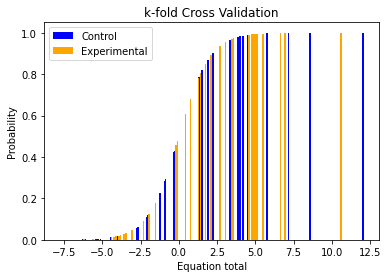

In [7]:
controlXvals = []
expXvals = []
controlYvals = []
expYvals = []
n = 0
for iter in dfprob[1]:
    if y[n] == 0:
        controlXvals.append(xtestvallist[n])
        controlYvals.append(iter)
    if y[n] == 1:
        expXvals.append(xtestvallist[n])
        expYvals.append(iter)
    n = n + 1
   
plt.title("k-fold Cross Validation")
plt.xlabel("Equation total")
plt.ylabel("Probability")
plt.bar(controlXvals, controlYvals, width=0.1, label='Control', color='blue')
plt.bar(expXvals, expYvals, width=0.1, label='Experimental', color='orange')
plt.legend(loc='best')
plt.show()